<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Simplify-BiLSTM-CRF" data-toc-modified-id="Simplify-BiLSTM-CRF-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Simplify-BiLSTM-CRF</a></span><ul class="toc-item"><li><span><a href="#导入已处理好的数据" data-toc-modified-id="导入已处理好的数据-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>导入已处理好的数据</a></span></li><li><span><a href="#进行分词" data-toc-modified-id="进行分词-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>进行分词</a></span></li><li><span><a href="#对语料进行简化处理" data-toc-modified-id="对语料进行简化处理-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>对语料进行简化处理</a></span><ul class="toc-item"><li><span><a href="#定义需要使用的数据结构" data-toc-modified-id="定义需要使用的数据结构-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>定义需要使用的数据结构</a></span></li><li><span><a href="#导入准备好的词向量" data-toc-modified-id="导入准备好的词向量-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>导入准备好的词向量</a></span></li><li><span><a href="#对原始语料进行预处理" data-toc-modified-id="对原始语料进行预处理-1.3.3"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>对原始语料进行预处理</a></span></li></ul></li><li><span><a href="#搭建神经网络" data-toc-modified-id="搭建神经网络-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>搭建神经网络</a></span><ul class="toc-item"><li><span><a href="#数据预处理" data-toc-modified-id="数据预处理-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>数据预处理</a></span></li><li><span><a href="#进行填充" data-toc-modified-id="进行填充-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>进行填充</a></span></li><li><span><a href="#构建预训练embedding层" data-toc-modified-id="构建预训练embedding层-1.4.3"><span class="toc-item-num">1.4.3&nbsp;&nbsp;</span>构建预训练embedding层</a></span></li><li><span><a href="#进行基于keras的模型训练" data-toc-modified-id="进行基于keras的模型训练-1.4.4"><span class="toc-item-num">1.4.4&nbsp;&nbsp;</span>进行基于keras的模型训练</a></span></li></ul></li><li><span><a href="#模式提取" data-toc-modified-id="模式提取-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>模式提取</a></span></li><li><span><a href="#弱监督模式" data-toc-modified-id="弱监督模式-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>弱监督模式</a></span></li></ul></li></ul></div>

# Simplify-BiLSTM-CRF
---
>基于**简化** & **模式匹配**的NER

## 导入已处理好的数据

In [78]:
import Ipython_importer
import myUtils

In [79]:
path=r'./data/transf.txt'
sent_list,company,project,constract=myUtils.loadData(path)

In [80]:
sent_list[2018].display()

text---> 浙江晶盛机电股份有限公司(以下简称“公司”)日前与包头晶澳太阳能科技有限公司(以下简称“包头晶澳”)签订了全自动晶体生长炉买卖合同,本次合同金额为人民币309420000。
length---> 86
entitys---> ['B-yifang:浙江晶盛机电股份有限公司', 'B-hetong:全自动晶体生长炉买卖合同', 'B-moneyDown:309420000']


In [81]:
for key in project.keys():
    print(key)

B-xiangmu:衢州市社会保险事业管理局按疾病分组点数法付费购买服务项目竞争性谈判项目
B-xiangmu:湘潭华融·山水苑一期1段项目
B-xiangmu:清丰县开州路生态绿化工程
B-xiangmu:国家电网公司集中规模招标采购2011年第六批输变电项目变电设备(含电缆)项目招标活动
B-xiangmu:其总装车间输送线项目
B-xiangmu:上海市浦东供电分公司生产调度楼工程
B-xiangmu:河南省南水北调受水区许昌供水配套工程鄢陵供水工程管道采购标
B-xiangmu:2013年第二批电能表及用电信息采集设备招标采购项目
B-xiangmu:金税三期工程网络项目(第3包、第4包)招标
B-xiangmu:佛山市南海东西二线山水农场至三江路口段第二合同段项目
B-xiangmu:内蒙古港原化工有限公司密闭电炉节能技术改造项目
B-xiangmu:新建成都至贵阳铁路乐山至贵阳段站前工程
B-xiangmu:欧浦家具电子商务平台
B-xiangmu:埔寨3号路国家道路升级与维护项目
B-xiangmu:国网重庆永川等五家供电公司营配调贯通低压数据采集及空间建模
B-xiangmu:河北承德风电基地围场御道口乡风电场20万千瓦特许权项目风电机组设备采购项目
B-xiangmu:馆陶县乡村污水处理及运营管理特许经营权采购项目
B-xiangmu:国家电网公司集中规模招标采购2011年电能表(含采集设备)第五批项目招标活动
B-xiangmu:中国石化管道储运有限公司日照-濮阳-洛阳原油管道施工项目
B-xiangmu:阿深线河南信阳境息县至光山县段高速公路项目施工AS-Ⅱ-6合同段
B-xiangmu:新建上海至南京城际轨道交通站站房等站后工程2标段
B-xiangmu:长沙市轨道交通1号线一期工程通信部分子系统采购及集成服务项目
B-xiangmu:七台河市城市西环公路工程(北岸新城至工人村段)施工项目
B-xiangmu:3#排水沟及其北五路、北九路、北十二路、滨河路桥梁工程
B-xiangmu:自贡市东部新城生态示范区一期工程PPP项目
B-xiangmu:上虞市世纪新丘治江围涂工程二期工程
B-xiangmu:丽水市莲都区人民医院改扩建和丽云中心卫生院迁建PPP项目社会资本采购
B-xiangmu:山东省无线电管理技术设施建设“十二五”三期工程项目


B-xiangmu:国家电网公司2013年第四批电能表及用电信息采集设备招标采购
B-xiangmu:泉三高速公路泉州支线(南安至惠安)机电工程NHE1合同段
B-xiangmu:长春市地铁1号线一期工程通风系统—通风系统设备项目
B-xiangmu:新建济南至青岛高速铁路“四电”及相关工程JQGTSDSG-1标第四批自购物资设备招标采购
B-xiangmu:杭州市紫金港路工程(文一西路—留祥路)01标
B-xiangmu:固定资产采购合同
B-xiangmu:广东省公安厅2016-47警用被装采购项目(警用箱包类)
B-xiangmu:龙源江苏大丰(H12)200MW海上风电项目35kV海底光电复合电缆及附件采购招标
B-xiangmu:潍坊至日照高速公路项目滨海连接线工程
B-xiangmu:绿地·国际博览城会展中心项目幕墙工程和绿地·国际博览城会展中心项目金属屋面工程项目
B-xiangmu:湖南天易集团有限公司立体停车库招标
B-xiangmu:成都-自贡-泸州-赤水(川黔界)高速公路成都至眉山(仁寿)段双流县境预计征地3510亩
B-xiangmu:国家电网公司2014年第一批电能表及用电信息采集设备招标采购
B-xiangmu:武汉市轨道交通四号线一期及二期工程自动售检票系统集成项目
B-xiangmu:国有土地使用权20110106号
B-xiangmu:京津冀交通一卡通互联互通北京一期工程区域中心系统采购项目
B-xiangmu:安阳市第二人民医院新院建设、疗养中心建设PPP项目
B-xiangmu:中环光伏可再生能源太阳能电池用单晶硅材料和超薄高效太阳能电池用硅单晶切片产业化工程四期项目设备采购第一批第三包
B-xiangmu:龙口至青岛公路莱西(沈海高速)至城阳段土建工程第九标段的施工项目
B-xiangmu:深圳地铁2号线工程土建2204标段工程项目
B-xiangmu:中国移动2017年至2018年传输管线工程施工服务集中采购(补充采购)(广西)项目
B-xiangmu:四川省木里县依吉等9个通乡油路工程设计施工总承包(EPC)项目
B-xiangmu:智慧福清暨高清视频监控(天网)项目(一期)
B-xiangmu:省道304线通辽(大林)至保康公路项目土建工程第DBLJ5标段施工工程
B-xiangmu:参与了新城区大青山万亩草场恢复建设项

B-xiangmu:河南省南水北调受水区漯河供水配套工程管道采购第
B-xiangmu:景德镇市珠山区“城市双修”工程项目设计施工总承包
B-xiangmu:象山县大目湾新城沿湾路(悦洋路~迎海路)和乐渔路(松兰大道~规划12路)道路工程(施工)
B-xiangmu:青海省德令哈市蓄集乡陶斯图村草原恢复治理工程
B-xiangmu:湖南城陵矶临港产业新区污水处理厂BOT项目
B-xiangmu:江苏省电力公司2013年第三批物资招标采购项目
B-xiangmu:东岸湿地公园项目
B-xiangmu:2012年第三批电能表(含用电信息采集)招标采购
B-xiangmu:邕江综合整治和开发利用工程(南岸:托洲大桥-清川大桥、南岸:三岸大桥-蒲庙大桥)PPP项目
B-xiangmu:科尔沁右翼前旗科尔沁镇城北路绿化升级改造工程
B-xiangmu:鲁能集团有限公司2016年度第2批次集中规模采购招标物资类项目
B-xiangmu:衡水市植物园项目
B-xiangmu:天津市公安局南开分局南开区2016年视频监控网建设运维服务项目
B-xiangmu:石家庄联邦名都二期4#楼精装修工程60000000
B-xiangmu:城东至北峰快速通道及两侧片区棚户区(石结构房)改造PPP项目
B-xiangmu:台州东部新区聚洋大道以东、长浦河以南区块软基处理工程(设计施工总承包)二标段
B-xiangmu:莒县矿山生态治理修复工程第一批项目投融资、设计、施工一体化招标
B-xiangmu:提济乌祖省大学4000床位工程、2500床位工程和7000座位工程等三个项目
B-xiangmu:文昌玉佛宫景区项目及海滨休闲度假公园项目
B-xiangmu:文昌玉佛宫景区项目及海滨休闲度假公园项目建设工程施工合同
B-xiangmu:2016年第二次配网设备协议库存招标项目
B-xiangmu:中海油伊拉克米桑油田脱酸项目
B-xiangmu:山西省介休煤层气勘察区块项目
B-xiangmu:贵州锦丰矿业有限公司锦丰金矿磺厂沟矿段延深扩能(一期)工程
B-xiangmu:国家电网公司2017年第一批电能表及用电信息采集设备招标活动
B-xiangmu:义乌市江滨绿廊(东青溪-37省道)沿江景观工程
B-xiangmu:国家电网公司集中规模招标采购2011年电能表第三批项目招标活动
B-xian

B-xiangmu:唐黄路(S1—周邓公路)新建工程
B-xiangmu:唐黄路(S1-周邓公路)新建工程
B-xiangmu:永嘉万新恒锦置业有限公司投资开发的瓯北2013-1#2地块5(三江立体城)工程
B-xiangmu:武汉市轨道交通2号线一期工程车辆增购项目
B-xiangmu:无锡地铁1号线南延线风机、风阀、消声器设备采购项目
B-xiangmu:南京华侨城实业发展有限公司NO.2016G76一期、二期、NO.2016G77地块建设项目一期施工总承包工程
B-xiangmu:招商局集团网络信息安全整体保障服务项目
B-xiangmu:吕赵水库环境综合整治项目、滁河环境综合整治项目EPC设计施工总承包项目
B-xiangmu:中心路及后海河市政工程Ⅲ标段
B-xiangmu:雅安智慧公共安全系统政府与社会资本合作采购项目
B-xiangmu:广汽丰田汽车有限公司感恩汉兰达活动-胎压监测仪采购项目
B-xiangmu:李沧区枣山路(九水路—规划一号线)打通工程(道路、桥梁、给水、雨水、污水、再生水管线)
B-xiangmu:广州白云国际机场扩建工程二号航站楼屋面工程(1标段)项目
B-xiangmu:赞比亚马宁加至姆维尼伦加公路升级改造项目
B-xiangmu:国家电网有限公司2018年张北柔性直流电网试验示范工程第二次及输变电2018年第一次(新增)项目
B-xiangmu:中环光伏可再生能源太阳能电池用单晶硅材料产业化工程四期改造项目设备采购第一批第一包
B-xiangmu:贵州国坛酒业发展有限公司中华华丹观光塔建筑安装工程项目
B-xiangmu:6X48MVA蓄热式电石生产线及副产尾气综合利用项目
B-xiangmu:‘平安德宏’高清视频监控系统建设项目
B-xiangmu:杭州吉利汽车部件有限公司大江东总装输送主线项目
B-xiangmu:苕溪清水入湖河道整治导流港清淤工程(德清段)施工标
B-xiangmu:安徽省2016年秋季至2018年春季义务教育阶段中小学免费教科书等采购项目
B-xiangmu:锡盟~山东1000千伏交流特高压输电线路工程瓷绝缘子集中招标活动
B-xiangmu:内容包括杭州地铁2号线一期工程信号系统招标项目
B-xiangmu:广西郁江老口航运枢纽工程灯泡贯流式水轮发电机组及附属设备采购
B-xiangmu:国家电网公司

## 进行分词

In [82]:
import jieba
import jieba.posseg as pseg

>**添加自定义词及优先性**
+ 如不添加则在分词：该项目的进度与质量时——————> 该项|目的|进度|与|质量

In [83]:
jieba.load_userdict('./data/mydic.txt')

In [84]:
print(' | '.join(jieba.cut('保证该项目的进度与质量')))

保证 | 该 | 项目 | 的 | 进度 | 与 | 质量


## 对语料进行简化处理

### 定义需要使用的数据结构

In [85]:
class MaskSent:  # 遮罩后的句子数据结构
    def __init__(self, ori):
        self.seg = []  # 分词结果
        self.token = []  # 向量
        self.label = []  # 标签
        self.len = 0  # 长度
        self.flag = 0  # 标签数
        self.score = 0  # 分数
        self.target_entity = []  # 目标长实体
        self.entity_seg = []  # 长实体分词结果
        self.pattern_seq = []  # 模式序列
        self.type_seq = []  # 词性序列
        self.origal_sent = ori  # 原始句子对象
        self.origal_type_seq = []  # 原始语句序列
        self.exist_p = ''  # 项目不遮罩

    def split(self, threshold):
        new_mask = MaskSent(self.origal_sent)
        new_mask2 = MaskSent(self.origal_sent)

        new_mask.seg = self.seg[:threshold]
        new_mask2.seg = self.seg[threshold:]

        new_mask.token = self.token[:threshold]
        new_mask2.token = self.token[threshold:]

        new_mask.len = threshold
        new_mask2.len = self.len-threshold

        new_mask.label = self.label[:threshold]
        new_mask2.label = self.label[threshold:]

        new_conut = 0
        for l in new_mask.label:
            if l == 'O':
                continue
            else:
                new_conut += 1
        new_mask.flag = new_conut
        new_mask2.flag = self.flag-new_conut

        new_mask.score = 0
        new_mask2.score = 0

        new_mask.origal_type_seq = self.origal_type_seq[:threshold]
        new_mask2.origal_type_seq = self.origal_type_seq[:threshold]

        if len(self.target_entity) > 0:
            flag = False
            for l in new_mask.label:
                if l == 'xiangmu':  # 长实体在前半段中
                    new_mask.target_entity = self.target_entity
                    new_mask.entity_seg = self.entity_seg
                    new_mask.pattern_seq = self.pattern_seq
                    new_mask.type_seq = self.type_seq
                    new_mask.exist_p = self.exist_p
                    flag = True
                    break

            if flag == False:  # 长实体在后半段中
                new_mask2.target_entity = self.target_entity
                new_mask2.entity_seg = self.entity_seg
                new_mask2.pattern_seq = self.pattern_seq
                new_mask2.type_seq = self.type_seq
                new_mask2.exist_p = self.exist_p

        return new_mask, new_mask2

    def display(self):
        print('原句--->[', self.origal_sent.text, ']')
        print('-------------------------------------------')
        print('分词结果--->', self.seg)
        if len(self.target_entity) > 0:
            print('目标实体--->', self.target_entity)
            print('实体分词--->', self.entity_seg)
            print('词性序列--->', self.type_seq)
            print('模式序列--->', self.pattern_seq)

### 导入准备好的词向量

In [86]:
from gensim.models import  KeyedVectors
embedding_model=KeyedVectors.load_word2vec_format('./data/vec.txt',binary=False)

In [87]:
embedding_model.most_similar('甲方', topn=5)

D:\software\anaconda3.5\lib\site-packages\gensim\models\keyedvectors.py:2351: RuntimeWarning: invalid value encountered in true_divide
  return (m / dist).astype(REAL)


[('乙方', 0.856503963470459),
 ('甲乙双方', 0.7036849856376648),
 ('丙方', 0.6578716039657593),
 ('发包方', 0.6176831722259521),
 ('监理人', 0.6144116520881653)]

In [88]:
print(embedding_model.get_vector('四川'))

[ 0.029885 -0.719203  0.253807  0.29874  -0.042184 -0.142439  0.174714
  0.443417  0.086906 -0.243372  0.049865  0.224381  0.117972 -0.045266
  0.487101 -0.229437  0.022898 -0.422132 -0.36717  -0.375555 -0.112943
 -0.611933  0.074121 -0.184237 -0.305711 -0.108717 -0.235637  0.24068
  0.013293 -0.029466  0.068425  0.130773 -0.003958  0.040295  0.065628
 -0.585326  0.26327   0.310296  0.182976 -0.324958  0.134927  0.064088
  0.167818  0.17144  -0.035112 -0.325843 -0.485978 -0.491223 -0.038807
 -0.354438 -0.430091  0.536543  0.380775  0.264945  0.219939 -0.319368
  0.143457  0.075105  0.100299  0.026719 -0.056804  0.033618  0.335866
  0.196557  0.206799  0.171312 -0.288295 -0.239485  0.465532 -0.128891
 -0.233916 -0.191354  0.096203  0.14962   0.094421  0.31152   0.607149
  0.019243  0.004053  0.132654  0.317716  0.534717 -0.18466   0.185852
  0.065658  0.073342 -0.018946 -0.276437  0.22902   0.165094  0.110339
  0.510757 -0.022271  0.12957  -0.32721   0.037812 -0.052911 -0.13466
 -0.5099

### 对原始语料进行预处理

In [89]:
from tqdm import tnrange, tqdm_notebook, tqdm

In [90]:
words = pseg.cut('对原始语料进行分词')
for w in words:
    print(w.word, w.flag)

对 p
原始 v
语料 n
进行 v
分词 n


In [91]:
def transf2Mask(serialSent, jieba, embedding_model, pseg):
    text = serialSent.text
    maskSent = MaskSent(serialSent)

    for entity in serialSent.entity_list:
        if 'B-jiafang' in entity:
            text = text.replace(entity[10:], 'jiafang')
        if 'B-yifang' in entity:
            text = text.replace(entity[9:], 'yifang')
        if 'B-hetong' in entity:
            text = text.replace(entity[9:], 'hetong')
        if 'B-xiangmu' in entity:
            maskSent.exist_p=text
            temp_text = text.replace(entity[10:], '项目')
            words = pseg.cut(temp_text)
            for w in words:
                maskSent.origal_type_seq.append(w.flag)

            text = text.replace(entity[10:], 'xiangmu')
            maskSent.target_entity.append(entity[10:])
            words = pseg.cut(entity[10:])
            for w in words:
                maskSent.type_seq.append(w.flag)
                maskSent.entity_seg.append(w.word)
                if w.flag[0] == 'n':
                    maskSent.pattern_seq.append(w.word)
        
    wordList = ' '.join(jieba.cut(text, HMM=True)).split(' ')
    seg = []
    token = []
    label = []
    label_count = 0
    for word in wordList:
        if word in ['jiafang', 'yifang', 'xiangmu', 'hetong']:
            label.append(word)
            label_count += 1
            if word == 'jiafang':
                seg.append('甲方')
                token.append(embedding_model.get_vector('甲方'))
            if word == 'yifang':
                seg.append('乙方')
                token.append(embedding_model.get_vector('乙方'))
            if word == 'xiangmu':
                seg.append('项目')
                token.append(embedding_model.get_vector('项目'))
            if word == 'hetong':
                seg.append('合同')
                token.append(embedding_model.get_vector('合同'))
            continue
        if word in embedding_model.vocab.keys():
            seg.append(word)
            token.append(embedding_model.get_vector(word))
            label.append('O')

    maskSent.seg = seg
    maskSent.token = token
    maskSent.label = label
    maskSent.flag = label_count
    maskSent.len = len(seg)

    return maskSent

In [92]:
maskSent = transf2Mask(sent_list[1980], jieba, embedding_model, pseg)

In [93]:
maskSent.display()

原句--->[ 依据国家电网公司的国网招投标网http://newbidding.sgcc.com.cn于2011年8月30日公告的“国家电网公司集中规模招标采购2011年电能表第四批项目中标人名单(招标编号:0711-11OTL120)”,深圳浩宁达仪表股份有限公司(以下简称“公司”011年9月22日,深圳市铁汉生态环境股份有限公司(以下简称“本公司”或“公司”)与郴州高科投资控股有限公司(以下简称“甲方”项目2、项目招标人:余姚市档案局3、项目投资额:227555200。 ]
-------------------------------------------
分词结果---> ['依据', '甲方', '的', '国网', '招投标', '网', 'http', ':', '/', '/', '.', 'sgcc', '.', 'com', '.', 'cn', '于', '2011', '年', '8', '月', '30', '日', '公告', '的', '“', '甲方', '集中', '规模', '招标', '采购', '2011', '年', '电能表', '第四批', '项目', '中标人', '名单', '(', '招标', '编号', ':', '0711', '-', ')', '”', ',', '乙方', '(', '以下', '简称', '“', '公司', '”', '011', '年', '9', '月', '22', '日', ',', '乙方', '(', '以下', '简称', '“', '本', '公司', '”', '或', '“', '公司', '”', ')', '与', '甲方', '(', '以下', '简称', '“', '甲方', '”', '项目', '2', '、', '项目', '招标人', ':', '、', '项目', '投资额', ':', '。']
目标实体---> ['国家电网公司集中规模招标采购2011年电能表第四批项目']
实体分词---> ['国家电网', '公司', '集中', '规模', '招标', '采购', '2011', '年', '电能表', '第四批', '项目']
词性序列---> ['nz', 'n', 'v', 'n', 'n', 'v', 'm', 'm', 'n

In [94]:
maskSent_list=[]

In [95]:
for sent in tqdm_notebook(sent_list):
    maskSent_list.append(transf2Mask(sent, jieba, embedding_model, pseg))

## 搭建神经网络
+ BiLSTM-CRF神经网络
+ 基于词向量输入
+ 实体类型为4种，词向量中不存在的词直接丢弃（大多为数字）

### 数据预处理

In [96]:
import numpy as np
import pandas as pd

In [97]:
from random import shuffle
shuffle(maskSent_list)  # 洗牌

In [98]:
len_list=[sent.len for sent in maskSent_list]
label_len_list=[sent.flag for sent in maskSent_list]

print('min--->',np.min(len_list))
print('max--->',np.max(len_list))
print('avg--->',np.average(len_list))

min---> 2
max---> 924
avg---> 41.76778404690784


>句子长度平均值在41左右，最小2，最大924，需要均衡处理

In [99]:
data_dic={'seg_length':len_list,'entity_count':label_len_list}
maskSent_data=pd.DataFrame(data=data_dic)

D:\software\anaconda3.5\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
D:\software\anaconda3.5\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\software\anaconda3.5\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


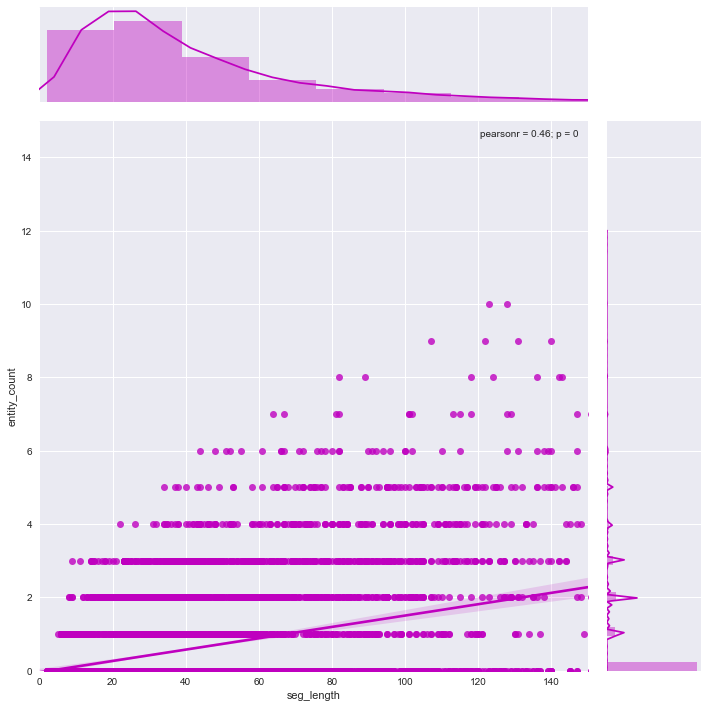

In [100]:
import seaborn as sns
sns.set(style="darkgrid")

g = sns.jointplot("seg_length", "entity_count", data=maskSent_data, kind="reg",
                  xlim=(0, 150), ylim=(0,15), color="m",size=10)

 >**上述结果可知：**大部分数据的句子长度在60以内，实体数量在4以内
---
**<span class="girk">预处理方案：</span>**
+ 句子长度定为50
+ 长度小于5且没有实体的直接抛弃
+ 长度大于50则进行截断

In [101]:
def processMaskSent(maskSent, threshold=50):
    new_mask, new_mask2 = maskSent.split(threshold)
    return new_mask, new_mask2  # 长度为50的片段，剩余片段

In [102]:
sent_len_threshold = 50
processed_masked_sent = []

In [103]:
for sent in tqdm_notebook(maskSent_list):
    if sent.len < 5:
        continue

    if sent.len > sent_len_threshold:
        maskSent1, maskSent2 = processMaskSent(sent)
        processed_masked_sent.append(maskSent1)
        maskSent_list.append(maskSent2)
    else:
        processed_masked_sent.append(sent)

In [104]:
print(np.average([sent.len for sent in processed_masked_sent]))
print(np.min([sent.len for sent in processed_masked_sent]))

32.07356204130398
5


In [105]:
short_sent=[sent for sent in processed_masked_sent if sent.len<10]
for sent in short_sent[123:129]:
    print(sent.seg)

['乙方', '董事会', '2016', '年', '1', '。']
['7', '中盾', '云安', '已', '中标', '大', '遗漏', '。']
['中', '标价', '标', '单位', '。']
['总', '承包商', ':', '乙方', '。']
['该', '项目', '述', '或', '重大', '遗漏', '。']
['本', '保荐', '机构', '对', '上述', '关联', '交易', '无异议', '。']


In [106]:
len(processed_masked_sent)

11718

In [107]:
print(processed_masked_sent[0].display())

原句--->[ 2、加纳国家电力公司(ElectricityCorporationofGhana):注册地点:加纳阿克拉521号信箱沃尔塔河电力大厦企业性质:加纳国有企业主营业务:按照加纳法律在加纳南部为居民和工业用户配送电的机构。 ]
-------------------------------------------
分词结果---> ['2', '、', '甲方', '(', ')', ':', '注册', '地点', ':', '加纳', '阿克拉', '521', '号', '信箱', '沃尔塔', '河', '电力', '大厦', '企业', '性质', ':', '加纳', '国有企业', '主营业务', ':', '按照', '加纳', '法律', '在', '加纳', '南部', '为', '居民', '和', '工业', '用户', '配送', '电', '的', '机构', '。']
None


### 进行填充
+ 对于长度低于50的句子进行左侧填充

In [108]:
for sent in tqdm_notebook(processed_masked_sent):
    if len(sent.seg) < sent_len_threshold:
        padding_seg = []
        padding_label = []
        for i in range(sent_len_threshold-len(sent.seg)):
            padding_seg.append('padding')
            padding_label.append('P')
        for j in sent.seg:
            padding_seg.append(j)
        for l in sent.label:
            padding_label.append(l)
        sent.seg = padding_seg
        sent.label = padding_label

### 构建预训练embedding层

In [109]:
dic_keys=embedding_model.vocab.keys()
embedding_matrix = np.zeros((len(dic_keys), 200))

In [110]:
index = 0
index_dic = {}
for key in dic_keys:
    index_dic[key] = index
    embedding_matrix[index] = embedding_model.get_vector(key)
    index += 1

In [111]:
label_index = {'P': -1, 'O': 0, 'jiafang': 1,
               'yifang': 2, 'xiangmu': 3, 'hetong': 4}

def transfer2x_y(processed_masked_sent, np, index_dic):
    x_train = []
    y_train = []
    for sent in processed_masked_sent:
        indexed_list = [index_dic[word] for word in sent.seg]
        label_indexed_list=[label_index[label] for label in sent.label]
        x_train.append(indexed_list)
        y_train.append(label_indexed_list)
    return x_train,y_train

### 进行基于keras的模型训练
>**模型创建**

In [112]:
from keras.models import Model, Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Input,Dense,Dropout
from keras_contrib.layers import CRF

In [113]:
EMBED_DIM=200    #词向量200维
BiRNN_UNITS=50   #双向神经单元数

In [114]:
def createModel():
    model = Sequential()
    model.add(Embedding(len(index_dic),
                        EMBED_DIM,
                        weights=[embedding_matrix],  #直接引入之前的词向量
                        input_length=BiRNN_UNITS,
                        trainable=False
                        ))
    model.add(Bidirectional(LSTM(BiRNN_UNITS, return_sequences=True)))
    #model.add(Dropout(0.2))
    crf = CRF(5, sparse_target=True)
    model.add(crf)
    model.compile('adam', loss=crf.loss_function, metrics=[crf.accuracy])
    return model

In [41]:
model = createModel()

D:\software\anaconda3.5\lib\site-packages\keras_contrib\layers\crf.py:346: UserWarning: CRF.loss_function is deprecated and it might be removed in the future. Please use losses.crf_loss instead.
  warnings.warn('CRF.loss_function is deprecated '
D:\software\anaconda3.5\lib\site-packages\keras_contrib\layers\crf.py:353: UserWarning: CRF.accuracy is deprecated and it might be removed in the future. Please use metrics.crf_accuracy
  warnings.warn('CRF.accuracy is deprecated and it '


In [115]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 50, 200)           3614200   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 50, 100)           100400    
_________________________________________________________________
crf_1 (CRF)                  (None, 50, 5)             540       
Total params: 3,715,140
Trainable params: 100,940
Non-trainable params: 3,614,200
_________________________________________________________________


>训练

In [116]:
x_train, y_train = transfer2x_y(processed_masked_sent, np, index_dic)
x_train = np.array(x_train)  # keras中训练数据必须是数组，不能是list
y_train = np.array(y_train)

In [117]:
EPOCH=10
y_train=np.expand_dims(y_train,2) #维度扩充，转换为2维矩阵

In [118]:
train_size=10000

In [46]:
model.fit(x_train[:train_size],
          y_train[:train_size],
          batch_size=16,
          epochs=EPOCH,
          validation_split=0.15,
          verbose=2)

Train on 8500 samples, validate on 1500 samples
Epoch 1/10
 - 43s - loss: -1.0203e+01 - crf_viterbi_accuracy: 0.6385 - val_loss: -2.3670e+01 - val_crf_viterbi_accuracy: 0.6027
Epoch 2/10
 - 35s - loss: -3.0720e+01 - crf_viterbi_accuracy: 0.6457 - val_loss: -4.5411e+01 - val_crf_viterbi_accuracy: 0.6031
Epoch 3/10
 - 36s - loss: -4.9762e+01 - crf_viterbi_accuracy: 0.6463 - val_loss: -6.6675e+01 - val_crf_viterbi_accuracy: 0.6033
Epoch 4/10
 - 34s - loss: -6.8701e+01 - crf_viterbi_accuracy: 0.6469 - val_loss: -8.7969e+01 - val_crf_viterbi_accuracy: 0.6040
Epoch 5/10
 - 33s - loss: -8.7653e+01 - crf_viterbi_accuracy: 0.6476 - val_loss: -1.0911e+02 - val_crf_viterbi_accuracy: 0.6046
Epoch 6/10
 - 34s - loss: -1.0636e+02 - crf_viterbi_accuracy: 0.6481 - val_loss: -1.3004e+02 - val_crf_viterbi_accuracy: 0.6050
Epoch 7/10
 - 32s - loss: -1.2493e+02 - crf_viterbi_accuracy: 0.6484 - val_loss: -1.5088e+02 - val_crf_viterbi_accuracy: 0.6051
Epoch 8/10
 - 31s - loss: -1.4345e+02 - crf_viterbi_accu

In [119]:
print(processed_masked_sent[4728].display())

原句--->[ 本公司自2004开始与津联热电发生蒸汽销售交易,交易对方信用状况良好。 ]
-------------------------------------------
分词结果---> ['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '本', '公司', '自', '2004', '开始', '与', '津联', '热电', '发生', '蒸汽', '销售', '交易', ',', '交易', '对方', '信用', '状况良好', '。']
None


In [120]:
y_predic=model.predict(x_train[4728].reshape(1,50))
y_predic_limit=y_predic[0][-processed_masked_sent[4728].len:]

In [121]:
chunk_tags = ['O', 'jiafang', 'yifang', 'xiangmu', 'hetong']
result = [np.argmax(row) for row in y_predic[0]]
result_tags = [chunk_tags[i] for i in result]
print(processed_masked_sent[4728].label[-processed_masked_sent[4728].len:])

['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']


In [122]:
def trans2Label(np,y_predic,chunk_tags):
    result = [np.argmax(row) for row in y_predic]
    result_tags = [chunk_tags[i] for i in result]
    return result_tags

In [123]:
from itertools import chain
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelBinarizer
import sklearn

In [124]:
def bio_classification_report(y_true, y_pred):

    lb = LabelBinarizer()
    y_true_combined = lb.fit_transform(list(chain.from_iterable(y_true)))
    y_pred_combined = lb.transform(list(chain.from_iterable(y_pred)))

    tagset = set(lb.classes_) - {'O'}
    tagset = sorted(tagset, key=lambda tag: tag.split('-', 1)[::-1])
    class_indices = {cls: idx for idx, cls in enumerate(lb.classes_)}

    return classification_report(
        y_true_combined,
        y_pred_combined,
        labels=[class_indices[cls] for cls in tagset],
        target_names=tagset,
    )

## 模式提取

In [125]:
class EntityPatter():
    def __init__(self, id):
        self.id = id
        self.entity = []
        self.seg = []
        self.pattern = []
        self.type_seq = []
        self.index = 0

    def extra(self, maskSent, index):
        self.entity = maskSent.target_entity
        self.seg = maskSent.seg
        self.pattern = maskSent.pattern_seq
        self.type_seq = maskSent.type_seq
        self.index = index   #记录来自哪个序列

    def display(self):
        print('pattern id--->', self.id)
        print('entity--->', self.entity)
        print('seg--->', self.seg)
        print('extrated pattern--->', self.pattern)
        print('type seq--->', self.type_seq)
        print('index--->', self.index)

In [126]:
pattern_index = 0
pattern_set = {}
key_dic = {}
begin_set = {}
end_set = {}
for ms in processed_masked_sent[:train_size]:
    if len(ms.target_entity) > 0:
        ep = EntityPatter(pattern_index)
        ep.extra(ms, pattern_index)
        pattern_set[pattern_index] = ep
        # print(ms.target_entity,ep.pattern)
        if len(ep.pattern) > 0:
            if ep.pattern[0] in begin_set.keys():
                begin_set[ep.pattern[0]] = begin_set[ep.pattern[0]]+1
            else:
                begin_set[ep.pattern[0]] = 1
            if ep.pattern[-1] in end_set.keys():
                end_set[ep.pattern[-1]] = end_set[ep.pattern[-1]]+1
            else:
                end_set[ep.pattern[-1]] = 1

        for item in ms.pattern_seq:  # 建立倒排索引
            if item in key_dic.keys():
                key_dic[item].append(pattern_index)
            else:
                key_dic[item] = [pattern_index]
        pattern_index += 1

In [127]:
for key in key_dic.keys():  # 去重
    key_dic[key] = list(set(key_dic[key]))

In [128]:
pattern_set[85].display()

pattern id---> 85
entity---> ['四川省木里县依吉等9个通乡油路工程设计施工总承包(EPC)项目']
seg---> ['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '5', '.', '项目', ',', '中', '标价', '元', '(', '其中', '四川省', '交通运输', '厅', '交通', '勘察', '设计', '研究院', '负责', '勘察', '设计', ',', '金额', '为', '元', ')', ',', '工期', '660', '日历', '天', '。']
extrated pattern---> ['四川省', '木里', '县', '通乡', '油路', '工程设计', '项目']
type seq---> ['ns', 'n', 'n', 'z', 'u', 'm', 'm', 'n', 'n', 'n', 'vn', 'b', 'v', 'x', 'eng', 'x', 'n']
index---> 85


In [129]:
begin_set_list = sorted(begin_set.items(), key=lambda item: item[1], reverse=True)
end_set_list = sorted(end_set.items(), key=lambda item: item[1], reverse=True)

In [130]:
print(end_set_list)

[('项目', 441), ('工程', 104), ('招标', 70), ('标段', 48), ('承包工程', 12), ('标', 10), ('灌溉系统', 10), ('机电工程', 6), ('配套工程', 6), ('使用权', 6), ('系统', 5), ('信息', 4), ('工程设计', 3), ('净化系统', 3), ('建模', 2), ('京津冀', 2), ('客船', 2), ('机电设备', 2), ('市政工程', 2), ('联合体', 2), ('工程施工', 2), ('有限公司', 2), ('吹雪', 2), ('通信网', 2), ('平台', 2), ('信息化', 2), ('湖景区', 2), ('车体', 2), ('征地', 2), ('箱包', 2), ('建筑工程', 2), ('总', 2), ('道路', 2), ('电力电缆', 2), ('高速公路', 2), ('绝缘子', 1), ('采矿工程', 1), ('公易', 1), ('立交桥', 1), ('洞库', 1), ('枣木', 1), ('精馏塔', 1), ('区间', 1), ('包件', 1), ('系统工程', 1), ('发电机组', 1), ('投标', 1), ('投资人', 1), ('盾构', 1), ('协议', 1), ('部分', 1), ('栾州', 1), ('资质', 1), ('人', 1), ('建设工程', 1), ('特段', 1), ('胶圈', 1), ('江东', 1), ('飞灰', 1), ('河', 1), ('光缆', 1), ('土建', 1), ('项', 1), ('换热器', 1), ('铁路', 1), ('代建', 1), ('配件', 1), ('互感器', 1), ('指挥部', 1), ('摊铺', 1), ('变电站', 1), ('分包', 1), ('东段', 1), ('电缆', 1), ('规模', 1)]


In [131]:
window_size=15  #窗口长度为15

In [132]:
processed_masked_sent[10002].origal_sent.display()

text---> 相关情况如下:一、中标项目基本情况:1、项目名称:六盘水市水城河综合治理二期工程2、招标人:六盘水市水利开发投资有限责任公司3、招标代理机构:云南惟诚工程招标代理有限公司4、项目中标金额:约1677900000人民币(具体金额以:临2013-077佳都新太科技股份有限公司关于预中标智慧广州视频监控系统集成合作项目(标段1)的公告本公司董事会及全体董事保证本公告内容不存在任何虚假记载、误导性陈述或者重大遗漏,并对其内容的真实性、准确性和完整性承担个别及连带责任。
length---> 232
entitys---> ['B-xiangmu:六盘水市水城河综合治理二期工程', 'B-jiafang:六盘水市水利开发投资有限责任公司', 'B-yifang:云南惟诚工程招标代理有限公司', 'B-moneyDown:1677900000', 'B-yifang:佳都新太科技股份有限公司']


In [133]:
temp_ms = None
for ms in processed_masked_sent[10000:]:
    if len(ms.target_entity) > 0:
        temp_ms = ms

        break

In [134]:
print(temp_ms.display())

原句--->[ 相关情况如下:一、中标项目基本情况:1、项目名称:六盘水市水城河综合治理二期工程2、招标人:六盘水市水利开发投资有限责任公司3、招标代理机构:云南惟诚工程招标代理有限公司4、项目中标金额:约1677900000人民币(具体金额以:临2013-077佳都新太科技股份有限公司关于预中标智慧广州视频监控系统集成合作项目(标段1)的公告本公司董事会及全体董事保证本公告内容不存在任何虚假记载、误导性陈述或者重大遗漏,并对其内容的真实性、准确性和完整性承担个别及连带责任。 ]
-------------------------------------------
分词结果---> ['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '标段', '1', ')', '的', '公告', '本', '公司', '董事会', '及', '全体', '董事', '保证', '本', '公告', '内容', '不', '存在', '任何', '虚假', '记载', '、', '误导性', '陈述', '或者', '重大', '遗漏', ',', '并', '对', '其', '内容', '的', '真实性', '、', '准确性', '和', '完整性', '承担', '个别', '及', '连带责任', '。']
目标实体---> ['六盘水市水城河综合治理二期工程']
实体分词---> ['六盘水市', '水城', '河', '综合治理', '二期工程']
词性序列---> ['ns', 'n', 'ns', 'l', 'l']
模式序列---> ['六盘水市', '水城', '河']
None


In [135]:
sent_seg = temp_ms.exist_p.replace('jiafang', '甲方').replace(
    'yifang', '乙方').replace('hetong', '合同').split(',')
sent_seg[0]

'相关情况如下:一、中标项目基本情况:1、项目名称:六盘水市水城河综合治理二期工程2、招标人:六盘水市水利开发投资有限责任公司3、招标代理机构:云南惟诚工程招标代理有限公司4、项目中标金额:约1677900000人民币(具体金额以:临2013-077佳都新太科技股份有限公司关于预中标智慧广州视频监控系统集成合作项目(标段1)的公告本公司董事会及全体董事保证本公告内容不存在任何虚假记载、误导性陈述或者重大遗漏'

In [136]:
class Node():
    def __init__(self, word, flag):
        self.word = word
        self.flag = flag


class MatchResult():
    def __init__(self):
        self.seq_index = None  # 所在的sent_seg的索引
        self.window_begin = None  # 窗口起始索引
        self.window_end = None  # 窗口终点索引

In [137]:
alpha = 0.6   # 相似度过滤值
entity_len_limit = 5  # 实体长度过滤

In [138]:
# 名词是否匹配
def is_match(word, word_set, embedding_model, alpha, count=5):  # 频次过滤
    if word in word_set.keys():
        #print('contain--->', word)
        return True
    else:
        for key in word_set:
            if word_set[key] > count:
                try:
                    if embedding_model.similarity(word, key) > alpha:
                        #print('match--->', word)
                        return True
                except:
                    return False
        return False


# 窗口内寻找目标长实体
def window_search(sent, key_dic, pattern_set, begin_set, end_set, embedding_model, len_limit, alpha=0.6):

    end_position = None
    begin_position = None
    end_isFind = False
    begin_isFind = False
    for index in range(len(sent)):
        end_word = sent[len(sent)-index-1]
        if end_word.flag[0] != 'n':  # 不是名词就跳过
            continue
        else:
            if is_match(end_word.word, end_set, embedding_model, alpha):
                end_position = len(sent)-index-1
                end_isFind = True
                break

    if end_isFind:
        for index in range(end_position):
            begin_word = sent[index]
            if begin_word.flag[0] != 'n':
                continue
            else:
                if is_match(begin_word.word, begin_set, embedding_model, alpha, count=0):
                    begin_position = index
                    begin_isFind = True
                    break

    if end_isFind and begin_isFind:  # 起点和尾部均匹配成功
        # print('end_word--->',sent[end_position].word)
        # print('lllll---->',end_position-begin_position)
        valid = True if (end_position-begin_position+1 > len_limit) else False
        if valid:
            return True, begin_position, end_position
        else:
            return False, None, None
    else:
        return False, None, None

# 寻找目标长实体


def find_target(pseg, sent, key_dic, window_size, pattern_set, begin_set, end_set,
                embedding_model, len_limit=5, alpha=0.6):
    word_list = []
    words = pseg.cut(sent)
    for w in words:
        node = Node(w.word, w.flag)
        word_list.append(node)
    for index in range(len(word_list)):
        window_end = len(word_list)-1-index
        window_begin = window_end+1-window_size
        if window_begin < 0:
            window_begin = 0
        isFind, begin_position, end_position = window_search(
            word_list[window_begin:window_end+1],
            key_dic, pattern_set, begin_set, end_set, embedding_model, len_limit, alpha)
        if isFind:
            print('search in window--->',
                  [w.word for w in word_list[window_begin:window_end+1]])
            print('find--->', [w.word for w in word_list[window_begin+begin_position:window_begin +
                                                         end_position+1]])
        if window_begin == 0:  # 窗口无需再移动
            break

# 模型判别


def model_judge(try_sent, model, embedding_model, target_entity_index, index_dic, np, chunk_tags):
    print(try_sent)
    x_try = [index_dic[y] for y in try_sent]
    if len(x_try)>0:
        predict = model.predict(np.array(x_try).reshape(1, 50))[0]
        if trans2Label(np, predict, chunk_tags)[target_entity_index] == 'xiangmu':
            return True
        else:
            return False
    return False


# 寻找目标长实体
def find_target2(x_train_size, pseg, seg_sent_list, key_dic, window_size, pattern_set, begin_set, end_set,
                 embedding_model, np, index_dic, chunk_tags, len_limit=5, alpha=0.6):
    finded_entity = []
    entity_dic={}
    simplify_sequence = []
    word_list_index = 0
    for word_list in seg_sent_list:
        for index in range(len(word_list)):
            window_end = len(word_list)-1-index
            window_begin = window_end+1-window_size
            if window_begin < 0:
                window_begin = 0
            isFind, begin_position, end_position = window_search(
                word_list[window_begin:window_end+1],
                key_dic, pattern_set, begin_set, end_set, embedding_model, len_limit, alpha)
            if isFind:
                # print('search in window--->',
                #      [w.word for w in word_list[window_begin:window_end+1]])
                # print('find--->', [w.word for w in word_list[window_begin+begin_position:window_begin +
                #                                             end_position+1]])
                target_sequence = [w.word for w in word_list[window_begin+begin_position:window_begin +
                                                             end_position+1]]
                simplify_sequence.extend(
                    [w.word for w in word_list[:window_begin+begin_position]])
                simplify_sequence.extend(['项目'])
                if (window_begin+end_position+1) < (len(word_list)-1):
                    simplify_sequence.extend(
                        [w.word for w in word_list[window_begin+end_position+1:]])

                #print('try--->', simplify_sequence)
                entity_target_index = window_begin+begin_position

                if len(simplify_sequence) < x_train_size:
                    comby_with_before = []
                    comby_with_after = []
                    need_comby = x_train_size-1 - \
                        len(simplify_sequence)  # -1是因为需要插入逗号
                    if word_list_index > 0:  # 可前向填充
                        before_seg_len = len(seg_sent_list[word_list_index-1])
                        if before_seg_len < need_comby:
                            comby_with_before.extend(
                                ['padding']*(need_comby-before_seg_len))
                            comby_with_before.extend(
                                [w.word for w in seg_sent_list[word_list_index-1]])
                            comby_with_before.append(',')
                            comby_with_before.extend(simplify_sequence)
                            target_entity_index = window_begin+begin_position+need_comby+1
                            if model_judge(comby_with_before, model, embedding_model,
                                           target_entity_index, index_dic, np, chunk_tags):
                                entity_name=''.join(target_sequence)
                                if entity_name not in entity_dic.keys():
                                    entity_dic[entity_name]=1
                                    finded_entity.append(
                                        (entity_name, word_list_index))
                                else:
                                    entity_dic[entity_name]+=1
                                break
                        else:
                            comby_with_before.extend(
                                [w.word for w in seg_sent_list[word_list_index-1][before_seg_len-need_comby:]])
                            comby_with_before.append(',')
                            comby_with_before.extend(simplify_sequence)
                            target_entity_index = window_begin+begin_position+need_comby+1
                            if model_judge(comby_with_before, model, embedding_model,
                                           target_entity_index, index_dic, np, chunk_tags):
                                entity_name=''.join(target_sequence)
                                if entity_name not in entity_dic.keys():
                                    entity_dic[entity_name]=1
                                    finded_entity.append(
                                        (entity_name, word_list_index))
                                else:
                                    entity_dic[entity_name]+=1
                                break

                    if word_list_index < (len(seg_sent_list)-1):  # 可以后向填充
                        after_seg_len = (len(seg_sent_list[word_list_index+1]))
                        if after_seg_len < need_comby:
                            comby_with_after.extend(
                                ['padding']*(need_comby-after_seg_len))
                            comby_with_after.extend(simplify_sequence)
                            comby_with_after.append(',')
                            comby_with_after.extend(
                                [w.word for w in seg_sent_list[word_list_index+1]])
                            target_entity_index = window_begin+begin_position+need_comby-after_seg_len
                            if model_judge(comby_with_after, model, embedding_model,
                                           target_entity_index, index_dic, np, chunk_tags):
                                entity_name=''.join(target_sequence)
                                if entity_name not in entity_dic.keys():
                                    entity_dic[entity_name]=1
                                    finded_entity.append(
                                        (entity_name, word_list_index))
                                else:
                                    entity_dic[entity_name]+=1
                                break

                        else:
                            comby_with_after.extend(simplify_sequence)
                            comby_with_after.append(',')
                            comby_with_after.extend(
                                [w.word for w in seg_sent_list[word_list_index+1][:need_comby]])
                            target_entity_index = window_begin+begin_position
                            if model_judge(comby_with_before, model, embedding_model,
                                           target_entity_index, index_dic, np, chunk_tags):
                                entity_name=''.join(target_sequence)
                                if entity_name not in entity_dic.keys():
                                    entity_dic[entity_name]=1
                                    finded_entity.append(
                                        (entity_name, word_list_index))
                                else:
                                    entity_dic[entity_name]+=1
                                break

                else:  # 句子过长，需要剪切
                    try_sent = []
                    if entity_target_index >= (len(simplify_sequence)-x_train_size):
                        try_sent.extend(simplify_sequence[-x_train_size:])
                        target_entity_index = x_train_size - \
                            len(simplify_sequence)+entity_target_index
                        if model_judge(try_sent, model, embedding_model,
                                       target_entity_index, index_dic, np, chunk_tags):
                            entity_name=''.join(target_sequence)
                            if entity_name not in entity_dic.keys():
                                entity_dic[entity_name]=1
                                finded_entity.append(
                                    (entity_name, word_list_index))
                            else:
                                entity_dic[entity_name]+=1
                            break

                    else:
                        n = int(entity_target_index/x_train_size)
                        try_sent.extend(
                            simplify_sequence[n*x_train_size:(n+1)*x_train_size])
                        target_entity_index = entity_target_index % x_train_size
                        if model_judge(try_sent, model, embedding_model,
                                       target_entity_index, index_dic, np, chunk_tags):
                            entity_name=''.join(target_sequence)
                            if entity_name not in entity_dic.keys():
                                entity_dic[entity_name]=1
                                finded_entity.append(
                                    (entity_name, word_list_index))
                            else:
                                entity_dic[entity_name]+=1
                            break

                simplify_sequence = []
            if window_begin == 0:  # 窗口无需再移动
                break
        word_list_index += 1

    return finded_entity


def simplify(long_sent, pseg, embedding_model):
    init_sent_list = long_sent.replace('jiafang', '甲方').replace(
        'yifang', '乙方').replace('hetong', '合同').split(',')

    seg_sent_list = []
    for sent in init_sent_list:
        word_list = []
        words = pseg.cut(sent)
        for w in words:
            if w.word in embedding_model.vocab.keys():
                node = Node(w.word, w.flag)
                word_list.append(node)
        seg_sent_list.append(word_list)
    return seg_sent_list

In [139]:
test_sent = None
for ms in processed_masked_sent[train_size:]:
    if len(ms.target_entity) > 0:
        text = ms.exist_p.replace('jiafang', '甲方').replace(
            'yifang', '乙方').replace('hetong', '合同')
        print(text)
        print('-------------------------------------------')
        print(ms.seg)
        print('-------------------------------------------')
        print(ms.target_entity)
        test_sent = text
        break

相关情况如下:一、中标项目基本情况:1、项目名称:六盘水市水城河综合治理二期工程2、招标人:六盘水市水利开发投资有限责任公司3、招标代理机构:云南惟诚工程招标代理有限公司4、项目中标金额:约1677900000人民币(具体金额以:临2013-077佳都新太科技股份有限公司关于预中标智慧广州视频监控系统集成合作项目(标段1)的公告本公司董事会及全体董事保证本公告内容不存在任何虚假记载、误导性陈述或者重大遗漏,并对其内容的真实性、准确性和完整性承担个别及连带责任。
-------------------------------------------
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '标段', '1', ')', '的', '公告', '本', '公司', '董事会', '及', '全体', '董事', '保证', '本', '公告', '内容', '不', '存在', '任何', '虚假', '记载', '、', '误导性', '陈述', '或者', '重大', '遗漏', ',', '并', '对', '其', '内容', '的', '真实性', '、', '准确性', '和', '完整性', '承担', '个别', '及', '连带责任', '。']
-------------------------------------------
['六盘水市水城河综合治理二期工程']


In [140]:
long_sent = simplify(test_sent, pseg, embedding_model)

In [141]:
#test_sent = '湘潭华融·山水苑一期1段项目'
test_sent = '在甲方集中规模招标采购“山东电力集团公司2011年10~35千伏等主要设备材料第五批项目”的招标活动中'
find_target(pseg, test_sent, key_dic, window_size,
            pattern_set, begin_set, end_set, embedding_model, entity_len_limit, alpha)

search in window---> ['山东电力', '集团公司', '2011', '年', '10', '~', '35', '千伏', '等', '主要', '设备', '材料', '第五批', '项目', '”']
find---> ['山东电力', '集团公司', '2011', '年', '10', '~', '35', '千伏', '等', '主要', '设备', '材料', '第五批', '项目']
search in window---> ['“', '山东电力', '集团公司', '2011', '年', '10', '~', '35', '千伏', '等', '主要', '设备', '材料', '第五批', '项目']
find---> ['山东电力', '集团公司', '2011', '年', '10', '~', '35', '千伏', '等', '主要', '设备', '材料', '第五批', '项目']


In [142]:
find_target2(sent_len_threshold, pseg, long_sent, key_dic, window_size, pattern_set, begin_set, end_set,
                 embedding_model, np, index_dic, chunk_tags, entity_len_limit,alpha)

['项目', '中标', '金额', ':', '约', '人民币', '(', '具体', '金额', '以', ':', '临', '2013', '-', '077', '佳', '都', '新太科技', '股份', '有限公司', '关于', '预', '中标', '智慧', '项目', '1', ')', '的', '公告', '本', '公司', '董事会', '及', '全体', '董事', '保证', '本', '公告', '内容', '不', '存在', '任何', '虚假', '记载', '、', '误导性', '陈述', '或者', '重大', '遗漏']


[('广州视频监控系统集成合作项目(标段', 0)]

In [143]:
for ms in processed_masked_sent[train_size:]:
    if len(ms.target_entity) > 0:
        text = ms.exist_p.replace('jiafang', '甲方').replace(
            'yifang', '乙方').replace('hetong', '合同')
        
        test_sent = text
        long_sent = simplify(test_sent, pseg, embedding_model)
        find=find_target2(sent_len_threshold, pseg, long_sent, key_dic, window_size, pattern_set, begin_set, end_set,
                 embedding_model, np, index_dic, chunk_tags, entity_len_limit,alpha)
        if len(find)>0:
            print(text)
            print('-------------------------------------------')
            print('origal--->',ms.target_entity)
            print('  ')
            print('find--->',find)
            print('-------------------------------------------')

['项目', '中标', '金额', ':', '约', '人民币', '(', '具体', '金额', '以', ':', '临', '2013', '-', '077', '佳', '都', '新太科技', '股份', '有限公司', '关于', '预', '中标', '智慧', '项目', '1', ')', '的', '公告', '本', '公司', '董事会', '及', '全体', '董事', '保证', '本', '公告', '内容', '不', '存在', '任何', '虚假', '记载', '、', '误导性', '陈述', '或者', '重大', '遗漏']
相关情况如下:一、中标项目基本情况:1、项目名称:六盘水市水城河综合治理二期工程2、招标人:六盘水市水利开发投资有限责任公司3、招标代理机构:云南惟诚工程招标代理有限公司4、项目中标金额:约1677900000人民币(具体金额以:临2013-077佳都新太科技股份有限公司关于预中标智慧广州视频监控系统集成合作项目(标段1)的公告本公司董事会及全体董事保证本公告内容不存在任何虚假记载、误导性陈述或者重大遗漏,并对其内容的真实性、准确性和完整性承担个别及连带责任。
-------------------------------------------
origal---> ['六盘水市水城河综合治理二期工程']
  
find---> [('广州视频监控系统集成合作项目(标段', 0)]
-------------------------------------------
[]
[]
[]
[]
[]
[]
[]
[]
['深圳', '浩宁达', '仪表', '股份', '有限公司', '(', '以下', '简称', '“', '公司', '”', '011', '年', '9', '月', '22', '日', ',', '深圳市', '铁汉', '生态环境', '股份', '有限公司', '(', '以下', '简称', '“', '本', '公司', '”', '或', '“', '公司', '”', ')', '与', '郴州', '高科', '投资', '控股', '有限公司', '(', '以下', '简称', '“', '甲方', '”', '项目', ':', '。']
['

['法定代表', '人为', '概况', ':', '1', '、', '项目', '名称', ':', '鹿邑县', '产业', '集聚', '区', '路网', '、', '城区', '周边', '干线', '公路', '路段', '路口', '整治', '、', '项目', '(', '模式', ')', '2', '、', '项目', '采购', '人', ':', '鹿邑县', '产业', '集聚', '区', '管理', '委员会', '3', '、', '项目', '投资额', ':', '本', '项目', '总', '投资', '约', '。']
['法定代表', '人为', '概况', ':', '1', '、', '项目', '名称', ':', '鹿邑县', '产业', '集聚', '区', '路网', '、', '城区', '周边', '干线', '公路', '路段', '路口', '整治', '、', '项目', '(', '模式', ')', '2', '、', '项目', '采购', '人', ':', '鹿邑县', '产业', '集聚', '区', '管理', '委员会', '3', '、', '项目', '投资额', ':', '本', '项目', '总', '投资', '约', '。']
['padding', 'padding', ')', ',', '法定代表', '人为', '概况', ':', '1', '、', '项目', '名称', ':', '鹿邑县', '产业', '集聚', '区', '路网', '、', '城区', '周边', '干线', '公路', '项目', '(', '模式', ')', '2', '、', '项目', '采购', '人', ':', '鹿邑县', '产业', '集聚', '区', '管理', '委员会', '3', '、', '项目', '投资额', ':', '本', '项目', '总', '投资', '约', '。']
['padding', 'padding', 'padding', ')', ',', '法定代表', '人为', '概况', ':', '1', '、', '项目', '名称', ':', '鹿邑县', '产业', '集聚', '区', '路网', '、', '城

['成员', '—', '—', '宁夏', '瑞德', '建设工程', '有限公司', ':', '4', '、', '项目', '内容', ':', '银', '“', '公司', '”', ')', '全资', '子公司', '乙方', '(', '以下', '简称', '“', '新科', '佳', '都', '”', ')', '预中', '标的', '“', '广州市', '轨道交通', '自动', '售', '检票', '系统', '后续', '线路', '接入', '清', '分中心', '(', '三期', ')', '采购', '项目', '”']
['成员', '—', '—', '宁夏', '瑞德', '建设工程', '有限公司', ':', '4', '、', '项目', '内容', ':', '银', '“', '公司', '”', ')', '全资', '子公司', '乙方', '(', '以下', '简称', '“', '新科', '佳', '都', '”', ')', '预中', '标的', '“', '广州市', '轨道交通', '自动', '售', '检票', '系统', '后续', '线路', '接入', '清', '分中心', '(', '三期', ')', '采购', '项目', '”']
['成员', '—', '—', '宁夏', '瑞德', '建设工程', '有限公司', ':', '4', '、', '项目', '内容', ':', '银', '“', '公司', '”', ')', '全资', '子公司', '乙方', '(', '以下', '简称', '“', '新科', '佳', '都', '”', ')', '预中', '标的', '“', '广州市', '轨道交通', '自动', '售', '检票', '系统', '后续', '线路', '接入', '清', '分中心', '(', '三期', ')', '采购', '项目', '”']
['成员', '—', '—', '宁夏', '瑞德', '建设工程', '有限公司', ':', '4', '、', '项目', '内容', ':', '银', '“', '公司', '”', ')', '全资', '子公司', '乙方', '(', '以下', '简称

['一', '、', '项目', '的', '基本', '情况', ':', '1', '、', '项目', '名称', ':', '银川', '滨河', '恒天', '如意', '科技产业', '城', '污水处理', '及', '管网', '项目', '单位', ':', '联合体', '牵头', '人', '—', '—', '乙方', ';', '联合体', '成员', '—', '—', '宁夏', '瑞德', '建设工程', '有限公司', ':', '4', '、', '中标', '金额', ':', ':', '5', '、', '项目', '内容']
['一', '、', '项目', '的', '基本', '情况', ':', '1', '、', '项目', '名称', ':', '银川', '滨河', '恒天', '如意', '科技产业', '城', '污水处理', '及', '项目', ':', '甲方', ':', '3', '、', '中标', '单位', ':', '联合体', '牵头', '人', '—', '—', '乙方', ';', '联合体', '成员', '—', '—', '宁夏', '瑞德', '建设工程', '有限公司', ':', '4', '、', '中标', '金额', ':']
['一', '、', '项目', '的', '基本', '情况', ':', '1', '、', '项目', '名称', ':', '银川', '滨河', '恒天', '如意', '科技产业', '城', '污水处理', '及', '项目', ':', '甲方', ':', '3', '、', '中标', '单位', ':', '联合体', '牵头', '人', '—', '—', '乙方', ';', '联合体', '成员', '—', '—', '宁夏', '瑞德', '建设工程', '有限公司', ':', '4', '、', '中标', '金额', ':']
['一', '、', '项目', '的', '基本', '情况', ':', '1', '、', '项目', '名称', ':', '银川', '滨河', '恒天', '如意', '科技产业', '城', '污水处理', '及', '项目', ':', '甲方', ':', 

[')', '4', '、', '项目', '第', '1', '包', '名称', ':', '武汉市', '智能', '交通', '示范', '工程', '智能', '交通', '通信', '专网', '项目', '第', '1', '包中', '标价', ':', '人民币', '、', '服务期', ':', '6', '年', '6', '司', '所属', '全资', '控股', '子公司', '赛鼎', '工程', '有限公司', '与', '新疆', '新', '业', '能源', '化工', '有限责任', '公司', '签署', '了', '1']
[')', '4', '、', '项目', '第', '1', '包', '名称', ':', '武汉市', '智能', '交通', '示范', '工程', '智能', '交通', '通信', '专网', '项目', '第', '1', '包中', '标价', ':', '人民币', '、', '服务期', ':', '6', '年', '6', '司', '所属', '全资', '控股', '子公司', '赛鼎', '工程', '有限公司', '与', '新疆', '新', '业', '能源', '化工', '有限责任', '公司', '签署', '了', '1']
[')', '4', '、', '项目', '第', '1', '包', '名称', ':', '武汉市', '智能', '交通', '示范', '工程', '智能', '交通', '通信', '专网', '项目', '第', '1', '包中', '标价', ':', '人民币', '、', '服务期', ':', '6', '年', '6', '司', '所属', '全资', '控股', '子公司', '赛鼎', '工程', '有限公司', '与', '新疆', '新', '业', '能源', '化工', '有限责任', '公司', '签署', '了', '1']
[')', '4', '、', '项目', '第', '1', '包', '名称', ':', '武汉市', '智能', '交通', '示范', '工程', '智能', '交通', '通信', '专网', '项目', '第', '1', '包中', '标价', ':', 

['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '二', '、', '交易', '对方', '情况', ':', '1', '、', '宜昌市', '临江', '溪', '污水', '处理厂', '改扩建', '项目', '采购', '人为', '宜昌市', '住房', '和', '城乡建设', '委员会', ',', '采购', '代理', '机构', '为', '湖北', '兴', '工程', '咨询', '有限公司', ';', '宜昌市', '危险废物', '集中', '处置', '项目', '为', '宜昌市', '城市', '管理', '委员会']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '采购', '代理', '机构', '为', '湖北', '兴', '工程', '咨询', '有限公司', ';', '宜昌市', '危险废物', '集中', '处置', '项目', '为', '宜昌市', '城市', '管理', '委员会', ',', '招标', '代理', '机构', '为', '湖北', '永诚', '工程', '咨询', '有限公司', ';', '采购', '人为', '甲方']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '二', '、', '交易', '对方', '情况', ':', '1', '、', '宜昌市', '临江', '溪', '污水', '处理厂', '改扩建', '项目', '采购', '人为', '宜昌市', '住房', '和', '城乡建设', '委员会', ',', '采购', '代理', '机构', '为

['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '成为', '甲方', '2017', '年', '办公', '类物', '项目', '中', '标的', '主要', '内容', ':', '乙方', '(', '以下', '简称', '“', '公司', '”', ')', '收到', '甲方', '及', '招标', '代理', '机构', '发来', '的', '中标', '通知书', ',', '通知', '公司', '为', '国网', '福建省', '电力', '有限公司', '2016', '年', '第二批', '项目']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '通知', '公司', '为', '国网', '福建省', '电力', '有限公司', '2016', '年', '第二批', '项目', ',', '公司', '中', '1', '个', '包']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '成为', '甲方', '2017', '年', '办公', '类物', '项目', '中', '标的', '主要', '内容', ':', '乙方', '(', '以下', '简称', '“', '公司', '”'

['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '金额', '为', '人民币', '(', '含税', '价', ')', ',', '安装', '完', '.', 'html', ')', '发布', '了', '清水', '入湖', '河道', '整治', '导流', '港', '清淤', '项目', '公告', '》']
['padding', 'padding', '安装', '完', '.', 'html', ')', '发布', '了', '清水', '入湖', '河道', '整治', '导流', '港', '清淤', '项目', '公告', '》', ',', '杭州', '兴源', '过滤', '科技股份', '有限公司', '(', '以下', '简称', '“', '公司', '”', ')', '控股', '子公司', '浙江省', '疏浚', '工程', '有限公司', '(', '以下', '简称', '“', '浙江', '疏浚', '”', ')', '为', '中标', '单位', '。']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '金额', '为', '人

['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '工期', '477', '天', ',', '计划', '开工日期', '为', '2010', '年', '12', '月', '20', '日', ';', '中环线', '项目', '标价', '为']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '计划', '开工日期', '为', '2010', '年', '12', '月', '20', '日', ';', '中环线', '项目', '标价', '为', ',', '工期', '905', '天']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'pad

['“', '本', '项目', '公司', '北京', '四方', '电力系统', '有限公司', '(', '以下', '简称', '“', '四方', '”', ')', '发来', '“', '国家电网', '公司', '酒泉', '-', '湖南', '±', '800', '特高压', '直流', '输电', '工程', '和', '山西', '晋北', '-', '项目', '编号', ':', '0711', '-', '15', '—', '0711', '-', '15', '、', '0711', '-', '15', ')', '中标', '公告', '”']
['以下', '简称', '“', '本', '项目', '公司', '北京', '四方', '电力系统', '有限公司', '(', '以下', '简称', '“', '四方', '”', ')', '发来', '“', '国家电网', '公司', '酒泉', '-', '湖南', '±', '800', '特高压', '直流', '输电', '工程', '和', '山西', '项目', '编号', ':', '0711', '-', '15', '—', '0711', '-', '15', '、', '0711', '-', '15', ')', '中标', '公告', '”']
['简称', '“', '本', '项目', '公司', '北京', '四方', '电力系统', '有限公司', '(', '以下', '简称', '“', '四方', '”', ')', '发来', '“', '国家电网', '公司', '酒泉', '-', '湖南', '±', '800', '特高压', '直流', '输电', '工程', '和', '项目', '(', '招标', '编号', ':', '0711', '-', '15', '—', '0711', '-', '15', '、', '0711', '-', '15', ')', '中标', '公告', '”']
['简称', '“', '本', '项目', '公司', '北京', '四方', '电力系统', '有限公司', '(', '以下', '简称', '“', '四方', '”', ')', '发来', '“', '国家电网

['月', '15', '日', '在', '甲方', '电子商务', '平台', 'http', ':', '/', '/', 'ecp', '.', 'sgcc', '.', 'com', '.', 'cn', '/', 'html', '/', 'news', '/', '/', 'html', ',', '公告', '了', '“', '甲方', '2014', '年', '第二批', '项目', '采购', '-', '推荐', '的', '中标', '候选人', '公示', '(', '招标', '编号', ':', '0711', '-', '14', ')', '”']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', '公告', '了', '“', '甲方', '2014', '年', '第二批', '项目', '采购', '-', '推荐', '的', '中标', '候选人', '公示', '(', '招标', '编号', ':', '0711', '-', '14', ')', '”', ',', '杭州', '炬', '华科技', '股份', '有限公司', '(', '以下', '简称', '“', '公司', '”', ')', '为', '评标', '委员会', '推荐', '的', '中标', '候选人']
['月', '15', '日', '在', '甲方', '电子商务', '平台', 'http', ':', '/', '/', 'ecp', '.', 'sgcc', '.', 'com', '.', 'cn', '/', 'html', '/', 'news', '/', '/', 'html', ',', '公告', '了', '“', '甲方', '2014', '年', '第二批', '项目', '采购', '-', '推荐', '的', '中标', '候选人', '公示', '(', '招标', '编号', ':', '0711', '-', '14', ')', '”']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', '公告', '了', '“',

['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '二', '、', '合同', '协议书', '的', '主要', '内容', ':', '发包人', ':', '甲方', '承包人', ':', '项目', '内容', ':', '由', '+', '420', '至', '+', ',', '长约', 'km']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '二', '、', '合同', '协议书', '的', '主要', '项目', '内容', ':', '由', '+', '420', '至', '+', ',', '长约', 'km']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'paddin

['人民币', '元', ';', '承包人', '应', '按', '.', 'com', '/', ')', '发布', '了', '景德镇市', '珠山区', '“', '城市', '双修', '”', '工程', '项目', '设计', '施工', '总', '承包', '项目', '中标', '候选人', '公示', '》', '(', '以下', '简称', '“', '公示', '”', ')', ',', '浙江', '元', '成', '园林', '集团股份', '有限公司', '(', '联合体', '牵头', '人', ')', '-', '项目']
['承包人', '应', '按', '.', 'com', '/', ')', '发布', '了', '景德镇市', '珠山区', '“', '城市', '双修', '”', '工程', '项目', '设计', '施工', '总', '承包', '项目', '中标', '候选人', '公示', '》', '(', '以下', '简称', '“', '公示', '”', ')', ',', '浙江', '元', '成', '园林', '集团股份', '有限公司', '(', '联合体', '牵头', '人', ')', '-', '项目', '的', '中标', '候选人']
['承包人', '应', '按', '.', 'com', '/', ')', '发布', '了', '景德镇市', '珠山区', '“', '城市', '双修', '”', '工程', '项目', '设计', '施工', '总', '承包', '项目', '中标', '候选人', '公示', '》', '(', '以下', '简称', '“', '公示', '”', ')', ',', '浙江', '元', '成', '园林', '集团股份', '有限公司', '(', '联合体', '牵头', '人', ')', '-', '项目', '的', '中标', '候选人']
['承包人', '应', '按', '.', 'com', '/', ')', '发布', '了', '景德镇市', '珠山区', '“', '城市', '双修', '”', '工程', '项目', '设计', '施工', '总', '承包', '项目',

['简称', '“', '招标人', '”', '或', '“', '甲方', '”', ')', '发来', '的', '中标', '通知书', '》', ',', '确认', '公司', '为', '梅州市', '梅江区', '农村', '生活', '污水处理', '设施', '及', '配套', '管网', '建设', '项目', '一期', '工程', '项目', '(', '以下', '简称', '“', '中标', '项目', '一', '”', ')', '、', '梅江区', '周', '溪河', '综合', '整治', '项目', '联合体', '。']
['“', '甲方', '”', ')', '发来', '的', '中标', '通知书', '》', ',', '确认', '公司', '为', '梅州市', '梅江区', '农村', '生活', '污水处理', '设施', '及', '配套', '管网', '建设', '项目', '一期', '工程', '项目', '(', '以下', '简称', '“', '中标', '项目', '一', '”', ')', '、', '梅江区', '周', '溪河', '综合', '整治', '项目', '二', '”', ')', '的', '中标', '联合体', '。']
['简称', '“', '招标人', '”', '或', '“', '甲方', '”', ')', '发来', '的', '中标', '通知书', '》', ',', '确认', '公司', '为', '梅州市', '梅江区', '农村', '生活', '污水处理', '设施', '及', '配套', '管网', '建设', '项目', '一期', '工程', '项目', '(', '以下', '简称', '“', '中标', '项目', '一', '”', ')', '、', '项目', '二', '”', ')', '的', '中标', '联合体', '。']
['简称', '“', '招标人', '”', '或', '“', '甲方', '”', ')', '发来', '的', '中标', '通知书', '》', ',', '确认', '公司', '为', '梅州市', '梅江区', '农村', '生活', '污水处理', '

['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '在', '新建', '京秦', '铁路', '客运专线', '项目', '编号', ':', '-', '005', '、', '物资', '名称', ':', '高速', '钢轨', '扣', '配件', '、', '包件', '号', ':', ')', '中', ',', '被', '确定', '为', '中标人']
['“', '公路', '桥梁', '”', ')', '拟', '参与', '甲方', '国高', '青兰', '线', '泰安', '至', '东', '011', '年', '9', '月', '5', '日', '接到', '甲方', '中标', '通知书', '》', ',', '在', '新建', '京秦', '铁路', '客运专线', '项目', '编号', ':', '-', '005', '、', '物资', '名称', ':', '高速', '钢轨', '扣', '配件', '、', '包件', '号', ':', ')', '中']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '在', '新建', '京秦', '铁路', '客运专线', '项目', '编号', ':', '-', '005', '、', '物资', '名称', ':', '高速', '钢轨

['成立', '于', '2016', '年', '1', '标人', '项目', '编号', '中标', '金额', '甲方', '“', '三大', '中心', '”', '建设工程', '数据中心', '精密', '电源', '列头', '柜', '采购', '及', '相关', '服务', '项目', '乙方', '-', '1708', '/', '包', '甲方', '“', '三大', '中心', '”', '项目', '乙方', '-', '1708', '/', '包', '江苏', '安靠', '智能', '输电', '工', '重大', '遗漏', '。']
['成立', '于', '2016', '年', '1', '标人', '项目', '编号', '中标', '金额', '甲方', '“', '三大', '中心', '”', '建设工程', '数据中心', '精密', '电源', '列头', '柜', '采购', '及', '相关', '服务', '项目', '乙方', '-', '1708', '/', '包', '甲方', '“', '三大', '中心', '”', '项目', '乙方', '-', '1708', '/', '包', '江苏', '安靠', '智能', '输电', '工', '重大', '遗漏', '。']
[':', '甲方', '成立', '于', '2016', '年', '1', '标人', '项目', '编号', '中标', '金额', '甲方', '“', '三大', '中心', '”', '建设工程', '数据中心', '精密', '电源', '列头', '柜', '采购', '及', '相关', '服务', '项目', '乙方', '-', '1708', '/', '包', '甲方', '“', '三大', '项目', '乙方', '-', '1708', '/', '包', '江苏', '安靠', '智能', '输电', '工', '重大', '遗漏', '。']
[':', '甲方', '成立', '于', '2016', '年', '1', '标人', '项目', '编号', '中标', '金额', '甲方', '“', '三大', '中心', '”', '建设工程', '数据中心', '精密

['平高', '集团', '签订', '的', '合', '内容', ':', '1', '、', '工程', '名称', ':', '、', '中标人', ':', '乙方', '3', '、', '项目', '工期', ':', '203', '日历', '天二', '、', '交易', '对方', '情况', '介绍', ':', '甲方', '成立', '于', '2016', '年', '1', '标人', '项目', '编号', '中标', '金额', '甲方', '“', '三大', '中心', '”', '建设工程', '数据中心', '精密', '电源']
['平高', '集团', '签订', '的', '合', '内容', ':', '1', '、', '工程', '名称', ':', '、', '中标人', ':', '乙方', '3', '、', '项目', '工期', ':', '203', '日历', '天二', '、', '交易', '对方', '情况', '介绍', ':', '甲方', '成立', '于', '2016', '年', '1', '标人', '项目', '编号', '中标', '金额', '甲方', '“', '三大', '中心', '”', '建设工程', '数据中心', '精密', '电源']
['平高', '集团', '签订', '的', '合', '内容', ':', '1', '、', '工程', '名称', ':', '、', '中标人', ':', '乙方', '3', '、', '项目', '工期', ':', '203', '日历', '天二', '、', '交易', '对方', '情况', '介绍', ':', '甲方', '成立', '于', '2016', '年', '1', '标人', '项目', '编号', '中标', '金额', '甲方', '“', '三大', '中心', '”', '建设工程', '数据中心', '精密', '电源']
['平高', '集团', '签订', '的', '合', '内容', ':', '1', '、', '工程', '名称', ':', '、', '中标人', ':', '乙方', '3', '、', '项目', '工期', ':', '203', '日历

[')', '中标', '情况', '如下', ':', '招标', '项目', '名称', ':', '新能源', '与', '新型', '储能', '技术', '产品', '与', '应用', '招标', '编号', ':', '招标', '子', '项目', '名称', ':', '高', '安全性', '、', '长寿命', '钛酸', '锂电池', '模块', '及其', '管理系统', '粤港', '关键', '领域', '重点', '突破', '项目', '招标', '系经', '广东省', '人民政府', '和', '香港特别行政区政府', '有关', '部门', '共同', '协商']
[')', '中标', '情况', '如下', ':', '招标', '项目', '名称', ':', '新能源', '与', '新型', '储能', '技术', '产品', '与', '应用', '招标', '编号', ':', '招标', '子', '项目', '名称', ':', '高', '安全性', '、', '长寿命', '钛酸', '锂电池', '模块', '及其', '管理系统', '粤港', '关键', '领域', '重点', '突破', '项目', '招标', '系经', '广东省', '人民政府', '和', '香港特别行政区政府', '有关', '部门', '共同', '协商']
['中标', '情况', '如下', ':', '招标', '项目', '名称', ':', '新能源', '与', '新型', '储能', '技术', '产品', '与', '应用', '招标', '编号', ':', '招标', '子', '项目', '项目', '名称', ':', '高', '安全性', '、', '长寿命', '钛酸', '锂电池', '模块', '及其', '管理系统', '粤港', '关键', '领域', '重点', '突破', '项目', '招标', '系经', '广东省', '人民政府', '和', '香港特别行政区政府', '有关', '部门', '共同', '协商']
[':', '招标', '项目', '名称', ':', '新能源', '与', '新型', '储能', '技术', '项目', '名称', ':', '新型',

['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '确定', '公司', '为', '项目', '中标', '收费', '号', ':', '2013', '-', '055', '云南', '绿', '大地', '生物', '科技股份', '有限公司', '工程', '项目', '披露', '内容', '的', '真实', '、', '准确', '和', '完整', ',', '没有', '虚假', '记载', '、', '误导性', '陈述', '或', '重大', '遗漏', '。']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '确定', '公司', '为', '重庆市', '丰都', '至', '石柱', '高速公路', '投资人', '招标', '的', '中标人', ',', '中标', '收费', '号', ':', '2013', '-', '055', '云南', '绿', '大地', '生物', '科技股份', '有限公司', '项目', '披露', '内容', '的', '真实', '、', '准确', '和', '完整']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '中标', '收费', '号', ':', '2013', '-', '055', '云南', '绿', '大地', '生物', '科技股份', '有限公司

['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '确定', '公司', '为', '重庆市', '丰都', '至', '石柱', '高速公路', '投资人', '招标', '的', '中标人', ',', '中标', '收费', '号', ':', '2013', '-', '055', '项目', '公告', '本', '公司', '及', '董事会', '全体成员', '保证', '信息', '披露', '内容', '的', '真实', '、', '准确', '和', '完整']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '中标', '收费', '号', ':', '2013', '-', '055', '项目', '公告', '本', '公司', '及', '董事会', '全体成员', '保证', '信息', '披露', '内容', '的', '真实', '、', '准确', '和', '完整', ',', '没有', '虚假', '记载', '、', '误导性', '陈述', '或', '重大', '遗漏', '。']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '确定', '公司', '为', '重庆市', '丰都', '至', '石柱', '高速公路', '投资人', '招标', '的', '中标人', ',', '中标', '收费', '号', ':', '2013', '-', '055',

['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '根据', '淮南市', '人民政府', '授权', ',', '甲方', '与', '桑德', '环境', '资源', '股份', '有限公司', '(', '以下', '称', '“', '桑德', '环境', '”', '或', '“', '公司', '”', ')', '控股', '子公司', '乙方', '(', '以下', '简称', '“', '项目', '单位', '甲方', '发出', '的', '中标', '通知书', '》']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '根据', '淮南市', '人民政府', '授权', ',', '甲方', '与', '桑德', '环境', '资源', '股份', '有限公司', '(', '以下', '称', '“', '桑德', '环境', '”', '或', '“', '公司', '”', ')', '控股', '子公司', '乙方', '(', '以下', '简称', '“', '项目', '单位', '甲方', '发出', '的', '中标', '通知书', '》']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '根据', '淮南市', '人民政府', '授权', ',', '甲方', '与', '桑德', '环境', '资源', '股份', '有限公司', '(', '以下', '称', '“', '桑德', '环境', '”', '或', '“', '公司', '”', ')', '控股', '子公司', '乙方', '(', '以下', '简称', '“', 

['招标', '集团', '有限公司', '2', '、', '项目', '名称', ':', '甲方', '省道', '202', '线', '至', '红花', '尔', '基段', '一级', '公路', '项目', ':', '3', '、', '项目', '概况', ':', '本', '号', ':', '2013', '-', '027', '项目', '重大', '合同', '公告', '本', '公司', '及', '董事会', '全体成员', '保证', '信息', '披露', '内容', '的', '真实', '、', '准确', '和', '完整']
['招标', '集团', '有限公司', '2', '、', '项目', '名称', ':', '甲方', '省道', '202', '线', '至', '红花', '尔', '基段', '一级', '公路', '项目', ':', '3', '、', '项目', '概况', ':', '本', '号', ':', '2013', '-', '027', '项目', '重大', '合同', '公告', '本', '公司', '及', '董事会', '全体成员', '保证', '信息', '披露', '内容', '的', '真实', '、', '准确', '和', '完整']
['招标', '集团', '有限公司', '2', '、', '项目', '名称', ':', '甲方', '省道', '202', '线', '至', '红花', '尔', '基段', '一级', '公路', '项目', ':', '3', '、', '项目', '概况', ':', '本', '号', ':', '2013', '-', '027', '项目', '重大', '合同', '公告', '本', '公司', '及', '董事会', '全体成员', '保证', '信息', '披露', '内容', '的', '真实', '、', '准确', '和', '完整']
[':', '甲方', ':', '招标', '代理人', ':', '中', '经', '国际', '招标', '集团', '有限公司', '2', '、', '项目', '名称', ':', '甲方', '省道', '202', '线', '至', 

['国沅', '建设工程', '有限公司', '(', '以下', '简称', '“', '国沅', '建设', '”', ')', '、', '广东', '诚实', '建设工程', '设计', '有限公司', '(', '以下', '简称', '“', '诚实', '设计', '”', ')', '共同', '签署', '的', '广东', '五华', '生态', '文化教育', '产业园', '(', '广东', '•', '项目', '》', '(', '以下', '简称', '“', '本合同', '”', '或', '“', '合同', '”', ')', '。']
['国沅', '建设工程', '有限公司', '(', '以下', '简称', '“', '国沅', '建设', '”', ')', '、', '广东', '诚实', '建设工程', '设计', '有限公司', '(', '以下', '简称', '“', '诚实', '设计', '”', ')', '共同', '签署', '的', '广东', '五华', '生态', '文化教育', '产业园', '(', '广东', '•', '项目', '》', '(', '以下', '简称', '“', '本合同', '”', '或', '“', '合同', '”', ')', '。']
['、', '广东', '国沅', '建设工程', '有限公司', '(', '以下', '简称', '“', '国沅', '建设', '”', ')', '、', '广东', '诚实', '建设工程', '设计', '有限公司', '(', '以下', '简称', '“', '诚实', '设计', '”', ')', '共同', '签署', '的', '广东', '五华', '生态', '文化教育', '产业园', '(', '项目', '》', '(', '以下', '简称', '“', '本合同', '”', '或', '“', '合同', '”', ')', '。']
['、', '广东', '国沅', '建设工程', '有限公司', '(', '以下', '简称', '“', '国沅', '建设', '”', ')', '、', '广东', '诚实', '建设工程', '设计', '有限公司', '(', '以

['padding', 'padding', 'padding', '近日', ',', '乙方', '(', '以下', '简称', '“', '公司', '”', ')', '全资', '子公司', '宇星', '科技', '发展', '(', '深圳', ')', '有限公司', '(', '以下', '简称', '“', '宇星', '科技', '”', ')', '作为', '联合体', '主体', '分别', '中标', '成为', '项目', '第一', '候选人', '、', '湖北省', '咸宁市', '通山县', '乡镇', '生活', '污水处理', '工程', '项目', '第一', '候选人']
[')', '有限公司', '(', '以下', '简称', '“', '宇星', '科技', '”', ')', '作为', '联合体', '主体', '分别', '中标', '成为', '项目', '第一', '候选人', '、', '湖北省', '咸宁市', '通山县', '乡镇', '生活', '污水处理', '工程', '项目', '第一', '候选人', '两个', '项目', '合计', '总金', '2013', '年', '9', '月', '5', '日', '为', '龙陵县', '温泉', '建设', '项目', '主题', '酒店', '室外', '景观', '项目']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '两个', '项目', '投资', '金额', '分别', '为', '、', ',', '两个', '项目', '合计', '总金', '2013', '年', '9'

['以下', '简称', '“', '公司', '”', ')', '为', '甲方', '评标', '委员会', '推荐', '的', '中标', '候选人', ',', '现', '将', '相关', '预', '中标', '情况', '提示', '如下', ':', '一', '、', '预', '中标', '项目', '的', '主要', '内容', ':', '公司', '本次', '预', '中标', '项目', '为', '甲方', '2016', '年', '第二批', '项目', '编号', ':', '0711', '-', '16', ')']
['padding', 'padding', '现', '将', '相关', '预', '中标', '情况', '提示', '如下', ':', '一', '、', '预', '中标', '项目', '的', '主要', '内容', ':', '公司', '本次', '预', '中标', '项目', '为', '甲方', '2016', '年', '第二批', '项目', '编号', ':', '0711', '-', '16', ')', ',', '该', '项目', '由', '甲方', '委托', '国网', '物资', '有限公司', '等', '招标', '代理', '机构']
['以下', '简称', '“', '公司', '”', ')', '为', '甲方', '评标', '委员会', '推荐', '的', '中标', '候选人', ',', '现', '将', '相关', '预', '中标', '情况', '提示', '如下', ':', '一', '、', '预', '中标', '项目', '的', '主要', '内容', ':', '公司', '本次', '预', '中标', '项目', '为', '甲方', '2016', '年', '第二批', '项目', '编号', ':', '0711', '-', '16', ')']
['padding', 'padding', '现', '将', '相关', '预', '中标', '情况', '提示', '如下', ':', '一', '、', '预', '中标', '项目', '的', '主要', '内容', ':', '公司',

['”', ')', '为', '甲方', '评标', '委员会', '推荐', '的', '中标', '候选人', ',', '现', '将', '相关', '预', '中标', '情况', '提示', '如下', ':', '一', '、', '预', '中标', '项目', '的', '主要', '项目', '为', '甲方', '2016', '年', '第二批', '电能表', '及', '用电', '信息', '采集', '设备', '招标', '采购', '项目', '(', '招标', '编号', ':', '0711', '-', '16', ')']
['”', ')', '为', '甲方', '评标', '委员会', '推荐', '的', '中标', '候选人', ',', '现', '将', '相关', '预', '中标', '情况', '提示', '如下', ':', '一', '、', '预', '中标', '项目', '的', '主要', '项目', '为', '甲方', '2016', '年', '第二批', '电能表', '及', '用电', '信息', '采集', '设备', '招标', '采购', '项目', '(', '招标', '编号', ':', '0711', '-', '16', ')']
['”', ')', '为', '甲方', '评标', '委员会', '推荐', '的', '中标', '候选人', ',', '现', '将', '相关', '预', '中标', '情况', '提示', '如下', ':', '一', '、', '预', '中标', '项目', '的', '主要', '项目', '为', '甲方', '2016', '年', '第二批', '电能表', '及', '用电', '信息', '采集', '设备', '招标', '采购', '项目', '(', '招标', '编号', ':', '0711', '-', '16', ')']
['简称', '“', '公司', '”', ')', '为', '甲方', '评标', '委员会', '推荐', '的', '中标', '候选人', ',', '现', '将', '相关', '预', '中标', '情况', '提示', '如下', ':', '一

['现', '将', '相关', '预', '中标', '情况', '提示', '如下', ':', '一', '、', '预', '中标', '项目', '的', '主要', '内容', ':', '公司', '本次', '预', '中标', '项目', '为', '甲方', '2016', '年', '第二批', '电能表', '及', '用电', '信息', '采集', '设备', '招标', '采购', '项目', '(', '招标', '编号', ':', '0711', '-', '16', ')', ',', '该', '项目', '代理', '机构']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '该', '项目', '代理', '机构', ',', '采用', '公开招标', '方式', '进行', '。']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', '交易方式', '初步', '设定', '下属', '的', '两家', '全资', '子公司', '乙方', '(', '以下', '简称', '“', '广州', '南洋', '”', ')', '甲方', '(', '以下', '简称', '“', '南洋', '超高压', '”',

['、', '电镀厂', '(', '、', ')', '地块', '土壤', '及', '项目', '金额', ':', '人民币', '元', '3', '、', '中标', '工期', ':', '“', '公司', '”', ')', '全资', '子公司', '乙方', '(', '以下', '简称', '“', '上海', '华凯', '”', ')', '近日', '收到', '招标人', '甲方', '签发', '的', '中标', '通知书', '(', '中标', '通知书', '编号', ':', '-', '-', '003', ')']
['、', '电镀厂', '(', '、', ')', '地块', '土壤', '及', '项目', '金额', ':', '人民币', '元', '3', '、', '中标', '工期', ':', '“', '公司', '”', ')', '全资', '子公司', '乙方', '(', '以下', '简称', '“', '上海', '华凯', '”', ')', '近日', '收到', '招标人', '甲方', '签发', '的', '中标', '通知书', '(', '中标', '通知书', '编号', ':', '-', '-', '003', ')']
['、', '电镀厂', '(', '、', ')', '地块', '土壤', '及', '项目', '金额', ':', '人民币', '元', '3', '、', '中标', '工期', ':', '“', '公司', '”', ')', '全资', '子公司', '乙方', '(', '以下', '简称', '“', '上海', '华凯', '”', ')', '近日', '收到', '招标人', '甲方', '签发', '的', '中标', '通知书', '(', '中标', '通知书', '编号', ':', '-', '-', '003', ')']
['、', '电镀厂', '(', '、', ')', '地块', '土壤', '及', '项目', '金额', ':', '人民币', '元', '3', '、', '中标', '工期', ':', '“', '公司', '”', ')', '全资', '子公司', '乙方', '(',

['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '杭州', '海兴', '电力', '科技股份', '有限公司', '(', '以下', '简称', '“', '公司', '”', '号', ':', '2014', '-', '036', '项目', '披露', '的', '内容', '真实', '、', '准确', '、', '完整', ',', '没有', '虚假', '记载', '、', '误导性', '陈述', '或', '重大', '遗漏', '。']
['csg', '.', 'cn', '/', '/', 'jhtml', ')', '公告', '了', '“', '甲方', '2016', '年', '电能表', '类', '第二批', '框架', '招标', '项目', '中标', '候选人', '公示', '通知', '”', ',', '杭州', '海兴', '电力', '科技股份', '有限公司', '(', '以下', '简称', '“', '公司', '”', '号', ':', '2014', '-', '036', '项目', '披露', '的', '内容', '真实', '、', '准确', '、', '完整']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '杭州', '海兴', '电力', '科技股份', '有限公司', '(', '以下', '简称', '“', '公司', '”', '号', ':', '2014', '-', '036', '项目', '披露', '的', '内容', '真实', '、', '准确', '、', '完整', ',', '没有', '虚假', '记载', '、', '误导性'

['padding', 'padding', 'padding', 'padding', 'padding', 'padding', '乙方', '(', '以下', '简称', '“', '公司', '”', '或', '“', '本', '公司', '”', ')', '今日', '收到', '甲方', '及', '国网', '物资', '有限公司', '发来', '的', '中标', '通知书', ',', '确定', '本', '公司', '为', '甲方', '输变电', '项目', '采购', '和', '甲方', '2016', '年', '第四次', '信息化', '设备', '招标', '采购', '的', '中标人']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '确定', '本', '公司', '为', '甲方', '输变电', '项目', '采购', '和', '甲方', '2016', '年', '第四次', '信息化', '设备', '招标', '采购', '的', '中标人', ',', '共中', '9', '个', '包']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', '乙方', '(', '以下', '简称', '“', '公司', '”', '或', '“', '本', '公司', '”', ')', '今日', '收到', '甲方', '及', '国网', '物资', '有限公司', '发来', '的', '中标', '通知书', ',', '确定', '本', '公司', '为', '甲方', '输变电', '项目'

['padding', '安', '得', '科技', '近日', '收到', '由', '甲方', '招标', '管理中心', '发来', '的', '中标', '通知书', '》', ',', '通知书', '确认', '安', '得', '科技', '成为', '“', '中国', '电建', '集团', '甘肃', '能源', '投资', '公司', '大宗', '化学药品', '及', '化学', '实验室', '药品', '采购', '招标', '(', '标段', '一', ':', '巴基斯坦', '卡西姆', '港', '2', '×', '660', '燃煤', '项目']
['科技', '近日', '收到', '由', '甲方', '招标', '管理中心', '发来', '的', '中标', '通知书', '》', ',', '通知书', '确认', '安', '得', '科技', '成为', '“', '中国', '电建', '集团', '甘肃', '能源', '投资', '公司', '大宗', '化学药品', '及', '化学', '实验室', '药品', '采购', '招标', '(', '标段', '一', ':', '巴基斯坦', '卡西姆', '港', '2', '×', '660', '燃煤', '项目', '的', '中标', '单位']
['科技', '近日', '收到', '由', '甲方', '招标', '管理中心', '发来', '的', '中标', '通知书', '》', ',', '通知书', '确认', '安', '得', '科技', '成为', '“', '中国', '电建', '集团', '甘肃', '能源', '投资', '公司', '大宗', '化学药品', '及', '化学', '实验室', '药品', '采购', '招标', '(', '标段', '一', ':', '巴基斯坦', '卡西姆', '港', '2', '×', '660', '燃煤', '项目', '的', '中标', '单位']
['科技', '近日', '收到', '由', '甲方', '招标', '管理中心', '发来', '的', '中标', '通知书', '》', ',', '通知书', '确认', '安', '得', '科技'

['采购', '单位', ':', '甲方', '巴基斯坦', '代表处', ':', '3', '、', '项目', '地点', ':', '巴基斯坦', '卡西姆', '电站', ':', '4', '、', '项目', '内容', ':', '巴基斯坦', '卡西姆', '港', '2', '×', '660', '燃煤', '项目', '单位', ':', '乙方', ':', '6', '、', '中标', '金额', ':', '元', '人民币', ':', '二', '、', '招标', '12', '年', '10', '月', '26', '日']
['采购', '单位', ':', '甲方', '巴基斯坦', '代表处', ':', '3', '、', '项目', '地点', ':', '巴基斯坦', '卡西姆', '电站', ':', '4', '、', '项目', '内容', ':', '巴基斯坦', '卡西姆', '港', '2', '×', '660', '燃煤', '项目', '单位', ':', '乙方', ':', '6', '、', '中标', '金额', ':', '元', '人民币', ':', '二', '、', '招标', '12', '年', '10', '月', '26', '日']
['采购', '单位', ':', '甲方', '巴基斯坦', '代表处', ':', '3', '、', '项目', '地点', ':', '巴基斯坦', '卡西姆', '电站', ':', '4', '、', '项目', '内容', ':', '巴基斯坦', '卡西姆', '港', '2', '×', '660', '燃煤', '项目', '单位', ':', '乙方', ':', '6', '、', '中标', '金额', ':', '元', '人民币', ':', '二', '、', '招标', '12', '年', '10', '月', '26', '日']
['采购', '单位', ':', '甲方', '巴基斯坦', '代表处', ':', '3', '、', '项目', '地点', ':', '巴基斯坦', '卡西姆', '电站', ':', '4', '、', '项目', '内容', ':', '巴基斯坦', '卡西姆

origal---> ['中国电建集团甘肃能源投资公司大宗化学药品及化学实验室药品采购招标(标段一:巴基斯坦卡西姆港2×660MW燃煤电站大宗化学药品及化学实验室药品)']
  
find---> [('中国电建集团甘肃能源投资公司大宗化学药品及化学实验室药品采购招标', 3)]
-------------------------------------------
[]
[]
[]
[]
[]
[]
['“', '集友', '股', '“', '公司', '”', ')', '控股', '子公司', '乙方', '于', '今日', '收到', '衢州市', '政府', '采购', '中心', '发来', '的', '衢州市', '政府', '采购', '中心', '政府', '采购', '中标', '(', '成交', ')', '通知书', '》', ',', '该', '通知书', '确认', '乙方', '为', '衢州市', '社会保险', '事业', '管理局', '按', '疾病', '分组', '点数', '法', '付费', '购买', '服务', '项目']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '该', '通知书', '确认', '乙方', '为', '衢州市', '社会保险', '事业', '管理局', '按', '疾病', '分组', '点数', '法', '付费', '购买', '服务', '项目', ',', '上述', '项目', '中标', '成交价', '为', '人民币', '(', '5', '年', ')', '。']
['”', ')', '与', '甲方', '(', '以下', '简称', '“', '集友', '股', '“', '公司', '”', ')', '控股', '子公司', '乙方', '于', '今日',

['padding', 'padding', 'padding', 'padding', 'padding', '现', '将', '有关', '情况', '提示', '如下', ':', '一', '、', '项目', '概述', ':', '根据', '公示', ',', '大瓷', '材料', '为', '国家电网', '有限公司', '2018', '年', '张北', '柔性', '直流电', '网', '试验', '示范', '工程', '第二次', '及', '输变电', '2018', '年', '第一次', '(', '新增', ')', '项目', '包', '2', '的', '推荐', '中标', '候选人']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '大瓷', '材料', '为', '国家电网', '有限公司', '2018', '年', '张北', '柔性', '直流电', '网', '试验', '示范', '工程', '第二次', '及', '输变电', '2018', '年', '第一次', '(', '新增', ')', '项目', '包', '2', '的', '推荐', '中标', '候选人', ',', '预', '中标', '瓷', '绝缘子', '120000']
['padding', 'padding', 'padding', 'padding', 'padding', '现', '将', '有关', '情况', '提示', '如下', ':', '一', '、', '项目', '概述', ':', '根据', '公示', ',', '大瓷', '材料', '为', '国家电网', '有限公司', '2018', '年', '张北', '柔性', '直流电', '网', '试验', '示范', '工程', '第二次', '及', '输变电', '2018', '年', '第一次', '(', '新增', ')', '项目', '包', '2', '的',

['确定', '中国', '建筑', '西南', '设计', '研究院', '有限公司', '(', '联合体', '牵头', '人', ')', '、', '中国', '建筑', '西南', '勘察', '设计', '研究院', '有限公司', '(', '成员', ')', '、', '倍', '特', '建安', '(', '成员', ')', '、', '成都市', '第七', '建筑工程', '公司', '(', '成员', ')', '组成', '的', '联合体', '为', '成都', '天府', '国际', '空港', '新城', '孵化园', '公共服务', '项目']
['确定', '中国', '建筑', '西南', '设计', '研究院', '有限公司', '(', '联合体', '牵头', '人', ')', '、', '中国', '建筑', '西南', '勘察', '设计', '研究院', '有限公司', '(', '成员', ')', '、', '倍', '特', '建安', '(', '成员', ')', '、', '成都市', '第七', '建筑工程', '公司', '(', '成员', ')', '组成', '的', '联合体', '为', '成都', '天府', '国际', '空港', '新城', '孵化园', '公共服务', '项目']
['西南', '设计', '研究院', '有限公司', '(', '联合体', '牵头', '人', ')', '、', '中国', '建筑', '西南', '勘察', '设计', '研究院', '有限公司', '(', '成员', ')', '、', '倍', '特', '建安', '(', '成员', ')', '、', '成都市', '第七', '建筑工程', '公司', '(', '成员', ')', '组成', '的', '联合体', '为', '成都', '天府', '国际', '空港', '新城', '孵化园', '公共服务', '项目', '的', '中标人', '。']
['西南', '设计', '研究院', '有限公司', '(', '联合体', '牵头', '人', ')', '、', '中国', '建筑', '西南', '勘察', '设计', '研究院', '有限公司'

['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '在', '甲方', '集中', '规模', '招标', '采购', '“', '项目', '”', '的', '招标', '活动', '中', ',', '我', '公司', '中标', '其中', '第', '15', '分标']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '中', '标价', '金额', '合计', '人民币', '(', '上', '开关', '产', '审议', '通过', '了', '关于', '拟', '与', '马鞍山市', '公路', '管理局', '签订', '协议', '的', '议案', '》', ',', '同意', '公司', '与', '马鞍山市', '公路', '管理局', '签订', '205', '项目', '合同', '协议书']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 

['3', '月', '26', '日', ',', '甲方', '电子商务', '平台', '网', '发布', '了', '甲方', '2014', '年', '第一批', '电能表', '及', '用电', '信息', '采集', '设备', '招标', '采购', '项目', '推荐', '的', '中标', '候选人', '公号', ':', '2014', '-', '092', '广东', '易事', '特', '电源', '股份', '有限公司', '关于', '采购', '项目', '披露', '的', '内容', '真实', '、', '准确', '、', '完整']
['日', ',', '甲方', '电子商务', '平台', '网', '发布', '了', '甲方', '2014', '年', '第一批', '电能表', '及', '用电', '信息', '采集', '设备', '招标', '采购', '项目', '推荐', '的', '中标', '候选人', '公号', ':', '2014', '-', '092', '项目', '公示', '的', '提示性', '公告', '本', '公司', '及', '董事会', '全体成员', '保证', '信息', '披露', '的', '内容', '真实', '、', '准确', '、', '完整']
['日', ',', '甲方', '电子商务', '平台', '网', '发布', '了', '甲方', '2014', '年', '第一批', '电能表', '及', '用电', '信息', '采集', '设备', '招标', '采购', '项目', '推荐', '的', '中标', '候选人', '公号', ':', '2014', '-', '092', '项目', '公示', '的', '提示性', '公告', '本', '公司', '及', '董事会', '全体成员', '保证', '信息', '披露', '的', '内容', '真实', '、', '准确', '、', '完整']
['日', ',', '甲方', '电子商务', '平台', '网', '发布', '了', '甲方', '2014', '年', '第一批', '电能表', '及', '用电', '信息', '采集',

['月', '26', '日', ',', '甲方', '电子商务', '平台', '网', '发布', '了', '甲方', '2014', '年', '第一批', '项目', '候选人', '公号', ':', '2014', '-', '092', '广东', '易事', '特', '电源', '股份', '有限公司', '关于', '采购', '项目', '中标', '公示', '的', '提示性', '公告', '本', '公司', '及', '董事会', '全体成员', '保证', '信息', '披露', '的', '内容', '真实', '、', '准确', '、', '完整']
['月', '26', '日', ',', '甲方', '电子商务', '平台', '网', '发布', '了', '甲方', '2014', '年', '第一批', '项目', '候选人', '公号', ':', '2014', '-', '092', '广东', '易事', '特', '电源', '股份', '有限公司', '关于', '采购', '项目', '中标', '公示', '的', '提示性', '公告', '本', '公司', '及', '董事会', '全体成员', '保证', '信息', '披露', '的', '内容', '真实', '、', '准确', '、', '完整']
[',', '甲方', '电子商务', '平台', '网', '发布', '了', '甲方', '2014', '年', '第一批', '项目', '推荐', '的', '中标', '候选人', '公号', ':', '2014', '-', '092', '广东', '易事', '特', '电源', '股份', '有限公司', '关于', '采购', '项目', '中标', '公示', '的', '提示性', '公告', '本', '公司', '及', '董事会', '全体成员', '保证', '信息', '披露', '的', '内容', '真实', '、', '准确', '、', '完整']
[',', '甲方', '电子商务', '平台', '网', '发布', '了', '甲方', '2014', '年', '第一批', '项目', '推荐', '的', '中标', '候选人'

['现', '将', '中标', '项目', '具体情况', '公告', '如下', ':', '一', '、', '中标', '项目', '概况', ':', '1', '、', '项目', '名称', ':', '项目', '棚户区', '(', '石', '结构', '房', ')', '改造', '项目', '2', '、', '项目', '建设', '地点', ':', '福建省', '泉州市', '丰泽区', '3', '、', '项目', '建设', '投资总额', ':', '约', '(', '含征', '迁', '安置费', '、', '工程']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '不', '含', '建设期', '财务费用', ',', '具体', '数据', '以', '经', '财政', '审核', '的', '最终', '结算价', '为准', ')', '4', '、', '主要', '项目', '工程费', '下浮', '率', ':', '12', '%']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '具体', '数据', '以', '经', '财政', '审核', '的', '最终', 

['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '宁波', '三星', '电气', '股份', '有限公司', '(', '以下', '简称', '“', '公司', '”', ')', '为此', '项目', '、', '第七', '分标', '、', '第八', '分标', '中标人', ',', '共中', '12', '个', '包']
[':', '/', '/', '.', 'sgcc', '.', 'com', '.', 'cn', '公告', '了', '“', '甲方', '2012', '年', '第一批', '电能表', '(', '含', '用电', '信息', '采集', ')', '招标', '采购', '中标', '公告', '”', ',', '宁波', '三星', '电气', '股份', '有限公司', '(', '以下', '简称', '“', '公司', '”', ')', '为此', '项目', '、', '第七', '分标', '、', '第八', '分标', '中标人']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '宁波', '三星', '电气', '股份', '有限公司

['与', '施工', '一体化', '承包工程', '合同', ',', '具体情况', '如下', ':', '一', '、', '工程', '情况', ':', '1', '、', '工程', '名称', ':', '青海', '格尔木', '工业园', '中小企业', '创业', '基地', '工程', '2', '、', '工程', '地点', ':', '青海省', '项目', '的', '设计', '文件', '、', '工程造价', '编制', '、', '施工', '、', '竣工', '交付', '、', '工程', '保修', '等', '全部内容', '。']
[':', '一', '、', '工程', '情况', ':', '1', '、', '工程', '名称', ':', '青海', '格尔木', '工业园', '中小企业', '创业', '基地', '工程', '2', '、', '工程', '地点', ':', '项目', ':', '平方米', '二', '、', '承包', '范围', ':', '本', '工程', '的', '设计', '文件', '、', '工程造价', '编制', '、', '施工', '、', '竣工', '交付', '、', '工程', '保修', '等', '全部内容', '。']
近期,乙方(下称:“公司”)控股子公司青海东大重装钢构有限公司(下称:“青海东大”)与青海格尔木工业园开发建设有限公司签订了青海格尔木工业园中小企业创业基地设计与施工一体化承包工程合同,具体情况如下:一、工程情况:1、工程名称:青海格尔木工业园中小企业创业基地工程2、工程地点:青海省格尔木市工业园3、工程建设规模:192759平方米二、承包范围:本工程的设计文件、工程造价编制、施工、竣工交付、工程保修等全部内容。
-------------------------------------------
origal---> ['青海格尔木工业园中小企业创业基地工程']
  
find---> [('青海格尔木工业园中小企业创业基地设计与施工一体化承包工程', 1), ('青海省格尔木市工业园3、工程建设规模', 2)]
-------------------------------------------
['年', '中

[')', '网络工程', '传输', '骨干', '、', '汇聚', '设备', '施工', '招标', '项目', '》', '、', '2014', '年', '中国移动', '(', '项目', '》', '、', '2014', '年', '中国移动', '(', '广东', ')', '驻地网', '施工', '招标', '项目', '》', '及', '2014', '年', '中国移动', '(', '广东', ')', '网络工程', '室内', '覆盖', '及', '系统', '施工', '招标', '项目', '》', '中标', '候选人', '之一', '。']
['(', '广东', ')', '网络工程', '传输', '骨干', '、', '汇聚', '设备', '施工', '招标', '项目', '》', '、', '2014', '年', '项目', '》', '、', '2014', '年', '中国移动', '(', '广东', ')', '驻地网', '施工', '招标', '项目', '》', '及', '2014', '年', '中国移动', '(', '广东', ')', '网络工程', '室内', '覆盖', '及', '系统', '施工', '招标', '项目', '》', '中标', '候选人', '之一', '。']
['(', '广东', ')', '网络工程', '传输', '骨干', '、', '汇聚', '设备', '施工', '招标', '项目', '》', '、', '2014', '年', '项目', '》', '、', '2014', '年', '中国移动', '(', '广东', ')', '驻地网', '施工', '招标', '项目', '》', '及', '2014', '年', '中国移动', '(', '广东', ')', '网络工程', '室内', '覆盖', '及', '系统', '施工', '招标', '项目', '》', '中标', '候选人', '之一', '。']
['(', '广东', ')', '网络工程', '传输', '骨干', '、', '汇聚', '设备', '施工', '招标', '项目', '》', '、', '2014', '年', '项目', '》'

['公司', '为', '中国移动通信集团', '广东', '有限公司', '(', '以下', '简称', '“', '广东', '移动', '”', ')', '2014', '年', '项目', '》', '、', '2014', '年', '中国移动', '(', '广东', ')', '网络工程', '传输', '骨干', '、', '汇聚', '设备', '施工', '招标', '项目', '》', '、', '2014', '年', '中国移动', '(', '广东', ')', '网络工程', '类', '设备', '施工', '招标', '项目', '》', '、', '2014']
['公司', '为', '中国移动通信集团', '广东', '有限公司', '(', '以下', '简称', '“', '广东', '移动', '”', ')', '2014', '年', '项目', '》', '、', '2014', '年', '中国移动', '(', '广东', ')', '网络工程', '传输', '骨干', '、', '汇聚', '设备', '施工', '招标', '项目', '》', '、', '2014', '年', '中国移动', '(', '广东', ')', '网络工程', '类', '设备', '施工', '招标', '项目', '》', '、', '2014']
['公司', '为', '中国移动通信集团', '广东', '有限公司', '(', '以下', '简称', '“', '广东', '移动', '”', ')', '2014', '年', '项目', '》', '、', '2014', '年', '中国移动', '(', '广东', ')', '网络工程', '传输', '骨干', '、', '汇聚', '设备', '施工', '招标', '项目', '》', '、', '2014', '年', '中国移动', '(', '广东', ')', '网络工程', '类', '设备', '施工', '招标', '项目', '》', '、', '2014']
['公司', '为', '中国移动通信集团', '广东', '有限公司', '(', '以下', '简称', '“', '广东', '移动', '”', ')', '20

['名称', ':', '大兴区', '礼', '镇', '农村', '污水', '治理', '工程', '项目', '1.3', '预', '中标', '单位', ':', '公司', '之', '全资', '子公司', '北京市', '新港', '永豪', '水务', '工程', '有限公司', '与', '北京', '水务', '投资', '中心', '作为', '联合体', '为', '上述', '项目', '投资', '预算', ':', '约', '(', '具体', '以', '实际', '中标', '金', '承担', '个别', '及', '连带责任', '。']
['名称', ':', '大兴区', '礼', '镇', '农村', '污水', '治理', '工程', '项目', '1.3', '预', '中标', '单位', ':', '公司', '之', '全资', '子公司', '北京市', '新港', '永豪', '水务', '工程', '有限公司', '与', '北京', '水务', '投资', '中心', '作为', '联合体', '为', '上述', '项目', '投资', '预算', ':', '约', '(', '具体', '以', '实际', '中标', '金', '承担', '个别', '及', '连带责任', '。']
['名称', ':', '大兴区', '礼', '镇', '农村', '污水', '治理', '工程', '项目', '1.3', '预', '中标', '单位', ':', '公司', '之', '全资', '子公司', '北京市', '新港', '永豪', '水务', '工程', '有限公司', '与', '北京', '水务', '投资', '中心', '作为', '联合体', '为', '上述', '项目', '投资', '预算', ':', '约', '(', '具体', '以', '实际', '中标', '金', '承担', '个别', '及', '连带责任', '。']
['名称', ':', '大兴区', '礼', '镇', '农村', '污水', '治理', '工程', '项目', '1.3', '预', '中标', '单位', ':', '公司', '之', '全资', '子公司', '北京

['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '现', '将', '中标', '情况', '公布', '如下', ':', '一', '、', '奥克斯', '高科技', '在', '国家电网', '中标', '变压器', '类', '情况', ':', '根据', '中标', '公示', '的', '内容', ',', '奥克斯', '高科技', '在', '重庆', '、', '湖北', '、', '项目']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '奥克斯', '高科技', '在', '重庆', '、', '湖北', '、', '项目', ',', '中标', '产品', '包括', '箱式', '变电站', '、', '非晶', '合金', '变压器', '、', '油浸', '式', '变压器', '等', '。']
一、业主方及项目目情况:1、采购人:甲方2、项目名称:邹城市湖水东调灌区高效节水灌溉PPP项目(以下简称“PPP项目”)3、项目投资额:191232900(注:本数据为初步“公司”)全资子公司乙方(以下简称“奥克斯高科技”)于近日在国家电网公司各省(地区)2015年第二批配网设备协议库存招标项目中被推荐为中标候选人,现将中标情况公布如下:一、奥克斯高科技在国家电网中标变压器

['油田', '石油', '伴生气', '脱硫', '设备', '建设', '项目', '3', '、', '合同', '金额', ':', '美元', '(', '约合', '人民币', ')', '4', '、', '项目', '实施', '地点', ':', '哈萨克斯坦', '阿特', '劳', '6', '、', '供货', '周期', ':', '合同', '签订', '后', '10.5', '个', '月', '四', '、', '中标', '项目', '对', '公司业绩', '的', '影响', ':', '2014', '年', '9', '月']
[':', '、', '项目', '名称', ':', '普拉', '文', '油田', '石油', '伴生气', '脱硫', '设备', '建设', '项目', '单位', ':', '乙方', '5', '、', '项目', '实施', '地点', ':', '哈萨克斯坦', '阿特', '劳', '6', '、', '供货', '周期', ':', '合同', '签订', '后', '10.5', '个', '月', '四', '、', '中标', '项目', '对', '公司业绩', '的', '影响', ':', '2014', '年', '9', '月']
[':', '、', '项目', '名称', ':', '普拉', '文', '油田', '石油', '伴生气', '脱硫', '设备', '建设', '项目', '单位', ':', '乙方', '5', '、', '项目', '实施', '地点', ':', '哈萨克斯坦', '阿特', '劳', '6', '、', '供货', '周期', ':', '合同', '签订', '后', '10.5', '个', '月', '四', '、', '中标', '项目', '对', '公司业绩', '的', '影响', ':', '2014', '年', '9', '月']
['项目', '3', '、', '合同', '金额', ':', '美元', '(', '约合', '人民币', ')', '4', '、', '中标', '单位', ':', '乙方', '5', '、', '项目', '实施', '地点', ':', '哈萨克斯坦

[':', '乙方', '5', '、', '项目', '实施', '地点', ':', '哈萨克斯坦', '阿特', '劳', '6', '、', '供货', '周期', ':', '合同', '签订', '后', '10.5', '个', '月', '四', '、', '中标', '项目', '对', '公司业绩', '的', '影响', ':', '2014', '年', '9', '月', ',', '公司', '陆续', '中标', '中', '石油', '项目', '测试', '分离器', '项目', '以及', '油田', '多相', '泵', '项目']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '公司', '陆续', '中标', '中', '石油', '项目', '测试', '分离器', '项目', '以及', '油田', '多相', '泵', '项目', ',', '合同', '金额', '共计', '约', '人民币', '。']
[':', '乙方', '5', '、', '项目', '实施', '地点', ':', '哈萨克斯坦', '阿特', '劳', '6', '、', '供货', '周期', ':', '合同', '签订', '后', '10.5', '个', '月', '四', '、', '中标', '项目', '对', '公司业绩', '的', '影响', ':', '2014', '年', '9', '月', ',', '公司', '陆续', '中标', '中', '石油', '项目', '测试', '分离器', '项目', '以及', '油

['名称', ':', '.', '招标人', ':', '甲方', '中标', '价格', ':', '公示', '期限', ':', '四天', '、', '项目', '中标', '主要', '内容', ':', '乙方', '(', '以下', '简称', '“', '公司', '”', ')', '于', '近日', '收到', '甲方', '(', '以下', '简称', '“', '项目', '发出', '的', '中标', '通知书', '》', '(', '编号', ':', '-', '-', '19', '/', '1', ')']
['名称', ':', '.', '招标人', ':', '甲方', '中标', '价格', ':', '公示', '期限', ':', '四天', '、', '项目', '中标', '主要', '内容', ':', '乙方', '(', '以下', '简称', '“', '公司', '”', ')', '于', '近日', '收到', '甲方', '(', '以下', '简称', '“', '项目', '发出', '的', '中标', '通知书', '》', '(', '编号', ':', '-', '-', '19', '/', '1', ')']
['.', '招标人', ':', '甲方', '中标', '价格', ':', '公示', '期限', ':', '四天', '、', '项目', '中标', '主要', '内容', ':', '乙方', '(', '以下', '简称', '“', '公司', '”', ')', '于', '近日', '收到', '甲方', '(', '以下', '简称', '“', '项目', '股份', '有限公司', '发出', '的', '中标', '通知书', '》', '(', '编号', ':', '-', '-', '19', '/', '1', ')']
['.', '招标人', ':', '甲方', '中标', '价格', ':', '公示', '期限', ':', '四天', '、', '项目', '中标', '主要', '内容', ':', '乙方', '(', '以下', '简称', '“', '公司', '”', ')', '于', '近日', '收到'

origal---> ['深圳市东部环保电厂烟气净化系统设备采购', '云南直播卫星公共服务户户通设备采购项目']
  
find---> [('云南直播卫星公共服务户户通设备采购项目', 1)]
-------------------------------------------
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '近日', ',', '本', '公司', '下属', '乙方', '、', '中国', '铁建', '投资', '有限公司', '等', '组成', '的', '联合体', '中标', '国家', '高速公路网', '渝', '昆', '高速', '麻', '柳湾', '至', '项目']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '近日', ',', '本', '公司', '下属', '乙方', '、', '中国', '铁建', '投资', '有限公司', '等', '组成', '的', '联合体', '中标', '国家', '高速公路网', '渝', '昆', '高速', '麻', '柳湾', '至', '项目']
['padding',

['昭通', '段', '高速公路', '投资人', '暨', '合作', '承包', '建设者', '招标', '第', '合作', '承包', '建设', '标段', ',', '中', '标价', '约', '为', ';', '本', '公司', '及', '下属', '中铁', '1', '年', '5', '月', '5', '日', '公告', '的', '“', '国家电网', '公司', '集中', '规模', '招标', '采购', '2011', '年', '项目', '编号', ':', '0711', '-', '11', ')', '”']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', '中', '标价', '约', '为', ';', '本', '公司', '及', '下属', '中铁', '1', '年', '5', '月', '5', '日', '公告', '的', '“', '国家电网', '公司', '集中', '规模', '招标', '采购', '2011', '年', '项目', '编号', ':', '0711', '-', '11', ')', '”', ',', '公司', '子公司', '华立', '仪表', '集团股份', '有限公司', '为', '中标人']
['昭通', '段', '高速公路', '投资人', '暨', '合作', '承包', '建设者', '招标', '第', '合作', '承包', '建设', '标段', ',', '中', '标价', '约', '为', ';', '本', '公司', '及', '下属', '中铁', '1', '年', '5', '月', '5', '日', '公告', '的', '“', '国家电网', '公司', '集中', '规模', '招标', '采购', '2011', '年', '项目', '编号', ':', '0711', '-', '11', ')', '”']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', '中', '标价', '约', '为', ';', '本', '公司'

['及', '线', '检修', '等', '项目', '集中', '招标', '活动', '推荐', '的', '中标', '候选人', '公示', '”', '(', '以下', '简称', '“', '公示', '一', '”', ')', '和', '“', '甲方', '2017', '年', '输电', '线路', '材料', '绝缘子', '第一次', '集中', '招标', '活动', '推荐', '的', '中标', '候选人', '公示', '”', '(', '以下', '简称', '“', '公示', '二', '”', ')', '。']
['换流站', '、', '线', '及', '项目', '集中', '招标', '活动', '推荐', '的', '中标', '候选人', '公示', '”', '(', '以下', '简称', '“', '公示', '一', '”', ')', '和', '“', '甲方', '2017', '年', '输电', '线路', '材料', '绝缘子', '第一次', '集中', '招标', '活动', '推荐', '的', '中标', '候选人', '公示', '”', '(', '以下', '简称', '“', '公示', '二', '”', ')', '。']
['、', '线', '及', '项目', '绝缘子', '集中', '招标', '活动', '推荐', '的', '中标', '候选人', '公示', '”', '(', '以下', '简称', '“', '公示', '一', '”', ')', '和', '“', '甲方', '2017', '年', '输电', '线路', '材料', '绝缘子', '第一次', '集中', '招标', '活动', '推荐', '的', '中标', '候选人', '公示', '”', '(', '以下', '简称', '“', '公示', '二', '”', ')', '。']
['换流站', '、', '项目', '流标', '绝缘子', '集中', '招标', '活动', '推荐', '的', '中标', '候选人', '公示', '”', '(', '以下', '简称', '“', '公示', '一', '”', ')', '和', '“', '甲

[')', '绥阳县', '城市绿化', '提升', '工程', '项目', '(', '施工', '、', '设计', '一体化', ')', ':', '项目', '建设', '地点', ':', '项目', '建设', '内容', ':', '包括', '道路', '景观', '绿化', '等', '的', '设计', '与', '施工', '投资', '估算', ':', '工期', ':', '150', '日历', '天', '上述', '项目', '招标', '人均', '为', '绥阳县', '慧丰', '旅游', '投资', '发展', '有限责任', '公司']
[')', '绥阳县', '城市绿化', '提升', '工程', '项目', '(', '施工', '、', '设计', '一体化', ')', ':', '项目', '建设', '地点', ':', '项目', '建设', '内容', ':', '包括', '道路', '景观', '绿化', '等', '的', '设计', '与', '施工', '投资', '估算', ':', '工期', ':', '150', '日历', '天', '上述', '项目', '招标', '人均', '为', '绥阳县', '慧丰', '旅游', '投资', '发展', '有限责任', '公司']
['日历', '天', '(', '二', ')', '绥阳县', '城市绿化', '提升', '工程', '项目', '(', '施工', '、', '设计', '一体化', ')', ':', '项目', '建设', '内容', ':', '包括', '道路', '景观', '绿化', '等', '的', '设计', '与', '施工', '投资', '估算', ':', '工期', ':', '150', '日历', '天', '上述', '项目', '招标', '人均', '为', '绥阳县', '慧丰', '旅游', '投资', '发展', '有限责任', '公司']
['(', '二', ')', '绥阳县', '城市绿化', '提升', '工程', '项目', '(', '施工', '、', '设计', '一体化', ')', ':', '项目', '沿线', '项目', '建设', '内容',

['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '该', '公司', '中标', '甲方', '自主', '车型', '扩建', '项目', '焊装', '机械化', '输送', '项目', ',', '三个', '标', '合同', '总价', '为', '人民币', '。']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '该', '项目', '位于', '本', '公司', '下属', '控股', '子公司', '乙方', '(', '以下', '简称', '“', '一汽', '天奇', '工装', '公司', '”', ')', '于', '近日', '接到', '甲方', '通知', ',', '该', '公司', '中标', '甲方', '自主', '车型', '扩建', '项目', '三个', '标']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding

['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '公司', '为', '盘县', '朱', '昌河', '水库', '项目', ',', '项目', '金额', '约', '为', '。']
['以下', '简称', '“', '绍兴', '市政', '院', '”', ')', '、', '甲方', '(', '以下', '简称', '“', '甲方', '”', '或', '“', '发包人', '”', ')', '共同', '签署', '的', '合同', '》', '(', '以下', '简称', '“', '本', '合', '017', '年', '3', '月', '6', '日', '收到', '甲方', '的', '中标', '通知', ',', '公司', '为', '项目', '的', '中标', '供应商']
一、合同签署概况:乙方(以下简称“铁汉生态”或“乙方”、“公司”、“本公司”、“承包人”)近日收到与绍兴市市政设计院有限公司(以下简称“绍兴市政院”)、甲方(以下简称“甲方”或“发包人”)共同签署的《合同》(以下简称“本合017年3月6日收到甲方的中标通知,公司为盘县朱昌河水库工程电站设备采购及安装(二次)采购项目的中标供应商,项目金额约为12460000。
-------------------------------------------
origal---> ['盘县朱昌河

['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '确定', '本', '公司', '为', '甲方', '2017', '年', '第二次', '信息化', '设备', '招标', '采购', '和', '甲方', '输变电', '项目', ')', '招标', '采购', '活动', '的', '中标人', ',', '共中', '14', '导性', '陈述', '或', '重大', '遗漏', '。']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '根据', '甲方', '中标', '通知书', ',', '本', '公司', '在', '“', '甲方', '集中', '规模', '招标', '采购', '2011', '年', '电能表', '第一批', '项目', '活动', '中']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'paddin

['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '本', '公司', '在', '“', '甲方', '集中', '规模', '招标', '采购', '2011', '年', '项目', '编号', ':', '0711', '-', '110', ')', '的', '招标', '活动', '中', ',', '为此', '项目', '第一分', '标', '“', '2', '级', '单相', '远程', '费', '控', '智能', '电能表', '”', '中标人']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '根据', '甲方', '中标', '通知书', ',', '本', '公司', '在', '“', '甲方', '集中', '规模', '招标', '采购', '2011', '年', '项目', '编号', ':', '0711', '-', '110', ')', '的', '招标', '活动', '中']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '本', '公司', '在', '“', '甲方', '集中', '规模', '招标', '采购', '2011', '年', '项目', '编号', ':', '0711', '-', '110', ')

['padding', 'padding', 'padding', 'padding', 'padding', 'padding', '乙方', '董事会', '2017', '年', '523', '日', '收到', '全资', '子公司', '乙方', '(', '以下', '简称', '“', '中', '电', '兴发', '”', ')', '的', '告知', '函', ',', '告知', '函', '内容', '为', ':', '中', '电', '兴发', '在', '“', '地块', '项目', '三', '”', '项目', '招标', '中', '为', '第一', '中标', '候选人']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '告知', '函', '内容', '为', ':', '中', '电', '兴发', '在', '“', '地块', '项目', '三', '”', '项目', '招标', '中', '为', '第一', '中标', '候选人', ',', '投标', '价格', '为']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', '乙方', '董事会', '2017', '年', '523', '日', '收到', '全资', '子公司', '乙方', '(', '以下', '简称', '“', '中', '电', '兴发', '”', ')', '的', '告知', '函', ',', '告知', '函', '内容', '为', ':', '中', '电', '兴发', '在', '“', '地块', '项目', '三', '”

['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '具体情况', '如下', ':', '一', '、', '项目', '通风', '空调', '系统', '风阀', '、', '风机', '设备', '采购', '项目', ',', '中标', '总金额', ';', '2', '、', '苏州市', '轨道交通', '5', '号线', '工程', '风机', '采购', '项目']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '具体情况', '如下', ':', '一', '、', '项目', '通风', '空调', '系统', '风阀', '、', '风机', '设备', '采购', '项目', ',', '中标', '总金额', ';', '2', '、', '苏州市', '轨道交通', '5', '号线', '工程', '风机', '采购', '项目']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'paddi

['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '项目', ',', '中标', '金额', ';', '5', '、', '武汉市', '轨道交通', '工程', '通风', '空调', '系统', '风机', '、', '风阀', '、', '消声器', '采购', '项目', '第一', '标', '风机']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '中标', '总金额', ';', '4', '、', '长沙市', '轨道交通', '5', '号线', '一期', '工程', '风机', '采购', '项目', ',', '中标', '金额', ';', '5', '、', '武汉市', '项目']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'paddin

['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '根据', '收到', '的', '两份', '中标', '通知书', ',', '确定', '建工', '集团', '、', '市政', '集团', '分别', '为', '机场', '快速', '路南', '延', '项目', '单位', '。']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '根据', '收到', '的', '两份', '中标', '通知书', ',', '确定', '建工', '集团', '、', '市政', '集团', '分别', '为', '机场', '快速', '路南', '延', '项目', '中标', '单位', '。']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 

5、本公司收到甲方发出的中标通知书,通知本公司所属子公司乙方与中铁建电气化局集团第三工程有限公司联合体中标新建铁路赣州至韶关铁路站后工程ZH-4标段施工总价承包,中标价人民币847610000,约占本公司中国会“本公司”)近日收到甲方签发的《宁波市奉化区公共资源交易平台项目合作商中标通知书》,公司控股子公司乙方(以下简称“市政集团”)和宁波金建股权投资合伙企业(有限合伙)(以下简称“金建投资”)组成的联合体为南山路(老波导-甬临线)道路改造工程项目合作商中标单位。
-------------------------------------------
origal---> ['南山路(老波导-甬临线)道路改造工程项目']
  
find---> [('新建铁路赣州至韶关铁路站后工程-4标段', 1), ('宁波市奉化区公共资源交易平台项目合作商中标', 3), ('宁波金建股权投资合伙企业', 4)]
-------------------------------------------
[]
[]
[]
[]
[]
[]
[]
[]
['招投标', '网', '(', 'http', ':', '/', '/', '.', 'sgcc', '.', 'com', '.', 'cn', '/', 'jsp', '/', 'login', '.', 'jsp', ')', '公告', '了', '“', '甲方', '2012', '年', '第四批', '电能表', '(', '含', '用电', '信息', '采集', ')', '招标', '采购', '-', '推荐', '的', '中标', '候选人', '公示', '”', ',', '项目', '委员会', '推荐', '的', '中标', '候选人']
['“', '公司', '”', ')', '为', '甲方', '评标', '委员会', '推荐', '的', '中标', '候选人', ',', '项目', '委员会', '推荐', '的', '中标', '候选人', '现', '将', '相关', '中标', '情况', '提示', '如下', ':', '一', '、', '中标', '项目', '的', '主要', '内容', ':', '公司', '中标', '项目', '为', '甲方',

['有限公司', '(', '以下', '简称', '“', '公司', '”', ')', '为', '甲方', '评标', '委员会', '推荐', '的', '中标', '候选人', ',', '现', '将', '相关', '中标', '情况', '提示', '如下', ':', '一', '、', '项目', '为', '甲方', '2012', '年', '第四批', '电能表', '(', '含', '用电', '信息', '采集', ')', '招标', '采购', '(', '招标', '编号', ':', '0711', '-', '12', ')']
['padding', 'padding', 'padding', '现', '将', '相关', '中标', '情况', '提示', '如下', ':', '一', '、', '项目', '为', '甲方', '2012', '年', '第四批', '电能表', '(', '含', '用电', '信息', '采集', ')', '招标', '采购', '(', '招标', '编号', ':', '0711', '-', '12', ')', ',', '该', '项目', '由', '甲方', '委托', '国网', '国际', '招标', '有限公司', '等', '招标', '代理', '机构']
['有限公司', '(', '以下', '简称', '“', '公司', '”', ')', '为', '甲方', '评标', '委员会', '推荐', '的', '中标', '候选人', ',', '现', '将', '相关', '中标', '情况', '提示', '如下', ':', '一', '、', '项目', '为', '甲方', '2012', '年', '第四批', '电能表', '(', '含', '用电', '信息', '采集', ')', '招标', '采购', '(', '招标', '编号', ':', '0711', '-', '12', ')']
['padding', 'padding', 'padding', '现', '将', '相关', '中标', '情况', '提示', '如下', ':', '一', '、', '项目', '为', '甲方', '2012', 

['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '采用', '公开招标', '方式', '进行', ',', '已于', '2012', '年', '10', '月', '30', '日', '在', '项目']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '采用', '公开招标', '方式', '进行', ',', '已于', '2012', '年', '10', '月', '30', '日', '在', '项目', '信息', '。']
甲方于2012年12月4日在国网招投标网(http://newbidding.sgcc.com.cn/

['中标', '项目', '对公', '日', ',', '本', '公司', '所属', '子公司', '乙方', '、', '中铁', '十一', '局', '集团', '有限公司', '、', '中铁', '十七', '局', '集团', '有限公司', '、', '中铁', '二十一局', '集团', '有限公司', '分别', '中标', '新建', '南昌', '至', '赣州', '铁路', '客运专线', '站', '前', '工程', '第', '-', '1', '标段', '、', '第', '-', '3', '项目', '施工', '总价', '承包']
['中标', '项目', '对公', '日', ',', '本', '公司', '所属', '子公司', '乙方', '、', '中铁', '十一', '局', '集团', '有限公司', '、', '中铁', '十七', '局', '集团', '有限公司', '、', '中铁', '二十一局', '集团', '有限公司', '分别', '中标', '新建', '南昌', '至', '赣州', '铁路', '客运专线', '站', '前', '工程', '第', '-', '1', '标段', '、', '第', '-', '3', '项目', '施工', '总价', '承包']
['中标', '项目', '对公', '日', ',', '本', '公司', '所属', '子公司', '乙方', '、', '中铁', '十一', '局', '集团', '有限公司', '、', '中铁', '十七', '局', '集团', '有限公司', '、', '中铁', '二十一局', '集团', '有限公司', '分别', '中标', '新建', '南昌', '至', '赣州', '铁路', '客运专线', '站', '前', '工程', '第', '-', '1', '标段', '、', '第', '-', '3', '项目', '施工', '总价', '承包']
['中标', '项目', '对公', '日', ',', '本', '公司', '所属', '子公司', '乙方', '、', '中铁', '十一', '局', '集团', '有限公司', '、', '中铁', '十七', '局', '

['、', '中标', '项目', '对公', '日', ',', '本', '公司', '所属', '子公司', '乙方', '、', '中铁', '十一', '局', '集团', '有限公司', '、', '中铁', '十七', '局', '集团', '有限公司', '、', '中铁', '二十一局', '集团', '有限公司', '分别', '中标', '新建', '项目', '、', '第', '-', '3', '标段', '、', '第', '-', '6', '标段', '、', '第', '-', '12', '标段', '施工', '总价', '承包']
['二', '、', '中标', '项目', '对公', '日', ',', '本', '公司', '所属', '子公司', '乙方', '、', '中铁', '十一', '局', '集团', '有限公司', '、', '中铁', '十七', '局', '集团', '有限公司', '、', '中铁', '二十一局', '集团', '有限公司', '分别', '中标', '项目', '、', '第', '-', '3', '标段', '、', '第', '-', '6', '标段', '、', '第', '-', '12', '标段', '施工', '总价', '承包']
乙方(以下简称“公司”或“特锐德”)于近日收到福建省机电设备招标有限公司签发的《中标通知书》,确认公司与德京集团股份有限公司作为联合体为莆田石城海上风电场项目220kV升压站PC工程中标人,现将有关情况公告如下:一、项目概况:1、项目名称:莆田石城海上风电场项目220kV升压站PC工程:2、招标编号:FJTP-06241811101553、招标人:甲方:4、中标人:乙方--德京集团股份有限公司联合体:5、中标金额:61800524:二、中标项目对公日,本公司所属子公司乙方、中铁十一局集团有限公司、中铁十七局集团有限公司、中铁二十一局集团有限公司分别中标新建南昌至赣州铁路客运专线站前工程第CGZQ-1标段、第CGZQ-3标段、第CGZQ-6标段、第CGZQ-12标段施工总价承包,中标价格合计约10873020000人民币,约占本公司目的公告本公司及全董事会体成员保证公告内容不存在虚假记载、误导性陈述或者重大遗漏,并对其内容的真实性、

['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '现', '将', '有关', '情况', '提示', '如下', ':', '一', '、', '项目', '概述', ':', '根据', '公示', '一', ',', '我', '公司', '为', '甲方', '2018', '年', '北京西', '-', '石家庄', '、', '项目', '活动', '中', '包', '4', '的', '推荐', '中标', '候选人']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '我', '公司', '为', '甲方', '2018', '年', '北京西', '-', '石家庄', '、', '项目', '活动', '中', '包', '4', '的', '推荐', '中标', '候选人', ',', '预', '中标', '瓷', '绝缘子', '52000']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '现', '将', '有关', '情况', '提示

['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '预', '中标', '金额', '约', ';', '根据', '公示', '二', ',', '公司', '为', '甲方', '2018', '年', '输电', '项目', '活动', '中', '包', '5', '、', '包', '13', '和', '包', '18', '的', '推荐', '中标', '候选人']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '公司', '为', '甲方', '2018', '年', '输电', '项目', '活动', '中', '包', '5', '、', '包', '13', '和', '包', '18', '的', '推荐', '中标', '候选人', ',', '预', '中标', '瓷', '绝缘子', '176000']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '

['名称', ':', '宽带', '多', '频段', '射频', '仿真', '阵列', '(', '1', ')', '项目', '内容', ':', '本', '项目', '涉及', '电磁', '战场', '宽带', '多', '频段', '电磁', '对抗', '技术', '项目', '项目', '中标', '公告', '本', '公司', '董事会', '及', '全体', '董事', '保证', '本', '公告', '内容', '不', '存在', '任何', '虚假', '记载', '、', '误导性', '陈述', '或者', '重大', '遗漏']
[':', '宽带', '多', '频段', '射频', '仿真', '阵列', '(', '1', ')', '项目', '内容', ':', '本', '项目', '金额', ':', '人民币', '合同', '签订', '日期', ':', '须', '在', '份', '有限公司', '项目', '中标', '公告', '本', '公司', '董事会', '及', '全体', '董事', '保证', '本', '公告', '内容', '不', '存在', '任何', '虚假', '记载', '、', '误导性', '陈述', '或者', '重大', '遗漏']
[':', '宽带', '多', '频段', '射频', '仿真', '阵列', '(', '1', ')', '项目', '内容', ':', '本', '项目', '金额', ':', '人民币', '合同', '签订', '日期', ':', '须', '在', '份', '有限公司', '项目', '中标', '公告', '本', '公司', '董事会', '及', '全体', '董事', '保证', '本', '公告', '内容', '不', '存在', '任何', '虚假', '记载', '、', '误导性', '陈述', '或者', '重大', '遗漏']
[':', '宽带', '多', '频段', '射频', '仿真', '阵列', '(', '1', ')', '项目', '内容', ':', '本', '项目', '金额', ':', '人民币', '合同', '签订', '日期', ':', '须', '在

['年', '12', '月', '4', '日', '发布', '的', '甲方', '2013', '年', '第四批', '电能表', '及', '用电', '信息', '采集', '设备', '招标', '采购', '(', '招标', '编号', ':', '0711', '-', '13', ')', '推荐', '的', '中标', '候选人', '公示', '》', ',', '公司', '子公司', '华立', '仪表', '集团股份', '有限公司', '为', '甲方', '2013', '年', '第四批', '项目', '采购', '推荐', '中标', '候选人']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '公司', '子公司', '华立', '仪表', '集团股份', '有限公司', '为', '甲方', '2013', '年', '第四批', '项目', '采购', '推荐', '中标', '候选人', ',', '中标', '各类', '智能', '电能表', '台']
['年', '12', '月', '4', '日', '发布', '的', '甲方', '2013', '年', '第四批', '电能表', '及', '用电', '信息', '采集', '设备', '招标', '采购', '(', '招标', '编号', ':', '0711', '-', '13', ')', '推荐', '的', '中标', '候选人', '公示', '》', ',', '公司', '子公司', '华立', '仪表', '集团股份', '有限公司', '为', '甲方', '2

['4', '、', '项目', '总', '投资', ':', '约', ':', '5', '、', '项目', '业主', ':', '甲方', ':', '6', '、', '招标', '代理', '机构', ':', '项目', ')', '核工业', '西南', '勘察', '设计', '研究院', '有限公司', ':', '林', '同', '棪', '国际', '工程', '咨询', '(', '中国', ')', '有限公司', '宁波', '市政工程', '建设', '集团股份', '有限公司', '8', '、', '项目', '中', '标价']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '本', '公司', '所属', '子公司', '乙方', '收到', '中标', '通知书', ',', '通知', '乙方', '、', '中铁', '建工', '集团', '北方', '工程', '有限公司', '与', '中铁', '电气化', '局', '集团', '第一', '项目']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding

4、项目总投资:约678680000:5、项目业主:甲方:6、招标代理机构:北京中交建设工程招标有限公司:7、中标人:乙方(联合体牵头人)核工业西南勘察设计研究院有限公司:林同棪国际工程咨询(中国)有限公司宁波市政工程建设集团股份有限公司8、项目中标价:勘察费:每孔壹仟玖佰玖拾贰元整(￥1992元),设计费:以简日,本公司所属子公司乙方收到中标通知书,通知乙方、中铁建工集团北方工程有限公司与中铁电气化局集团第一工程有限公司联合体中标京津城际动车组开行至滨海新区塘沽站工程标段,中标价为人民币1109401903元,约占本公司20概况:北京易华录信息技术股份有限公司(以下简称“公司”或“易华录”)与中国移动通信集团安徽有限公司滁州分公司组成联合体近期参与了“安徽省滁州市‘雪亮工程’PPP项目”的投标工作,日前,根据滁州市公共资源交易中心网站显示公司预中标该项目,投标价为440元/月/点。
-------------------------------------------
origal---> ['京津城际动车组开行至滨海新区塘沽站工程标段']
  
find---> [('北京中交建设工程招标有限公司:7、中标人:乙方(联合体牵头人', 0), ('安徽省滁州市‘雪亮工程’项目”的投标', 5)]
-------------------------------------------
['通信', '物流', '有限公司', ':', '3', '、', '招标', '代理', '编号', ':', '-', '-', '2017004', ':', '4', '、', '项目', '名称', ':', '2017', '年', '甲方', '综合', '代维', '集中', '采购', '招标', ':', '5', '、', '中标', '标包', ':', '标包', '1', '与', '标包', '3', ':', '6', '、', '项目', '1', ':', '1017', '年', '11', '月', '14', '日']
['通信', '物流', '有限公司', ':', '3', '、', '招标', '代理', '编号', ':', '-', '-', '2017004', ':', '4', '、', '项目', '名称', ':', 

['代理', '机构', ':', '福建省', '中通', '通信', '物流', '有限公司', ':', '3', '、', '招标', '代理', '编号', ':', '-', '-', '2017004', ':', '4', '、', '项目', ':', '5', '、', '中标', '标包', ':', '标包', '1', '与', '标包', '3', ':', '6', '、', '中标', '金额', ':', '(', '其中', '标包', '1', ':', '1017', '年', '11', '月', '14', '日']
['代理', '机构', ':', '福建省', '中通', '通信', '物流', '有限公司', ':', '3', '、', '招标', '代理', '编号', ':', '-', '-', '2017004', ':', '4', '、', '项目', ':', '5', '、', '中标', '标包', ':', '标包', '1', '与', '标包', '3', ':', '6', '、', '中标', '金额', ':', '(', '其中', '标包', '1', ':', '1017', '年', '11', '月', '14', '日']
[':', '项目', '代理', '编号', ':', '-', '-', '2017004', ':', '4', '、', '项目', '名称', ':', '2017', '年', '甲方', '综合', '代维', '集中', '采购', '招标', ':', '5', '、', '中标', '标包', ':', '标包', '1', '与', '标包', '3', ':', '6', '、', '中标', '金额', ':', '(', '其中', '标包', '1', ':', '1017', '年', '11', '月', '14', '日']
[':', '项目', '代理', '编号', ':', '-', '-', '2017004', ':', '4', '、', '项目', '名称', ':', '2017', '年', '甲方', '综合', '代维', '集中', '采购', '招标', ':', '5', '、', '中

['园林', '市政建设', '有限公司', '(', '现名', ':', '诚', '生态建设', '有限公司', ')', ':', '4', '、', '工程', '地址', ':', '北海市', '四川', '路', '至', '云南', '路段', '、', '云南', '路', '至', '西藏', '路段', '明渠', '和', '西藏路', '路', '侧', '绿地', '(', '新世纪', '大道', '路口', '至', '进港', '项目', '规模', ':', '全', '17', '年', '12', '月', '15', '日']
['生态建设', '有限公司', ')', ':', '4', '、', '工程', '地址', ':', '北海市', '四川', '路', '至', '云南', '路段', '、', '云南', '路', '至', '西藏', '路段', '明渠', '和', '西藏路', '路', '侧', '项目', '段', ')', '5', '、', '合同', '估算', '价', ':', '约', '人民币', ':', '6', '、', '工程', '规模', ':', '全', '17', '年', '12', '月', '15', '日']
['生态建设', '有限公司', ')', ':', '4', '、', '工程', '地址', ':', '北海市', '四川', '路', '至', '云南', '路段', '、', '云南', '路', '至', '西藏', '路段', '明渠', '和', '西藏路', '路', '侧', '项目', '段', ')', '5', '、', '合同', '估算', '价', ':', '约', '人民币', ':', '6', '、', '工程', '规模', ':', '全', '17', '年', '12', '月', '15', '日']
[':', '诚', '生态建设', '有限公司', ')', ':', '4', '、', '工程', '地址', ':', '北海市', '四川', '路', '至', '云南', '路段', '、', '云南', '路', '至', '西藏', '路段', '明渠', '和', '西藏路', '

['中标', '通知书', '》', ',', '确认', '公司', '在', '“', '甲方', '集中', '规模', '招标', '采购', '2011', '年', '第六批', '输变电', '项目', ')', '”', '(', '编号', ':', '0711', '-', '11', ')', '招标', '活动', '中标', '其中', '的', '第', '10', '分标', '“', '高压', '开关柜', '”', '中', '的', '16', '个', '包', '(', '共', '153', '个', '包', ')']
['中标', '通知书', '》', ',', '确认', '公司', '在', '“', '甲方', '集中', '规模', '招标', '采购', '2011', '年', '第六批', '输变电', '项目', ')', '”', '(', '编号', ':', '0711', '-', '11', ')', '招标', '活动', '中标', '其中', '的', '第', '10', '分标', '“', '高压', '开关柜', '”', '中', '的', '16', '个', '包', '(', '共', '153', '个', '包', ')']
['中标', '通知书', '》', ',', '确认', '公司', '在', '“', '甲方', '集中', '规模', '招标', '采购', '2011', '年', '第六批', '输变电', '项目', ')', '”', '(', '编号', ':', '0711', '-', '11', ')', '招标', '活动', '中标', '其中', '的', '第', '10', '分标', '“', '高压', '开关柜', '”', '中', '的', '16', '个', '包', '(', '共', '153', '个', '包', ')']
['中标', '通知书', '》', ',', '确认', '公司', '在', '“', '甲方', '集中', '规模', '招标', '采购', '2011', '年', '第六批', '输变电', '项目', ')', '”', '(', '编号', ':', '0711',

['(', '一', ')', '关于', '韶山', '项目', '》', '相关', '情况', ':', '本', '协议', '由', '韶山市', '人民政府', '、', '公司', '下属', '全资', '子公司', '南宁市', '智诚', '合讯', '信息技术', '有限公司', '(', '以下', '简称', '“', '智诚', '合讯', '”', ')', '、', '上海', '斐', '讯', '数据通信', '技术', '有限公司', '(', '以下', '简称', '“', '斐', '讯通', '6', '月', '8', '日']
['(', '一', ')', '关于', '韶山', '项目', '》', '相关', '情况', ':', '本', '协议', '由', '韶山市', '人民政府', '、', '公司', '下属', '全资', '子公司', '南宁市', '智诚', '合讯', '信息技术', '有限公司', '(', '以下', '简称', '“', '智诚', '合讯', '”', ')', '、', '上海', '斐', '讯', '数据通信', '技术', '有限公司', '(', '以下', '简称', '“', '斐', '讯通', '6', '月', '8', '日']
['(', '一', ')', '关于', '韶山', '项目', '》', '相关', '情况', ':', '本', '协议', '由', '韶山市', '人民政府', '、', '公司', '下属', '全资', '子公司', '南宁市', '智诚', '合讯', '信息技术', '有限公司', '(', '以下', '简称', '“', '智诚', '合讯', '”', ')', '、', '上海', '斐', '讯', '数据通信', '技术', '有限公司', '(', '以下', '简称', '“', '斐', '讯通', '6', '月', '8', '日']
['(', '一', ')', '关于', '韶山', '项目', '》', '相关', '情况', ':', '本', '协议', '由', '韶山市', '人民政府', '、', '公司', '下属', '全资', '子公司', '南宁市', 

['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '并', '经', '甲方', '招标', '领导小组', '批准', ',', '公司', '为', '甲方', '集中', '规模', '招标', '采购', '2010', '年', '项目', '编号', ':', '0711', '-', '100', ')', '的', '中标人']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '公司', '为', '甲方', '集中', '规模', '招标', '采购', '2010', '年', '项目', '编号', ':', '0711', '-', '100', ')', '的', '中标人', ',', '共中', '4', '个', '包']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding',

['padding', 'padding', 'padding', '中标', '总金额', '为', ';', '其中', '单相', '智能', '电能', '年', '12', '月', '30', '日', '发布', '“', '甲方', '农村', '渡船', '改造', '的', '中标', '公告', '”', ',', '确定', '我', '公司', '为', '“', '甲方', '农村', '渡船', '改造', '项目', '标段', '2', '、', '标段', '12', '、', '标段', '15', '、', '标段', '18', '、', '项目']
['为', ';', '其中', '单相', '智能', '电能', '年', '12', '月', '30', '日', '发布', '“', '甲方', '农村', '渡船', '改造', '的', '中标', '公告', '”', ',', '确定', '我', '公司', '为', '“', '甲方', '农村', '渡船', '改造', '项目', '标段', '2', '、', '标段', '12', '、', '标段', '15', '、', '标段', '18', '、', '项目', '33', '”', '的', '中标人', '。']
['padding', '中标', '总金额', '为', ';', '其中', '单相', '智能', '电能', '年', '12', '月', '30', '日', '发布', '“', '甲方', '农村', '渡船', '改造', '的', '中标', '公告', '”', ',', '确定', '我', '公司', '为', '“', '甲方', '农村', '渡船', '改造', '项目', '标段', '2', '、', '标段', '12', '、', '标段', '15', '、', '项目', '33', '”', '的', '中标人', '。']
['padding', '中标', '总金额', '为', ';', '其中', '单相', '智能', '电能', '年', '12', '月', '30', '日', '发布', '“', '甲方', '农村', '渡船', '改造', '的', '中标

['拾', '叁元', '整', '(', '￥', '元', ')', ';', '计划', '工期', ':', '3', '书', '主要', '内容', ':', '招标人', ':', '甲方', '招标', '内容', ':', '工程施工', '施工', '2', '标', '(', '塘', '~', '练市', ')', '项目', '合同', '签订', '双方', ':', '买方', ':', '中国电信集团', '系统集成', '有限责任', '公司', '卖方', ':', '南京', '中', '新', '赛克', '软件', '有限责任']
['拾', '叁元', '整', '(', '￥', '元', ')', ';', '计划', '工期', ':', '3', '书', '主要', '内容', ':', '招标人', ':', '甲方', '招标', '内容', ':', '工程施工', '施工', '2', '标', '(', '塘', '~', '练市', ')', '项目', '合同', '签订', '双方', ':', '买方', ':', '中国电信集团', '系统集成', '有限责任', '公司', '卖方', ':', '南京', '中', '新', '赛克', '软件', '有限责任']
['拾', '叁元', '整', '(', '￥', '元', ')', ';', '计划', '工期', ':', '3', '书', '主要', '内容', ':', '招标人', ':', '甲方', '招标', '内容', ':', '工程施工', '施工', '2', '标', '(', '塘', '~', '练市', ')', '项目', '合同', '签订', '双方', ':', '买方', ':', '中国电信集团', '系统集成', '有限责任', '公司', '卖方', ':', '南京', '中', '新', '赛克', '软件', '有限责任']
['拾', '叁元', '整', '(', '￥', '元', ')', ';', '计划', '工期', ':', '3', '书', '主要', '内容', ':', '招标人', ':', '甲方', '招标', '内容', ':', '工程施工', '

['建设', '“', '十二五', '”', '三期', '工程', '项目', '采购', '人', '名称', ':', '山东省', '无线电', '管理', '办公室', '机关', '采购', '代理', '机构', '全号', ':', '2016', '-', '064', '上海', '航天', '项目', '的', '公告', '本', '公司', '董事会', '及', '全体', '董事', '保证', '本', '公告', '内容', '不', '存在', '任何', '虚假', '记载', '、', '误导性', '陈述', '或者', '重大', '遗漏']
['项目', '采购', '人', '名称', ':', '山东省', '无线电', '管理', '办公室', '机关', '采购', '代理', '机构', '全号', ':', '2016', '-', '064', '项目', 'ft', '西', '阳泉', '光伏', '“', '领跑者', '”', '项目', '的', '公告', '本', '公司', '董事会', '及', '全体', '董事', '保证', '本', '公告', '内容', '不', '存在', '任何', '虚假', '记载', '、', '误导性', '陈述', '或者', '重大', '遗漏']
['项目', '采购', '人', '名称', ':', '山东省', '无线电', '管理', '办公室', '机关', '采购', '代理', '机构', '全号', ':', '2016', '-', '064', '项目', 'ft', '西', '阳泉', '光伏', '“', '领跑者', '”', '项目', '的', '公告', '本', '公司', '董事会', '及', '全体', '董事', '保证', '本', '公告', '内容', '不', '存在', '任何', '虚假', '记载', '、', '误导性', '陈述', '或者', '重大', '遗漏']
['项目', '采购', '人', '名称', ':', '山东省', '无线电', '管理', '办公室', '机关', '采购', '代理', '机构', '全号', ':', '2016', '-', '064

['padding', 'padding', 'padding', 'padding', 'padding', 'padding', '甲方', '于', '2017', '年', '12', '月', '5', '日', '在', '甲方', '电子商务', '平台', '公告', '了', '“', '甲方', '2017', '年', '第二次', '项目', '活动', '推荐', '的', '中标', '候选人', '公示', '”', ',', '乙方', '(', '以下', '简称', '“', '公司', '”', ')', '为', '甲方', '评标', '委员会', '推荐', '的', '中标', '候选人']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', '甲方', '于', '2017', '年', '12', '月', '5', '日', '在', '甲方', '电子商务', '平台', '公告', '了', '“', '甲方', '2017', '年', '第二次', '项目', '活动', '推荐', '的', '中标', '候选人', '公示', '”', ',', '乙方', '(', '以下', '简称', '“', '公司', '”', ')', '为', '甲方', '评标', '委员会', '推荐', '的', '中标', '候选人']
['以下', '简称', '“', '公司', '”', ')', '为', '甲方', '评标', '委员会', '推荐', '的', '中标', '候选人', ',', '现', '将', '相关', '预', '中标', '情况', '提示', '如下', ':', '一', '、', '预', '中标', '项目', '的', '主要', '内容', ':', '公司', '本次', '预', '中标', '项目', '为', '甲方', '2017', '年', '第二次', '项目', '编号', ':', '0711', '-', '17', ')']
['padding', 'padding', '现', '将', '相关', '预', '中标', '情况', '提示', '如下',

['”', ')', '为', '甲方', '评标', '委员会', '推荐', '的', '中标', '候选人', ',', '现', '将', '相关', '预', '中标', '情况', '提示', '如下', ':', '一', '、', '预', '中标', '项目', '的', '主要', '项目', '为', '甲方', '2017', '年', '第二次', '电能表', '及', '用电', '信息', '采集', '设备', '招标', '采购', '项目', '(', '招标', '编号', ':', '0711', '-', '17', ')']
['”', ')', '为', '甲方', '评标', '委员会', '推荐', '的', '中标', '候选人', ',', '现', '将', '相关', '预', '中标', '情况', '提示', '如下', ':', '一', '、', '预', '中标', '项目', '的', '主要', '项目', '为', '甲方', '2017', '年', '第二次', '电能表', '及', '用电', '信息', '采集', '设备', '招标', '采购', '项目', '(', '招标', '编号', ':', '0711', '-', '17', ')']
['”', ')', '为', '甲方', '评标', '委员会', '推荐', '的', '中标', '候选人', ',', '现', '将', '相关', '预', '中标', '情况', '提示', '如下', ':', '一', '、', '预', '中标', '项目', '的', '主要', '项目', '为', '甲方', '2017', '年', '第二次', '电能表', '及', '用电', '信息', '采集', '设备', '招标', '采购', '项目', '(', '招标', '编号', ':', '0711', '-', '17', ')']
['”', ')', '为', '甲方', '评标', '委员会', '推荐', '的', '中标', '候选人', ',', '现', '将', '相关', '预', '中标', '情况', '提示', '如下', ':', '一', '、', '预', '中标'

['简称', '“', '公司', '”', ')', '为', '甲方', '评标', '委员会', '推荐', '的', '中标', '候选人', ',', '现', '将', '相关', '预', '项目', '的', '主要', '内容', ':', '公司', '本次', '预', '中标', '项目', '为', '甲方', '2017', '年', '第二次', '电能表', '及', '用电', '信息', '采集', '设备', '招标', '采购', '项目', '(', '招标', '编号', ':', '0711', '-', '17', ')']
['padding', '现', '将', '相关', '预', '项目', '的', '主要', '内容', ':', '公司', '本次', '预', '中标', '项目', '为', '甲方', '2017', '年', '第二次', '电能表', '及', '用电', '信息', '采集', '设备', '招标', '采购', '项目', '(', '招标', '编号', ':', '0711', '-', '17', ')', ',', '该', '项目', '由', '甲方', '委托', '国网', '物资', '有限公司', '等', '招标', '代理', '机构']
['现', '将', '相关', '预', '中标', '情况', '提示', '如下', ':', '一', '、', '预', '中标', '项目', '的', '主要', '内容', ':', '公司', '本次', '预', '中标', '项目', '为', '甲方', '2017', '年', '第二次', '电能表', '及', '用电', '信息', '采集', '设备', '招标', '采购', '项目', '(', '招标', '编号', ':', '0711', '-', '17', ')', ',', '该', '项目', '代理', '机构']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'pa

['青海省', '(', '青', ')', '至', '海晏', '(', '西海', ')', '公路工程', '政府', '和', '社会', '资本', '合作', '(', ')', '招标', '评标', '结果', '公示', '》', ',', '确定', '以', '乙方', '(', '以下', '简称', '“', '公司', '”', ')', '为', '牵头', '人', '的', '联合体', '作为', '青海省', '(', '青', ')', '至', '海晏', '(', '西海', ')', '公路工程', '项目']
['青海省', '(', '青', ')', '至', '海晏', '(', '西海', ')', '公路工程', '政府', '和', '社会', '资本', '合作', '(', ')', '招标', '评标', '结果', '公示', '》', ',', '确定', '以', '乙方', '(', '以下', '简称', '“', '公司', '”', ')', '为', '牵头', '人', '的', '联合体', '作为', '青海省', '(', '青', ')', '至', '海晏', '(', '西海', ')', '公路工程', '项目']
['的', '青海省', '(', '青', ')', '至', '海晏', '(', '西海', ')', '公路工程', '政府', '和', '社会', '资本', '合作', '(', ')', '招标', '评标', '结果', '公示', '》', ',', '确定', '以', '乙方', '(', '以下', '简称', '“', '公司', '”', ')', '为', '牵头', '人', '的', '联合体', '作为', '青海省', '(', '青', ')', '至', '海晏', '(', '西海', ')', '项目']
['的', '青海省', '(', '青', ')', '至', '海晏', '(', '西海', ')', '公路工程', '政府', '和', '社会', '资本', '合作', '(', ')', '招标', '评标', '结果', '公示', '》', ',', '确定', '以', '乙方', '

['、', '项目', '名称', ':', '青海省', '(', '青', ')', '至', '海晏', '(', '西海', ')', '公路工程', '政府', '和', '社会', '资本', '合作', '(', ')', '招标', '项目', '-', '2', '标段', ';', '2', '、', '项目', '地点', ':', '项目', '总', '投资', ':', '约', '人民币', ';', '4', '、', '项目', '合作', '期', ':', '设计', '期', '6', '个', '月']
['、', '项目', '名称', ':', '青海省', '(', '青', ')', '至', '海晏', '(', '西海', ')', '公路工程', '政府', '和', '社会', '资本', '合作', '(', ')', '招标', '项目', '-', '2', '标段', ';', '2', '、', '项目', '地点', ':', '项目', '总', '投资', ':', '约', '人民币', ';', '4', '、', '项目', '合作', '期', ':', '设计', '期', '6', '个', '月']
['如下', ':', '1', '、', '项目', '名称', ':', '青海省', '(', '青', ')', '至', '海晏', '(', '西海', ')', '公路工程', '政府', '和', '社会', '资本', '合作', '(', ')', '招标', '项目', '-', '2', '标段', ';', '2', '、', '项目', '总', '投资', ':', '约', '人民币', ';', '4', '、', '项目', '合作', '期', ':', '设计', '期', '6', '个', '月']
['如下', ':', '1', '、', '项目', '名称', ':', '青海省', '(', '青', ')', '至', '海晏', '(', '西海', ')', '公路工程', '政府', '和', '社会', '资本', '合作', '(', ')', '招标', '项目', '-', '2', '标段', ';', '2', 

-------------------------------------------
['5', '、', '总金额', ':', '￥', '(', '人民币', ')', ':', '(', '二', ')', '公司', '中标', '信息', ':', '包件', '1', ':', '中标', '供应商', ':', '乙方', '中标', '金额', ':', '人民币', '元', '包件', '4', ':', '中标', '供应商', ':', '乙方', '中标', '金额', ':', '人民币', '元', '(', '三', ')', '公示', '科技', '有限公司', '、', '乙方', '为', '项目']
['5', '、', '总金额', ':', '￥', '(', '人民币', ')', ':', '(', '二', ')', '公司', '中标', '信息', ':', '包件', '1', ':', '中标', '供应商', ':', '乙方', '中标', '金额', ':', '人民币', '元', '包件', '4', ':', '中标', '供应商', ':', '乙方', '中标', '金额', ':', '人民币', '元', '(', '三', ')', '公示', '科技', '有限公司', '、', '乙方', '为', '项目']
[':', '￥', '(', '人民币', ')', ':', '(', '二', ')', '公司', '中标', '信息', ':', '包件', '1', ':', '中标', '供应商', ':', '乙方', '中标', '金额', ':', '人民币', '元', '包件', '4', ':', '中标', '供应商', ':', '乙方', '中标', '金额', ':', '人民币', '元', '(', '三', ')', '公示', '科技', '有限公司', '、', '乙方', '为', '项目', '的', '中标人', '。']
因此公司于2014年7月29日披露了《非公开发行股票预案》,拟向顾国平等九名特定对象非公开发行股票,发行股票的数量不超过64本公司”)全资子公司乙方(以下简称“陕西必康”)于2016年1月11日收到甲方出具的《成交

['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '公司', '为此', '项目', '第一分', '标', '、', '第二分', '标', '、', '第三分', '标', '、', '第四', '项目', ',', '共中', '6', '个', '包']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '在', '“', '甲方', '2017', '年', '第一次', '电能表', '及', '用电', '信息', '采集', '设备', '招标', '活动', '(', '招标', '编号', ':', '0711', '-', '17', ')', '”', '中', ',', '公司', '为此', '项目', '、', '第四', '分标', '、', '第五', '分标', '、', '第六', '分标', '中标人']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding'

['通知', '确定', '公司', '乙方', '为', '“', '甲方', '输变电', '项目', '2012', '年', '第六批', '线路', '材料', '招标', '”', '项目', '(', '以下', '简称', '“', '201', '号', ':', '2017', '-', '072', '项目', '公告', '本', '公司', '董事会', '及', '全体', '董事', '保证', '本', '公告', '内容', '不', '存在', '任何', '虚假', '记载', '、', '误导性', '陈述', '或者', '重大', '遗漏']
['通知', '确定', '公司', '乙方', '为', '“', '甲方', '输变电', '项目', '2012', '年', '第六批', '线路', '材料', '招标', '”', '项目', '(', '以下', '简称', '“', '201', '号', ':', '2017', '-', '072', '项目', '公告', '本', '公司', '董事会', '及', '全体', '董事', '保证', '本', '公告', '内容', '不', '存在', '任何', '虚假', '记载', '、', '误导性', '陈述', '或者', '重大', '遗漏']
['通知', '确定', '公司', '乙方', '为', '“', '甲方', '输变电', '项目', '2012', '年', '第六批', '线路', '材料', '招标', '”', '项目', '(', '以下', '简称', '“', '201', '号', ':', '2017', '-', '072', '项目', '公告', '本', '公司', '董事会', '及', '全体', '董事', '保证', '本', '公告', '内容', '不', '存在', '任何', '虚假', '记载', '、', '误导性', '陈述', '或者', '重大', '遗漏']
['确定', '公司', '乙方', '为', '“', '甲方', '输变电', '项目', '(', '以下', '简称', '“', '201', '号', ':', '2017', '-', '072', '四

['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '近日', ',', '甲方', '电子商务', '平台', '网', '(', 'https', ':', '/', '/', 'ecp', '.', 'sgcc', '.', 'com', '.', 'cn', ')', '发布', '了', '甲方', '输变电', '项目', '-', '-', '通信', '设备', '集成', '及', '新建', '通信网', '设备', '中标', '公告']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '近日', ',', '甲方', '电子商务', '平台', '网', '(', 'https', ':', '/', '/', 'ecp', '.', 'sgcc', '.', 'com', '.', 'cn', ')', '发布', '了', '甲方', '输变电', '项目', '-', '-', '通信', '设备', '集成', '及', '新建', '通信网', '设备', '中标', '公告']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '近日', ',', '甲方', '电子商务', '平台', '网', '(', 'https', ':', '/', '/', 'ecp', '.', 'sgcc', '.'

['、', '项目', '名称', ':', '甲方', '输变电', '项目', '2013', '年', '第二批', '货物', '集中', '招标', '-', '-', '通信', '设备', '集成', '及', '新建', '通信网', '设备', '2', '、', '招标人', ':', '甲方', '3', '、', '项目', '2013', '年', '第二批', '货物', '集中', '招标', '-', '-', '通信', '设备', '集成', '及', '新建', '通信网', '设备', '14', '、', '15', '包', '。']
['、', '项目', '名称', ':', '甲方', '输变电', '项目', '2013', '年', '第二批', '货物', '集中', '招标', '-', '-', '通信', '设备', '集成', '及', '新建', '通信网', '设备', '2', '、', '招标人', ':', '甲方', '3', '、', '项目', '2013', '年', '第二批', '货物', '集中', '招标', '-', '-', '通信', '设备', '集成', '及', '新建', '通信网', '设备', '14', '、', '15', '包', '。']
['、', '项目', '名称', ':', '甲方', '输变电', '项目', '2013', '年', '第二批', '货物', '集中', '招标', '-', '-', '通信', '设备', '集成', '及', '新建', '通信网', '设备', '2', '、', '招标人', ':', '甲方', '3', '、', '项目', '2013', '年', '第二批', '货物', '集中', '招标', '-', '-', '通信', '设备', '集成', '及', '新建', '通信网', '设备', '14', '、', '15', '包', '。']
['、', '项目', '名称', ':', '甲方', '输变电', '项目', '2013', '年', '第二批', '货物', '集中', '招标', '-', '-', '通信', '设备', '集成', '及', '新建', '通

['现', '将', '相关', '中标', '情况', '提示', '如下', ':', '一', '、', '项目', '2013', '年', '第二批', '货物', '集中', '招标', '-', '-', '通信', '设备', '集成', '及', '新建', '通信网', '设备', '2', '、', '招标人', ':', '甲方', '3', '、', '中标', '金额', ':', '、', '项目', '内容', ':', '甲方', '输变电', '项目', '2013', '年', '第二批', '货物', '集中', '招标', '-']
['现', '将', '相关', '中标', '情况', '提示', '如下', ':', '一', '、', '项目', '2013', '年', '第二批', '货物', '集中', '招标', '-', '-', '通信', '设备', '集成', '及', '新建', '通信网', '设备', '2', '、', '招标人', ':', '甲方', '3', '、', '中标', '金额', ':', '、', '项目', '内容', ':', '甲方', '输变电', '项目', '2013', '年', '第二批', '货物', '集中', '招标', '-']
['现', '将', '相关', '中标', '情况', '提示', '如下', ':', '一', '、', '项目', '名称', ':', '甲方', '输变电', '项目', '2013', '年', '第二批', '货物', '集中', '招标', '-', '-', '通信', '设备', '集成', '及', '新建', '通信网', '设备', '2', '、', '招标人', ':', '甲方', '3', '、', '中标', '金额', ':', '、', '项目', '内容', ':', '甲方', '输变电', '项目', '2013', '年']
['现', '将', '相关', '中标', '情况', '提示', '如下', ':', '一', '、', '项目', '名称', ':', '甲方', '输变电', '项目', '2013', '年', '第二批', '货物', '集中', '招标

['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '我', '公司', '控股', '子公司', '乙方', '(', '以下', '简称', '“', '金智', '信息', '”', ')', '成功', '项目', ',', '累计', '中标', '金额']
['建设', '项目', '智慧', '建邺', '“', '雪亮', '工程', '”', '一期', '建设工程', '南京市', '公安局', '雨花台', '分局', '看守所', '智能化', '系统', '南京市', '公安局', '浦口', '分局', '“', '智慧', '平安', '城市', '”', '防控', '系统', '建设', '项目', '麒麟', '科技', '创新', '园', '智能', '交通', '工程', '二期', '电子警察', '、', '监控', '等', '项目', '合计', '导性', '陈述', '或', '重大', '遗漏', '。']
['建设', '项目', '智慧', '建邺', '“', '雪亮', '工程', '”', '一期', '建设工程', '南京市', '公安局', '雨花台', '分局', '看守所', '智能化', '系统', '南京市', '公安局', '浦口', '分局', '“', '智慧', '平安', '城市', '”', '防控', '系统', '建设', '项目', '麒麟', '科技', '创新', '园', '智能', '交通', '工程', '二期', '电子警察', '、', 

[':', '买方', ':', '甲方', '卖方', ':', '乙方', '(', '二', ')', '合同', '内容', ':', '1', '一', '、', '拟', '中标', '项目', '概况', ':', '甲方', '于', '2012', '年', '7', '月', '9', '日', '发布', '“', '项目', '‘', '施工图', '设计', '-', '采购', '-', '施工', '’', '总', '承包', '(', ')', '中标', '候选人', '公示', '”', '的', '通知']
['二', '、', '合同', '的', '主要', '内容', ':', '(', '一', ')', '合作方', ':', '买方', ':', '甲方', '卖方', ':', '乙方', '(', '二', ')', '合同', '内容', ':', '1', '一', '、', '拟', '中标', '项目', '概况', ':', '甲方', '于', '2012', '年', '7', '月', '9', '日', '发布', '“', '项目', '‘', '施工图', '设计', '-', '采购', '-', '施工']
['中', '红星路', '改造', '工程', '‘', '施工图', '设计', '-', '采购', '-', '施工', '’', '总', '承包', '(', ')', '中标', '候选人', '公示', '”', '的', '通知', ',', '乙方', '(', '联合体', '成员', ':', '四川', '29', '日', '收到', '全资', '子公司', '乙方', '(', '以下', '简称', '“', '武汉', '金桥', '”', ')', '的', '告知', '函', ':', '项目', '通知书', '》']
['收到', '由', '甲方', '发来', '的', '中标', '通知书', '》', ',', '乙方', '(', '联合体', '成员', ':', '四川', '29', '日', '收到', '全资', '子公司', '乙方', '(', '以下', '简称', '“', '武汉', '金桥', '”', 

['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '长丰县', '沈岗', '水库', '20', '&', '林庄', '水库', '20', '光伏', '发电', '项目', '总', '承包合同', '项目', ',', '将', '原主', '合同', '中', '属于', '四川', '万', '和', '项目', '工作', '移交', '给', '上海', '华明', '电力设备', '销售', '有限公司', '(', '以下', '简称', '“', '华明', '销售', '”', ')', '负责', '完成']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '将', '原主', '合同', '中', '属于', '四川', '万', '和', '项目', '工作', '移交', '给', '上海', '华明', '电力设备', '销售', '有限公司', '(', '以下', '简称', '“', '华明', '销售', '”', ')', '负责', '完成', ',', '并', '相应', '调整', '双方', '的', '合同额', '。']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '长丰县', '沈岗', '水库', '20', '&', '林庄', '水库', '20', '光伏', '发电', '项目', '总', '承包合同', '项目', ',', '将', '原主', '合同', '中', '属于', '四川', '万', '和', '项目', '工作', '移交', '给', '上海', '华明', '电力设备', '销售', '有限公司', '(', '以下', '简称',

['占', '本', '公司', '项目', ':', '甲方', ':', '3', '、', '中标人', ':', '乙方', ':', '4', '、', '项目', '内容', ':', '本', '“', '公司', '”', ')', '全资', '子公司', '乙方', '(', '以下', '简称', '“', '海得', '新能源', '”', ')', '近日', '又', '收到', '甲方', '(', '以下', '简称', '“', '运达', '风', '2018', '年', '4', '月', '9', '日']
['占', '本', '公司', '项目', ':', '甲方', ':', '3', '、', '中标人', ':', '乙方', ':', '4', '、', '项目', '内容', ':', '本', '“', '公司', '”', ')', '全资', '子公司', '乙方', '(', '以下', '简称', '“', '海得', '新能源', '”', ')', '近日', '又', '收到', '甲方', '(', '以下', '简称', '“', '运达', '风', '2018', '年', '4', '月', '9', '日']
['占', '本', '公司', '项目', ':', '甲方', ':', '3', '、', '中标人', ':', '乙方', ':', '4', '、', '项目', '内容', ':', '本', '“', '公司', '”', ')', '全资', '子公司', '乙方', '(', '以下', '简称', '“', '海得', '新能源', '”', ')', '近日', '又', '收到', '甲方', '(', '以下', '简称', '“', '运达', '风', '2018', '年', '4', '月', '9', '日']
['简称', '“', '运达', '风', '2018', '年', '4', '月', '9', '日', ',', '甲方', '通过', '其', '电子商务', '平台', '发布', '了', '“', '甲方', '2018', '年', '张北', '柔性', '直流电', '网', '试验', '示范', '工程

['padding', 'padding', 'padding', 'padding', '项目', '委员会', '推荐', '的', '中标', '候选人', '现', '将', '相关', '中标', '情况', '提示', '如下', ':', '一', '、', '项目', '概况', ':', '甲方', '2012', '年', '第四批', '项目', '编号', ':', '0711', '-', '12', ')', '由', '甲方', '委托', '国网', '物资', '有限公司', '等', '招标', '代理', '机构', ',', '采用', '公开招标', '方式', '进行', '。']
['有限公司', '(', '以下', '简称', '“', '公司', '”', ')', '为', '评标', '委员会', '推荐', '的', '中标', '候选人', ',', '现', '将', '相关', '中标', '情况', '提示', '如下', ':', '一', '、', '项目', '概况', ':', '甲方', '2012', '年', '第四批', '项目', '编号', ':', '0711', '-', '12', ')', '由', '甲方', '委托', '国网', '物资', '有限公司', '等', '招标', '代理', '机构']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '现', '将', '相关', '中标', '情况', '提示', '如下', ':', '一', '、', '项目', '概况', ':', '甲方', '2012', '年', '第四批', '项目', '编号', ':', '0711', '-', '12', ')', '由', '甲方', '委托', '国网', '物资', '有限公司', '等', '招标', '代理', '机构', ',', '采用', '公开招标', '方式', '进行', '。']
['有限公司', '(', '以下', '简称', '“', '公司', '”', ')

['简称', '“', '公司', '”', ')', '为', '评标', '委员会', '推荐', '的', '中标', '候选人', ',', '现', '将', '相关', '项目', '概况', ':', '甲方', '2012', '年', '第四批', '电能表', '(', '含', '用电', '信息', '采集', ')', '招标', '采购', '(', '招标', '编号', ':', '0711', '-', '12', ')', '由', '甲方', '委托', '国网', '物资', '有限公司', '等', '招标', '代理', '机构']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '现', '将', '相关', '项目', '概况', ':', '甲方', '2012', '年', '第四批', '电能表', '(', '含', '用电', '信息', '采集', ')', '招标', '采购', '(', '招标', '编号', ':', '0711', '-', '12', ')', '由', '甲方', '委托', '国网', '物资', '有限公司', '等', '招标', '代理', '机构', ',', '采用', '公开招标', '方式', '进行', '。']
['简称', '“', '公司', '”', ')', '为', '评标', '委员会', '推荐', '的', '中标', '候选人', ',', '现', '将', '相关', '项目', '概况', ':', '甲方', '2012', '年', '第四批', '电能表', '(', '含', '用电', '信息', '采集', ')', '招标', '采购', '(', '招标', '编号', ':', '0711', '-', '12', ')', '由', '甲方', '委托', '国网', '物资', '有限公司', '等', '招标', '代理', '机构']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '现', '将

[':', '北京', '建友', '工程造价', '咨询', '有限公司', '中标', '金额', ':', '人民币', '元', '2', '、', '项目', '名称', ':', '延安', '新能源', '发电', '有限责任', '公司', '洛川县', '20', '光伏', '扶贫', '电站', '/', '0.28', '村级', '项目', '代理', '机构', ':', '北京', '建友', '工程造价', '咨询', '有限公司', '中标', '金额', ':', '人民币', '元', '二', '、', '交易', '对', '重大', '遗漏', '。']
['机构', ':', '北京', '建友', '工程造价', '咨询', '有限公司', '中标', '金额', ':', '人民币', '元', '2', '、', '项目', '名称', ':', '延安', '新能源', '发电', '有限责任', '公司', '洛川县', '20', '光伏', '扶贫', '电站', '/', '0.28', '项目', '代理', '机构', ':', '北京', '建友', '工程造价', '咨询', '有限公司', '中标', '金额', ':', '人民币', '元', '二', '、', '交易', '对', '重大', '遗漏', '。']
['机构', ':', '北京', '建友', '工程造价', '咨询', '有限公司', '中标', '金额', ':', '人民币', '元', '2', '、', '项目', '名称', ':', '延安', '新能源', '发电', '有限责任', '公司', '洛川县', '20', '光伏', '扶贫', '电站', '/', '0.28', '项目', '代理', '机构', ':', '北京', '建友', '工程造价', '咨询', '有限公司', '中标', '金额', ':', '人民币', '元', '二', '、', '交易', '对', '重大', '遗漏', '。']
['机构', ':', '北京', '建友', '工程造价', '咨询', '有限公司', '中标', '金额', ':', '人民币', '元', '2', '、', '项目', 

['合同', '总金额', '分别', '约', '为', '和', '总', '承包', ')', '招标人', ':', '甲方', ':', '招标', '代理', '机构', ':', '项目', '金额', ':', '人民币', '元', '2', '、', '项目', '名称', ':', '延安', '新能源', '发电', '有限责任', '公司', '洛川县', '20', '光伏', '扶贫', '电站', '/', '0.28', '村级', '电站', '(', '总', '承包', ')', ':', '招标人', ':', '甲方', '招标']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '公司', '接到', '该', '项目', '中标', '通知', ',', '现', '将', '项目', '事项', '主要', '情况', ':', '2017', '年', '4', '月', '21', '日']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '现', '将', '项目', '事项', '主要', '情况'

['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '安徽', '科达', '能', '为', '中标', '单位', ',', '具体情况', '如下', ':', '项目', '名称', ':', '三线', '流化床', '粉煤', '气化炉', '采购', '单位', ':', '甲方', '中标', '单位', ':', '乙方', '二', '、', '项目', '通知书', '》', '及', '甲方', '的', '关于', '中标', '通知书', '的', '情况', '说明', '》']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '安徽', '科达', '能', '为', '中标', '单位', ',', '具体情况', '如下', ':', '项目', '名称', ':', '三线', '流化床', '粉煤', '气化炉', '采购', '单位', ':', '甲方', '中标', '单位', ':', '乙方', '二', '、', '项目', '通知书', '》', '及', '甲方', '的', '关于', '中标', '通知书', '的', '情况', '说明', '》']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '安徽', '科达', '能', '为', '中标', '单位', ',', '具体情况', '如下', ':', '项目', '名称', ':', '三线', '流化床', '粉煤', '气化炉', '采购', '单位', ':', '甲方', '中标', '单位', ':', '乙方', '二', '、', '项目', '通知书', '》', '及', '甲方', '的', '关于', '中标', 

['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '安徽', '科达', '能', '为', '中标', '单位', ',', '具体情况', '如下', ':', '项目', '名称', ':', '三线', '流化床', '粉煤', '气化炉', '采购', '单位', ':', '甲方', '项目', '事项', '对', '公司', '司', '的', '中标', '通知书', '》', '及', '甲方', '的', '关于', '中标', '通知书', '的', '情况', '说明', '》']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '安徽', '科达', '能', '为', '中标', '单位', ',', '具体情况', '如下', ':', '项目', '单位', ':', '乙方', '二', '、', '中标', '事项', '对', '公司', '司', '的', '中标', '通知书', '》', '及', '甲方', '的', '关于', '中标', '通知书', '的', '情况', '说明', '》']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '安徽', '科达', '能', '为', '中标', '单位', ',', '具体情况', '如下', ':', '项目', '单位', ':', '乙方', '二', '、', '中标', '事项', '对', '公司', '司', '的', '中

[',', '明确', '我', '公司', '分别', '为', '杭州', '武林', '广场', '地下', '商城', '(', '地下', '空间', '开发', ')', '项目', '(', '施工', '总', '承包', ')', '施工', '第', '2', '标段', '及', '李沧区', '枣', '山路', '(', '九', '水路', '—', '项目', '、', '桥梁', '、', '给水', '、', '雨水', '、', '污水', '、', '再生', '水', '管线', ')', '的', '中标人']
[',', '明确', '我', '公司', '分别', '为', '杭州', '武林', '广场', '地下', '商城', '(', '地下', '空间', '开发', ')', '项目', '(', '施工', '总', '承包', ')', '施工', '第', '2', '标段', '及', '李沧区', '枣', '山路', '(', '九', '水路', '—', '项目', '、', '桥梁', '、', '给水', '、', '雨水', '、', '污水', '、', '再生', '水', '管线', ')', '的', '中标人']
[',', '明确', '我', '公司', '分别', '为', '杭州', '武林', '广场', '地下', '商城', '(', '地下', '空间', '开发', ')', '项目', '(', '施工', '总', '承包', ')', '施工', '第', '2', '标段', '及', '李沧区', '枣', '山路', '(', '九', '水路', '—', '项目', '、', '桥梁', '、', '给水', '、', '雨水', '、', '污水', '、', '再生', '水', '管线', ')', '的', '中标人']
[',', '明确', '我', '公司', '分别', '为', '杭州', '武林', '广场', '地下', '商城', '(', '地下', '空间', '开发', ')', '项目', '(', '施工', '总', '承包', ')', '施工', '第', '2', '标段', '及', '李沧区', '

['情况', '说明', '》', ',', '明确', '我', '公司', '分别', '为', '杭州', '武林', '广场', '地下', '商城', '(', '地下', '空间', '开发', ')', '项目', '及', '李沧区', '枣', '山路', '(', '九', '水路', '—', '规划', '一号线', ')', '打通', '工程', '(', '道路', '、', '桥梁', '、', '给水', '、', '雨水', '、', '污水', '、', '再生', '水', '管线', ')', '的', '中标人']
['情况', '说明', '》', ',', '明确', '我', '公司', '分别', '为', '杭州', '武林', '广场', '地下', '商城', '(', '地下', '空间', '开发', ')', '项目', '及', '李沧区', '枣', '山路', '(', '九', '水路', '—', '规划', '一号线', ')', '打通', '工程', '(', '道路', '、', '桥梁', '、', '给水', '、', '雨水', '、', '污水', '、', '再生', '水', '管线', ')', '的', '中标人']
['说明', '》', ',', '明确', '我', '公司', '分别', '为', '杭州', '武林', '项目', '(', '施工', '总', '承包', ')', '施工', '第', '2', '标段', '及', '李沧区', '枣', '山路', '(', '九', '水路', '—', '规划', '一号线', ')', '打通', '工程', '(', '道路', '、', '桥梁', '、', '给水', '、', '雨水', '、', '污水', '、', '再生', '水', '管线', ')', '的', '中标人']
['说明', '》', ',', '明确', '我', '公司', '分别', '为', '杭州', '武林', '项目', '(', '施工', '总', '承包', ')', '施工', '第', '2', '标段', '及', '李沧区', '枣', '山路', '(', '九', '水路', '—'

[')', '打通', '工程', '(', '道路', '、', '桥梁', '、', '给水', '、', '雨水', '、', '污水', '、', '再生', '水', '管线', ')', '的', '中标人', ',', '具体情况', '如下', ':', '1', '、', '项目', '(', '施工', '总', '承包', ')', '施工', '第', '2', '标段', ':', '中', '标价', ':', '工期', ':', '900', '日历', '天', '工程质量', ':', '符合', '设计', '要求']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '具体情况', '如下', ':', '1', '、', '项目', '(', '施工', '总', '承包', ')', '施工', '第', '2', '标段', ':', '中', '标价', ':', '工期', ':', '900', '日历', '天', '工程质量', ':', '符合', '设计', '要求', ',', '满足', '国家', '规定', '质量标准']
[')', '打通', '工程', '(', '道路', '、', '桥梁', '、', '给水', '、', '雨水', '、', '污水', '、', '再生', '水', '管线', ')', '的', '中标人', ',', '具体情况', '如下', ':', '1', '、', '项目', '(', '施工', '总', '承包', ')', '施工', '第', '2', '标段', ':', '中', '标价', ':', '工期', ':', '900', '日历', '天', '工程质量', ':', '符合', '设计', '要求']
['padding', 'padding', 'padding', 'padding', 'padding', 'paddin

['力争', '优质', '工程', '2', '、', '李沧区', '枣', '山路', '(', '九', '水路', '—', '项目', '、', '桥梁', '、', '给水', '、', '雨水', '、', '污水', '、', '再生', '水', '管线', ')', ':', '中', '标价', ':', '工期', ':', '460', '天', '特此', '公告', '腾达', '建设', '集团股份', '有限公司', '董事会', '2013', '年', '1', '号', ':', '2011', '-', '019', '云南']
['力争', '优质', '项目', '(', '道路', '、', '桥梁', '、', '给水', '、', '雨水', '、', '污水', '、', '再生', '水', '管线', ')', ':', '中', '标价', ':', '工期', ':', '460', '天', '特此', '公告', '腾达', '建设', '集团股份', '有限公司', '董事会', '2013', '年', '1', '号', ':', '2011', '-', '019', '云南', '绿', '大地', '生物', '科技股份', '有限公司', '日常', '经营', '重大']
['力争', '优质', '项目', '一号线', ')', '打通', '工程', '(', '道路', '、', '桥梁', '、', '给水', '、', '雨水', '、', '污水', '、', '再生', '水', '管线', ')', ':', '中', '标价', ':', '工期', ':', '460', '天', '特此', '公告', '腾达', '建设', '集团股份', '有限公司', '董事会', '2013', '年', '1', '号', ':', '2011', '-', '019', '云南', '绿', '大地', '生物', '科技股份']
['力争', '优质', '项目', '一号线', ')', '打通', '工程', '(', '道路', '、', '桥梁', '、', '给水', '、', '雨水', '、', '污水', '、', '再生', '水', '管线'

['以下', '简称', '“', '公司', '”', ')', '为', '甲方', '评标', '委员会', '推荐', '的', '中标', '候选人', ',', '现', '将', '相关', '预', '中标', '情况', '提示', '如下', ':', '一', '、', '预', '中标', '项目', '的', '主要', '内容', ':', '公司', '本次', '预', '项目', '建设', '专项', '批次', '采购', '项目', '(', '招标', '编号', ':', '0711', '-', '13', ')']
['padding', 'padding', '现', '将', '相关', '预', '中标', '情况', '提示', '如下', ':', '一', '、', '预', '中标', '项目', '的', '主要', '内容', ':', '公司', '本次', '预', '项目', '建设', '专项', '批次', '采购', '项目', '(', '招标', '编号', ':', '0711', '-', '13', ')', ',', '该', '项目', '由', '甲方', '委托', '国网', '物资', '有限公司', '等', '招标', '代理', '机构']
['padding', 'padding', 'padding', '乙方', '(', '以下', '简称', '“', '公司', '”', ')', '为', '甲方', '评标', '委员会', '推荐', '的', '中标', '候选人', ',', '现', '将', '相关', '预', '中标', '情况', '提示', '如下', ':', '一', '、', '预', '中标', '项目', '的', '主要', '项目', '建设', '专项', '批次', '采购', '项目', '(', '招标', '编号', ':', '0711', '-', '13', ')']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '现', '将', '相关', '预', '中标', '情况', '提示', 

['padding', 'padding', 'padding', 'padding', '现', '将', '相关', '预', '项目', '的', '主要', '内容', ':', '公司', '本次', '预', '中标', '项目', '为', '甲方', '2014', '年', '采集', '系统', '建设', '专项', '批次', '采购', '项目', '(', '招标', '编号', ':', '0711', '-', '13', ')', ',', '该', '项目', '由', '甲方', '委托', '国网', '物资', '有限公司', '等', '招标', '代理', '机构']
['乙方', '(', '以下', '简称', '“', '公司', '”', ')', '为', '甲方', '评标', '委员会', '推荐', '的', '中标', '候选人', ',', '现', '将', '相关', '预', '项目', '的', '主要', '内容', ':', '公司', '本次', '预', '中标', '项目', '为', '甲方', '2014', '年', '采集', '系统', '建设', '专项', '批次', '采购', '项目', '(', '招标', '编号', ':', '0711', '-', '13', ')']
['padding', 'padding', 'padding', 'padding', '现', '将', '相关', '预', '项目', '的', '主要', '内容', ':', '公司', '本次', '预', '中标', '项目', '为', '甲方', '2014', '年', '采集', '系统', '建设', '专项', '批次', '采购', '项目', '(', '招标', '编号', ':', '0711', '-', '13', ')', ',', '该', '项目', '由', '甲方', '委托', '国网', '物资', '有限公司', '等', '招标', '代理', '机构']
['乙方', '(', '以下', '简称', '“', '公司', '”', ')', '为', '甲方', '评标', '委员会', '推荐', '的', '中标', '候选人

['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '现', '将', '该', '项目', '项目', '概况', ':', '金乡县', '垃圾焚烧', '发电厂', '特许', '经营', '项目', '总', '投资', ',', '垃圾处理', '补贴费', ':', '9', '日']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '通知', '本', '公司', '在', '金乡县', '垃圾焚烧', '发电厂', '特许', '经营', '项目', '招标', '中', '中标', ',', '现', '将', '该', '项目', '概况', ':', '金乡县', '垃圾焚烧', '发电厂', '特许', '经营', '项目', '总', '投资']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'p

['以下', '简称', '“', '公司', '”', ')', '为', '甲方', '评标', '委员会', '推荐', '的', '中标', '候选人', ',', '现', '将', '相关', '预', '中标', '情况', '提示', '如下', ':', '一', '、', '预', '中标', '项目', '的', '主要', '内容', ':', '公司', '本次', '预', '中标', '项目', '为', '甲方', '2013', '年', '第二批', '项目', '编号', ':', '0711', '-', '13', ')']
['padding', '现', '将', '相关', '预', '中标', '情况', '提示', '如下', ':', '一', '、', '预', '中标', '项目', '的', '主要', '内容', ':', '公司', '本次', '预', '中标', '项目', '为', '甲方', '2013', '年', '第二批', '项目', '编号', ':', '0711', '-', '13', ')', ',', '该', '项目', '由', '甲方', '委托', '国网', '国际', '招标', '有限公司', '等', '招标', '代理', '机构']
['以下', '简称', '“', '公司', '”', ')', '为', '甲方', '评标', '委员会', '推荐', '的', '中标', '候选人', ',', '现', '将', '相关', '预', '中标', '情况', '提示', '如下', ':', '一', '、', '预', '中标', '项目', '的', '主要', '内容', ':', '公司', '本次', '预', '中标', '项目', '为', '甲方', '2013', '年', '第二批', '项目', '编号', ':', '0711', '-', '13', ')']
['padding', '现', '将', '相关', '预', '中标', '情况', '提示', '如下', ':', '一', '、', '预', '中标', '项目', '的', '主要', '内容', ':', '公司', '本次', '预', '中标'

['”', ')', '为', '甲方', '评标', '委员会', '推荐', '的', '中标', '候选人', ',', '现', '将', '相关', '预', '中标', '情况', '提示', '如下', ':', '一', '、', '预', '中标', '项目', '的', '主要', '项目', '为', '甲方', '2013', '年', '第二批', '电能表', '及', '用电', '信息', '采集', '设备', '招标', '采购', '项目', '(', '招标', '编号', ':', '0711', '-', '13', ')']
['”', ')', '为', '甲方', '评标', '委员会', '推荐', '的', '中标', '候选人', ',', '现', '将', '相关', '预', '中标', '情况', '提示', '如下', ':', '一', '、', '预', '中标', '项目', '的', '主要', '项目', '为', '甲方', '2013', '年', '第二批', '电能表', '及', '用电', '信息', '采集', '设备', '招标', '采购', '项目', '(', '招标', '编号', ':', '0711', '-', '13', ')']
['简称', '“', '公司', '”', ')', '为', '甲方', '评标', '委员会', '推荐', '的', '中标', '候选人', ',', '现', '将', '相关', '预', '中标', '情况', '提示', '如下', ':', '一', '、', '预', '中标', '项目', '为', '甲方', '2013', '年', '第二批', '电能表', '及', '用电', '信息', '采集', '设备', '招标', '采购', '项目', '(', '招标', '编号', ':', '0711', '-', '13', ')']
['简称', '“', '公司', '”', ')', '为', '甲方', '评标', '委员会', '推荐', '的', '中标', '候选人', ',', '现', '将', '相关', '预', '中标', '情况', '提示', '如下', ':', '一

['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '该', '项目', '代理', '机构', ',', '采用', '公开招标', '方式', '进行']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '并', '完成', '全部', '合同', '的', '签署', ',', '现', '将', '有关', '情况', '公告', '如下', ':', '一', '、', '项目']
['padding', 'padding', 'padding', 'p

['和', '合同', '签订', '情况', ':', '公司', '已', '收到', '甲方', '招标', '管理中心', '发来', '的', '中标', '通知书', ',', '确认', '公司', '为', '甲方', '变电', '项目', '—', '通信', '设备', '集成', '服务', '设备', '项目', '包', '8', '、', '包', '26', '、', '包', '28', '、', '包', '41', '、', '包', '43', '中标人', ';', '公司', '收到', '中标', '通知书', '后']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '确认', '公司', '为', '甲方', '变电', '项目', '—', '通信', '设备', '集成', '服务', '设备', '项目', '包', '8', '、', '包', '26', '、', '包', '28', '、', '包', '41', '、', '包', '43', '中标人', ';', '公司', '收到', '中标', '通知书', '后', ',', '按照', '中标', '通知书', '和', '招投标', '文件', '要求']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '与', '项目', '单位', '即', '甲方', '办理', '书面', '合同', '的', '谈判', '、', '审核', '、', '订立', '和', '签订', ';', '截止', '至', '本', '公告日', ',', '公司', '已', '收到', '甲方', '发来', '的', '全部', '甲方', '变电', '项目', '采购', '合同', '。']
['padding', 'padding

['内蒙古', '双欣', '节能', '科技', '有限公司', '承包人', ':', '乙方', '冶化', '工程', '科技', '有限公司', '1', '、', '工程', '概况', ':', '1.1', '工程', '名称', ':', '6', '蓄热', '式', '电石', '生产线', '及', '副', '产', '尾气', '综合利用', '项目', '1.2', '工程', '地点', ':', '内蒙古自治区', '鄂尔多斯市', '项目', '、', '设备', '材料', '采购', '、', '工程施工', '项目', '总', '承包', '(', ')']
[':', '内蒙古', '双欣', '节能', '科技', '有限公司', '承包人', ':', '乙方', '冶化', '工程', '科技', '有限公司', '1', '、', '工程', '概况', ':', '1.1', '工程', '名称', ':', '6', '蓄热', '式', '电石', '生产线', '及', '副', '产', '尾气', '综合利用', '项目', '1.2', '工程', '地点', ':', '内蒙古自治区', '项目', '、', '设备', '材料', '采购', '、', '工程施工', '项目', '总', '承包', '(', ')']
['发包人', ':', '内蒙古', '双欣', '节能', '科技', '有限公司', '承包人', ':', '乙方', '冶化', '工程', '科技', '有限公司', '1', '、', '工程', '概况', ':', '1.1', '工程', '名称', ':', '6', '蓄热', '式', '电石', '生产线', '及', '副', '产', '尾气', '综合利用', '项目', '1.2', '工程', '地点', ':', '项目', '、', '设备', '材料', '采购', '、', '工程施工', '项目', '总', '承包', '(', ')']
['发包人', ':', '内蒙古', '双欣', '节能', '科技', '有限公司', '承包人', ':', '乙方', '冶化', '工程', '科技', '有限公司', '1', '

[':', '乙方', '冶化', '项目', '概况', ':', '1.1', '工程', '名称', ':', '6', '蓄热', '式', '电石', '生产线', '及', '副', '产', '尾气', '综合利用', '项目', '1.2', '工程', '地点', ':', '内蒙古自治区', '鄂尔多斯市', '鄂托克旗', '蒙西', '工业园区', '1.3', '工程', '承包', '范围', ':', '红线', '区域', '内', '工程设计', '、', '设备', '材料', '采购', '、', '工程施工', '项目', '总', '承包', '(', ')']
[':', '乙方', '冶化', '项目', '概况', ':', '1.1', '工程', '名称', ':', '6', '蓄热', '式', '电石', '生产线', '及', '副', '产', '尾气', '综合利用', '项目', '1.2', '工程', '地点', ':', '内蒙古自治区', '鄂尔多斯市', '鄂托克旗', '蒙西', '工业园区', '1.3', '工程', '承包', '范围', ':', '红线', '区域', '内', '工程设计', '、', '设备', '材料', '采购', '、', '工程施工', '项目', '总', '承包', '(', ')']
[':', '发包人', ':', '项目', '概况', ':', '1.1', '工程', '名称', ':', '6', '蓄热', '式', '电石', '生产线', '及', '副', '产', '尾气', '综合利用', '项目', '1.2', '工程', '地点', ':', '内蒙古自治区', '鄂尔多斯市', '鄂托克旗', '蒙西', '工业园区', '1.3', '工程', '承包', '范围', ':', '红线', '区域', '内', '工程设计', '、', '设备', '材料', '采购', '、', '工程施工', '项目', '总', '承包', '(', ')']
['项目', '1', '、', '工程', '概况', ':', '1.1', '工程', '名称', ':', '6', '蓄热', '式', '电石', '生

[')', '锦江', '(', ')', '上海', '锦江', '国际', '酒店', '发展', '股份', '有限公司', '关于', '全资', '子公司', '项目', '与', '.', '签署', '锦江', '之', '连锁', '酒店', '品牌', '授权', '经营', '合同', '》', '的', '公告', '本', '公司', '董事会', '及', '全体', '董事', '保证', '本', '公告', '内容', '不', '存在', '任何', '虚假', '记载', '、', '误导性', '陈述', '或者', '重大', '遗漏']
[')', '锦江', '(', ')', '上海', '锦江', '国际', '酒店', '发展', '股份', '有限公司', '关于', '全资', '子公司', '项目', '与', '.', '签署', '锦江', '之', '连锁', '酒店', '品牌', '授权', '经营', '合同', '》', '的', '公告', '本', '公司', '董事会', '及', '全体', '董事', '保证', '本', '公告', '内容', '不', '存在', '任何', '虚假', '记载', '、', '误导性', '陈述', '或者', '重大', '遗漏']
[')', '锦江', '(', ')', '上海', '锦江', '国际', '酒店', '发展', '股份', '有限公司', '关于', '全资', '子公司', '项目', '与', '.', '签署', '锦江', '之', '连锁', '酒店', '品牌', '授权', '经营', '合同', '》', '的', '公告', '本', '公司', '董事会', '及', '全体', '董事', '保证', '本', '公告', '内容', '不', '存在', '任何', '虚假', '记载', '、', '误导性', '陈述', '或者', '重大', '遗漏']
['001', '号', '证券', '简称', ':', '锦江', '股份', '(', ')', '锦江', '(', ')', '上海', '锦江', '项目', '与', '.', '签署', '锦江', '之', '连锁', '酒

['绿地率', '≥', '25', '%', ')', '4', '、', '用地', '性质', ':', '商服', '(', '商务', '、', '金融', '、', '科教', ')', '5', '、', '项目', '号', '二', '、', '相关', '审议', '及', '批准', '江', '股份', '关于', '全资', '子公司', '上海', '锦江', '都城', '酒店', '管理', '有限公司', '与', '.', '签署', '锦江', '之', '连锁', '酒店', '品牌', '授权', '经营', '合同']
['绿地率', '≥', '25', '%', ')', '4', '、', '用地', '性质', ':', '商服', '(', '商务', '、', '金融', '、', '科教', ')', '5', '、', '项目', '使用权', '号', '二', '、', '相关', '审议', '及', '批准', '江', '股份', '关于', '全资', '子公司', '上海', '锦江', '都城', '酒店', '管理', '有限公司', '与', '.', '签署', '锦江', '之', '连锁', '酒店', '品牌', '授权', '经营']
['绿地率', '≥', '25', '%', ')', '4', '、', '用地', '性质', ':', '商服', '(', '商务', '、', '金融', '、', '科教', ')', '5', '、', '项目', '名称', ':', '国有土地', '使用权', '号', '二', '、', '相关', '审议', '及', '批准', '江', '股份', '关于', '全资', '子公司', '上海', '锦江', '都城', '酒店', '管理', '有限公司', '与', '.', '签署', '锦江', '之', '连锁', '酒店']
['绿地率', '≥', '25', '%', ')', '4', '、', '用地', '性质', ':', '商服', '(', '商务', '、', '金融', '、', '科教', ')', '5', '、', '项目', '名称', ':', '国有土地', '使用权', 

['都', '口岸', '项目', '大宗', '能源', '运输', '二连浩特', '口岸', '标段', '379.50', '西部', '矿业', '股份', '有限公司', '乌拉特中旗', '国际', '物流', '有限公司', '大宗', '能源', '运输', '二连浩特', '内蒙', '第二', '标段', '甲方', '大宗', '能源', '运输', '二连浩特', '到', '三门峡', '甲方', '大宗', '能源', '运输', '满洲里', '站', '到', '三门峡', '甲方', '合计', '-', '-', '018', '年', '3', '月', '16', '日']
['都', '口岸', '项目', '大宗', '能源', '运输', '二连浩特', '口岸', '标段', '379.50', '西部', '矿业', '股份', '有限公司', '乌拉特中旗', '国际', '物流', '有限公司', '大宗', '能源', '运输', '二连浩特', '内蒙', '第二', '标段', '甲方', '大宗', '能源', '运输', '二连浩特', '到', '三门峡', '甲方', '大宗', '能源', '运输', '满洲里', '站', '到', '三门峡', '甲方', '合计', '-', '-', '018', '年', '3', '月', '16', '日']
['都', '口岸', '项目', '大宗', '能源', '运输', '二连浩特', '口岸', '标段', '379.50', '西部', '矿业', '股份', '有限公司', '乌拉特中旗', '国际', '物流', '有限公司', '大宗', '能源', '运输', '二连浩特', '内蒙', '第二', '标段', '甲方', '大宗', '能源', '运输', '二连浩特', '到', '三门峡', '甲方', '大宗', '能源', '运输', '满洲里', '站', '到', '三门峡', '甲方', '合计', '-', '-', '018', '年', '3', '月', '16', '日']
['都', '口岸', '项目', '大宗', '能源', '运输', '二连浩特', '口岸', '标段', '379.50'

['具体', '中标', '明细', '如下', ':', '单位', ':', '万元', '交易', '对方', '合同', '实施', '主体', '中标', '内容', '合同', '金额', '西部', '矿业', '股份', '有限公司', '乌拉特中旗', '国际', '物流', '有限公司', '大宗', '能源', '运输', '新疆', '南疆', '标段', '西部', '矿业', '股份', '有限公司', '乌拉特中旗', '国际', '物流', '有限公司', '大宗', '能源', '运输', '青海', '标段', '33.00', '西部', '矿业', '股份', '有限公司', '项目']
['具体', '中标', '明细', '如下', ':', '单位', ':', '万元', '交易', '对方', '合同', '实施', '主体', '中标', '内容', '合同', '金额', '西部', '矿业', '股份', '有限公司', '乌拉特中旗', '国际', '物流', '有限公司', '大宗', '能源', '运输', '新疆', '南疆', '标段', '西部', '矿业', '股份', '有限公司', '乌拉特中旗', '国际', '物流', '有限公司', '大宗', '能源', '运输', '青海', '标段', '33.00', '西部', '矿业', '股份', '有限公司', '项目']
['具体', '中标', '明细', '如下', ':', '单位', ':', '万元', '交易', '对方', '合同', '实施', '主体', '中标', '内容', '合同', '金额', '西部', '矿业', '股份', '有限公司', '乌拉特中旗', '国际', '物流', '有限公司', '大宗', '能源', '运输', '新疆', '南疆', '标段', '西部', '矿业', '股份', '有限公司', '乌拉特中旗', '国际', '物流', '有限公司', '大宗', '能源', '运输', '青海', '标段', '33.00', '西部', '矿业', '股份', '有限公司', '项目']
['具体', '中标', '明细', '如下', ':', '单位', ':', '万元',

['具体', '中标', '明细', '如下', ':', '单位', ':', '万元', '交易', '对方', '合同', '实施', '主体', '中标', '内容', '合同', '金额', '西部', '矿业', '股份', '有限公司', '乌拉特中旗', '项目', '乌拉特中旗', '国际', '物流', '有限公司', '大宗', '能源', '运输', '青海', '标段', '33.00', '西部', '矿业', '股份', '有限公司', '乌拉特中旗', '国际', '物流', '有限公司', '大宗', '能源', '运输', '内蒙', '标段', '265.50', '西部', '矿业', '股份']
['具体', '中标', '明细', '如下', ':', '单位', ':', '万元', '交易', '对方', '合同', '实施', '主体', '中标', '内容', '合同', '金额', '西部', '矿业', '股份', '有限公司', '项目', '乌拉特中旗', '国际', '物流', '有限公司', '大宗', '能源', '运输', '青海', '标段', '33.00', '西部', '矿业', '股份', '有限公司', '乌拉特中旗', '国际', '物流', '有限公司', '大宗', '能源', '运输', '内蒙', '标段', '265.50', '西部', '矿业', '股份', '有限公司']
['具体', '中标', '明细', '如下', ':', '单位', ':', '万元', '交易', '对方', '合同', '实施', '主体', '中标', '内容', '合同', '金额', '西部', '矿业', '股份', '有限公司', '项目', '乌拉特中旗', '国际', '物流', '有限公司', '大宗', '能源', '运输', '青海', '标段', '33.00', '西部', '矿业', '股份', '有限公司', '乌拉特中旗', '国际', '物流', '有限公司', '大宗', '能源', '运输', '内蒙', '标段', '265.50', '西部', '矿业', '股份', '有限公司']
['具体', '中标', '明细', '如下', ':', '单位

['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '乙方', '(', '以下', '简称', '“', '中国', '天楹', '”', '或', '“', '公司', '”', ')', '收到', '甲方', '发出', '的', '项目', '编号', ':', '(', ')', ')', ',', '主要', '内容', '如下', ':', '南通', '市区', '餐厨', '废弃物', '综合', '处置', '项目', '经', '评委会', '的', '评审']
['标段', '甲方', '大宗', '能源', '运输', '二连浩特', '到', '三门峡', '甲方', '大宗', '能源', '运输', '满洲里', '站', '到', '三门峡', '甲方', '合计', '-', '-', '018', '年', '3', '月', '16', '日', ',', '乙方', '(', '以下', '简称', '“', '中国', '天楹', '”', '或', '“', '公司', '”', ')', '收到', '甲方', '发出', '的', '项目', '编号', ':', '(', ')', ')']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '乙方', '(', '以下', '简称', '“', '中国', '天楹', '”', '或', '“', '公司', '”', ')', '收到', '甲方', '发出', '的', '项目', '编号', ':', '(', ')', ')', ',', '主要', '内容', '如下', ':', '南通', '市区', '餐厨', '废弃物', '综合', '处置', '项目', '经', '评委会', '的', '评审']
['标段', '甲方', '大宗', '能源', '运输', 

['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '青岛', '汉缆', '股份', '有限公司', '(', '以下', '简称', '“', '公司', '”', ')', '中标', '1', '个', '包', ',', '导线', '中标', '总', '数量', '吨', ';', '在', '“', '甲方', '输变电', '项目', '哈密', '南', '-', '郑州', '±', '800', '千伏', '特高压', '直流', '输电', '项目', '公告', '”', '中']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '导线', '中标', '总', '数量', '吨', ';', '在', '“', '甲方', '输变电', '项目', '哈密', '南', '-', '郑州', '±', '800', '千伏', '特高压', '直流', '输电', '项目', '公告', '”', '中', ',', '公司', '中标', '1', '个', '包']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '青岛', '汉缆', '股份', '有限公司', '(', '以下', '简称', '“', '公司', '”', ')', '中标', '1', '个', '包', ',', '导线', '中标', '总', '数量', '吨', ';', '在', '“', '甲方', '输变电', '项目', '哈密', '南', '-', '郑州', '±', '80

['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '青岛', '汉缆', '股份', '有限公司', '(', '以下', '简称', '“', '公司', '”', ')', '中标', '1', '个', '包', ',', '导线', '中标', '总', '数量', '吨', ';', '在', '“', '甲方', '输变电', '项目', '导线', '施工', '标段', '(', '三', ')', '线', '招标', '活动', '中标', '公告', '”', '中']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '导线', '中标', '总', '数量', '吨', ';', '在', '“', '甲方', '输变电', '项目', '导线', '施工', '标段', '(', '三', ')', '线', '招标', '活动', '中标', '公告', '”', '中', ',', '公司', '中标', '1', '个', '包']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '青岛', '汉缆', '股份', '有限公司', '(', '以下', '简称', '“', '公司', '”', ')', '中标', '1', '个', '包', ',', '导线', '中标', '总', '数量', '吨', ';', '在', '“', '甲方', '输变电', '项目', '导线', '施工', '标段

['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '导线', '中标', '总', '数量', '吨', ';', '在', '“', '甲方', '输变电', '项目', '新疆', '与', '西北', '项目', '活动', '中标', '公告', '”', '中', ',', '公司', '中标', '1', '个', '包']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '公司', '中标', '1', '个', '包', ',', '导线', '中标', '总', '数量', '吨', ';', '在', '“', '甲方', '输变电', '项目', '项目', '特殊', '导线', '及', '地线', '招标', '活动', '中标', '公告', '”', '中']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'p

['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '确认', '百卓', '网络', '中标', '甲方', '10', '网关', '采购', '项目', ',', '现', '将', '中标', '情况', '公告', '如下', ':', '一', '、', '中标', '项目', '概况', ':', '1', '、', '项目', '名称', ':', '甲方', '10', '网关', '招标', '采购', '项目', '份额', ':', '50', '%']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '确认', '百卓', '网络', '中标', '甲方', '10', '网关', '采购', '项目', ',', '现', '将', '中标', '情况', '公告', '如下', ':', '一', '、', '中标', '项目', '概况', ':', '1', '、', '项目', '名称', ':', '甲方', '10', '网关', '招标', '采购', '项目', '份额', ':', '50', '%']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '确认', '百卓', '网络', '中标', '甲方', '10', '网关', '采购', '项目', ',', '现', '将', '中标', '情况', '公告', '如下', ':', '一', '、', '中标', '项目', '概况', ':', '1', '、', '项目', '名称', ':', '甲方', '10',

['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '确认', '百卓', '网络', '中标', '甲方', '10', '网关', '采购', '项目', ',', '现', '将', '中标', '情况', '公告', '如下', ':', '一', '、', '项目', '采购', '项目', ':', '2', '、', '招标人', ':', '甲方', ':', '3', '、', '中标', '份额', ':', '50', '%']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '确认', '百卓', '网络', '中标', '甲方', '10', '网关', '采购', '项目', ',', '现', '将', '中标', '情况', '公告', '如下', ':', '一', '、', '项目', '采购', '项目', ':', '2', '、', '招标人', ':', '甲方', ':', '3', '、', '中标', '份额', ':', '50', '%']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '确认', '百卓', '网络', '中标', '甲方', '10', '网关', '采购', '项目', ',', '现', '将', '中标', '情况', '公告', '如下', ':', '一', '、', '项目', '采购', '项目', ':', 

['院', '”', ')', '签订', '华新水泥', '(', '西藏', ')', '有限公司', '废石', '综合利用', '总', '承包', '项目', '合同', '(', '以下', '简称', '“', '华新', '西', '(', '一', ')', '合同', '基本', '情况', ':', '项目', '(', '以下', '简称', '“', '公司', '”', ')', '董事会', '于', '2010', '年', '6', '月', '25', '日', '收到', '工程部', '签订', '的', '重大', '合同']
['院', '”', ')', '签订', '华新水泥', '(', '西藏', ')', '有限公司', '废石', '综合利用', '总', '承包', '项目', '合同', '(', '以下', '简称', '“', '华新', '西', '(', '一', ')', '合同', '基本', '情况', ':', '项目', '(', '以下', '简称', '“', '公司', '”', ')', '董事会', '于', '2010', '年', '6', '月', '25', '日', '收到', '工程部', '签订', '的', '重大', '合同']
['院', '”', ')', '签订', '华新水泥', '(', '西藏', ')', '有限公司', '废石', '综合利用', '总', '承包', '项目', '合同', '(', '以下', '简称', '“', '华新', '西', '(', '一', ')', '合同', '基本', '情况', ':', '项目', '(', '以下', '简称', '“', '公司', '”', ')', '董事会', '于', '2010', '年', '6', '月', '25', '日', '收到', '工程部', '签订', '的', '重大', '合同']
['工业', '设计', '研究院', '有限公司', '(', '以下', '简称', '“', '项目', '合同', '(', '以下', '简称', '“', '华新', '西', '(', '一', ')', '合同', '基本', '情况', ':', '云南

[':', '357', '“', '神州', '泰岳', '”', ')', '子公司', '北京', '融聚', '世界', '网络科技', '有限公司', '(', '以下', '简称', '“', '融聚', '世界', '”', ')', '收到', '项目', '之', '子公司', '苏州', '中', '材', '建设', '有限公司', '与', '韩城市', '阳', '山庄', '水泥', '有限公司', '签署', '了', '2500', 't', '/', 'd', '(', '熟料', ')', '水泥', '生产线', '工程建设', '总', '承包合同']
['一', '、', '中标', '项目', '主要', '内容', ':', '1', '、', '标段', '编号', ':', '、', '标段', '名称', ':', '前湾', '片区', '景观', '工程', '(', '一期', ')', '及', '前湾', '一路', '景观', '廊道', '市政工程', '(', '景观', '部分', ')', '3', '、', '中标', '单位', ':', '广州', '普邦', '园林', '股份', '有限公司', '4', '、', '中', '标价', ':', '357', '“']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '该', '项目', '位于', '陕西省', '韩城市', ',', '项目', '范围', '包括', '从', '石灰石', '破碎', '至', '水泥', '包装', '出厂', '的', '工程设计', '、', '设备', '采购', '、', '设备', '监制', '运输', '(', '制造商', '至', '施工现场', ')', '、', '项目', '、', '调试', '、', '人员培训', '和', '技术', '服务', '等']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'p

['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '该', '项目', '位于', '陕西省', '韩城市', ',', '项目', '范围', '包括', '从', '石灰石', '破碎', '至', '水泥', '包装', '出厂', '的', '项目', ')', '、', '建筑工程', '(', '不', '含', '地基', '处理', '工程', ')', '、', '安装', '工程', '、', '调试', '、', '人员培训', '和', '技术', '服务', '等']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '项目', '范围', '包括', '从', '石灰石', '破碎', '至', '水泥', '包装', '出厂', '的', '项目', ')', '、', '建筑工程', '(', '不', '含', '地基', '处理', '工程', ')', '、', '安装', '工程', '、', '调试', '、', '人员培训', '和', '技术', '服务', '等', ',', '合同', '金额', '为', '人民币']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '该', '项目', '位于', '陕西省', '韩城市', ',', '项目', '、', '设备', '采购', '、', '设备', '监制', '运输', '(', '制造商', '至', '施工现场', ')', '、', '建筑工程', '(', '不', '含', '地基', '处理', '工程', ')', '、', '安装', '工程', 

-------------------------------------------
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '(', '二', ')', '合同', '》', ':', '1', '、', '发包人', ':', '乙方', '承包人', ':', '甲方', '2', '、', '工程', '名称', ':', '鸡西', '恒山', '风电场', '项目', '3', '、', '项目', ',', '总', '装机容量', '49.5', '、', '合同', '价格', ':', '人民币']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', '(', '二', ')', '合同', '》', ':', '1', '、', '发包人', ':', '乙方', '承包人', ':', '甲方', '2', '、', '工程', '名称', ':', '鸡西', '恒山', '风电场', '项目', '3', '、', '项目', '33', '台', '单机', '容量', '为', '1500', '的', '风力', '发电机组', ',', '总', '装机容量', '49.5', '、', '合同', '价格', ':', '人民币']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', '(', '二', ')', '合同', '》', ':', '1', '、', '发包人', ':', '乙方', '承包人', ':', '甲方', '2', '、', '工程', '名称', ':', '鸡西', '恒山', '风电场', '项目', '3', '、', '项目', '33', '台', '单机', '容量', '为', '1500', '的', '风力', '发电机组', '

['(', '三', ')', '中标', '社会', '资本', '项目', '中', '标的', '主要', '内容', ':', '乙方', '(', '以下', '简称', '“', '公司', '”', ')', '于', '近日', '收到', '甲方', '及', '国网', '物资', '有限公司', '发给', '本', '公司', '的', '中标', '通知书', ',', '在', '“', '甲方', '2017', '年', '第二次', '项目', '编号', ':', '0711', '-', '17', ')', '”', '中']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '在', '“', '甲方', '2017', '年', '第二次', '项目', '编号', ':', '0711', '-', '17', ')', '”', '中', ',', '为此', '项目', '第一分', '标', '、', '第二分', '标', '、', '第三分', '标', '、', '第五', '分标', '、', '第六', '分标', '预', '中标人']
['中标', '社会', '资本', '项目', '中', '标的', '主要', '内容', ':', '乙方', '(', '以下', '简称', '“', '公司', '”', ')', '于', '近日', '收到', '甲方', '及', '国网', '物资', '有限公司', '发给', '本', '公司', '的', '中标', '通知书', ',', '在', '“', '甲方', '2017', '年', '第二次', '项目', '活动', '(', '招标', '编号', ':', '0711', '-', '17', ')', '”', '中']
['padding', 'padding', 'padding', 'padding', 'paddi

['第一', '医院', '签署', '〈', '黑龙江省', '项目', '建设', '合同', '(', '一期', ')', '〉', '相关', '事宜', '之', '法律', '意见书', '》', ';', '4', '、', '公司', '与', '阿荣旗', '人民', '医院', '签署', '了', '合同', '》', ';', '5', '、', '深圳市', '尚', ':', '临', '2005', '-', '010', '乙方', '中标', '合同', '公告', '2005', '年', '4', '月', '13', '日']
['齐齐哈尔市', '第一', '医院', '签署', '〈', '项目', '建设', '合同', '(', '一期', ')', '〉', '相关', '事宜', '之', '法律', '意见书', '》', ';', '4', '、', '公司', '与', '阿荣旗', '人民', '医院', '签署', '了', '合同', '》', ';', '5', '、', '深圳市', '尚', ':', '临', '2005', '-', '010', '乙方', '中标', '合同', '公告', '2005', '年', '4', '月', '13', '日']
['齐齐哈尔市', '第一', '医院', '签署', '〈', '项目', '建设', '合同', '(', '一期', ')', '〉', '相关', '事宜', '之', '法律', '意见书', '》', ';', '4', '、', '公司', '与', '阿荣旗', '人民', '医院', '签署', '了', '合同', '》', ';', '5', '、', '深圳市', '尚', ':', '临', '2005', '-', '010', '乙方', '中标', '合同', '公告', '2005', '年', '4', '月', '13', '日']
['齐齐哈尔市', '第一', '医院', '签署', '〈', '项目', '建设', '合同', '(', '一期', ')', '〉', '相关', '事宜', '之', '法律', '意见书', '》', ';', '4', '、', '公司', '与', '

['七', '、', '备查', '文件', ':', '1', '、', '公司', '与', '项目', '建设', '合同', '(', '一期', ')', '》', ';', '2', '、', '国信', '证券', '股份', '有限公司', '关于', '乙方', '与', '黑龙江省', '齐齐哈尔市', '第一', '医院', '签署', '〈', '黑龙江省', '齐齐哈尔市', '第一', '医院', '南院', '建设', '项目', '融资', '代建', '建设', '合同', '(', '一期', ')', '〉', '的', '专项', '意见']
['七', '、', '备查', '文件', ':', '1', '、', '公司', '与', '项目', '融资', '代建', '建设', '合同', '(', '一期', ')', '》', ';', '2', '、', '国信', '证券', '股份', '有限公司', '关于', '乙方', '与', '黑龙江省', '齐齐哈尔市', '第一', '医院', '签署', '〈', '黑龙江省', '齐齐哈尔市', '第一', '医院', '南院', '建设', '项目', '融资', '代建', '建设', '合同', '(', '一期', ')', '〉', '的']
['七', '、', '备查', '文件', ':', '1', '、', '公司', '与', '项目', '融资', '代建', '建设', '合同', '(', '一期', ')', '》', ';', '2', '、', '国信', '证券', '股份', '有限公司', '关于', '乙方', '与', '黑龙江省', '齐齐哈尔市', '第一', '医院', '签署', '〈', '黑龙江省', '齐齐哈尔市', '第一', '医院', '南院', '建设', '项目', '融资', '代建', '建设', '合同', '(', '一期', ')', '〉', '的']
['融资', '代建', '建设', '合同', '(', '一期', ')', '〉', '相关', '事宜', '之', '法律', '意见书', '》', ';', '4', '、', '公司', '与', '阿荣旗', '

['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '确定', '乙方', '为', '满', '国道', '主干线', '海林', '至', '亚布力', '公路', '改扩建', '工程', '主体', '工程施工', '第', '、', '、', '合同', '段', '的', '中标', '单位', ',', '上述', '3', '个', '标段', '的', '总', '造价', '为', '元', ';', '接到', '项目']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '上述', '3', '个', '标段', '的', '总', '造价', '为', '元', ';', '接到', '项目', ',', '确认', '乙方', '为', '国道', '主干线', '陕西省', '户县', '经', '洋县', '至', '勉县', '公路', '(', '第三期', ')', '工程', '-', '04', '标段', '的', '中标', '单位']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '确定', '乙方', '为', 

['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '确认', '乙方', '为', '项目', '-', '04', '标段', '的', '中标', '单位', '项目', ',', '确认', '乙方', '为', '广东省', '西部', '沿海', '高速公路', '珠海', '至', '新会', '古井', '段', '支线', '项目', '第', '合同', '段', '的', '中标', '单位']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '中标', '价格', '元', ';', '接到', '甲方', '的', '中标', '通知书', ',', '确认', '乙方', '为', '广东省', '西部', '沿海', '高速公路', '项目']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '

['站点', ')', '、', '桥东', '(', '3', '个', '站点', ')', '、', '邢台县', '(', '16', '个', '站点', ')', ';', '(', '2', ')', '邢台', '市辖区', '内', '第六', '标段', ',', '共', '建设', '22', '个', '小型', '空气', '站', ':', '任县', '(', '8', '个', '站点', ')', '、', '平乡', '(', '6', '个', '项目', '金额', ':', '第二', '标段']
['站点', ')', '、', '桥东', '(', '3', '个', '站点', ')', '、', '邢台县', '(', '16', '个', '站点', ')', ';', '(', '2', ')', '邢台', '市辖区', '内', '第六', '标段', ',', '共', '建设', '22', '个', '小型', '空气', '站', ':', '任县', '(', '8', '个', '站点', ')', '、', '平乡', '(', '6', '个', '项目', '金额', ':', '第二', '标段']
['任县', '(', '8', '个', '站点', ')', '、', '平乡', '(', '6', '个', '站点', ')', '、', '广宗', '(', '8', '个', '站点', ')', ';', '中标', '金额', ':', '第二', '标段', ',', '第六', '标段', '1005', '号', ':', '2013', '-', '119', '云南', '绿', '大地', '生物', '科技股份', '有限公司', '项目', '披露', '内容', '的', '真实', '、', '准确', '和', '完整']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 

['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '第六', '项目', '中', '标的', '提示性', '公告', '本', '公司', '及', '董事会', '全体成员', '保证', '信息', '披露', '内容', '的', '真实', '、', '准确', '和', '完整', ',', '没有', '虚假', '记载', '、', '误导性', '陈述', '或', '重大', '遗漏', '。']
['站', ':', '任县', '(', '8', '个', '站点', ')', '、', '平乡', '(', '6', '个', '站点', ')', '、', '广宗', '(', '8', '个', '站点', ')', ';', '中标', '金额', ':', '第二', '标段', ',', '第六', '项目', '中', '标的', '提示性', '公告', '本', '公司', '及', '董事会', '全体成员', '保证', '信息', '披露', '内容', '的', '真实', '、', '准确', '和', '完整']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '第六', '项目', '中', '标的', '提示性', '公告', '本', '公司', '及', '董事会', '全体成员', '保证', '信息', '披露', '内容', '的', '真实', '、', '准确', '和', '完整', ',', '没有', 

['乙方', '上海', '南汇', '汇集', '建设', '投资', '有限公司', '(', '代建方', ')', '鹤立', '东路', '(', '沪', '南', '公路', '-', ')', '新建', '工程', '乙方', '上海', '崇明', '公共交通', '设施', '管理', '有限公司', '嵊', '山路', '公交', '停车场', '新建', '项目', '(', '代建方', ')', '永旺路', '(', '-', '南团', '公路', ')', '新建', '工程', '乙方', '甲方', '(', '代建方', ')', '金穗路']
['乙方', '上海', '南汇', '汇集', '建设', '投资', '有限公司', '(', '代建方', ')', '鹤立', '东路', '(', '沪', '南', '公路', '-', ')', '新建', '工程', '乙方', '上海', '崇明', '公共交通', '设施', '管理', '有限公司', '嵊', '山路', '公交', '停车场', '项目', '(', '代建方', ')', '永旺路', '(', '-', '南团', '公路', ')', '新建', '工程', '乙方', '甲方', '(', '代建方', ')', '金穗路', '(']
['乙方', '上海', '南汇', '汇集', '建设', '投资', '有限公司', '(', '代建方', ')', '鹤立', '东路', '(', '沪', '南', '公路', '-', ')', '新建', '工程', '乙方', '上海', '崇明', '公共交通', '设施', '管理', '有限公司', '嵊', '山路', '公交', '停车场', '项目', '(', '代建方', ')', '永旺路', '(', '-', '南团', '公路', ')', '新建', '工程', '乙方', '甲方', '(', '代建方', ')', '金穗路', '(']
['乙方', '上海', '南汇', '汇集', '建设', '投资', '有限公司', '(', '代建方', ')', '鹤立', '东路', '(', '沪', '南', '公路', '-', ')', '新建

['乙方', '上海', '南汇', '汇集', '建设', '投资', '有限公司', '(', '代建方', ')', '鹤立', '项目', '乙方', '上海', '崇明', '公共交通', '设施', '管理', '有限公司', '嵊', '山路', '公交', '停车场', '新建', '工程', '乙方', '上海', '南汇', '汇集', '建设', '投资', '有限公司', '(', '代建方', ')', '永旺路', '(', '-', '南团', '公路', ')', '新建', '工程', '乙方', '甲方', '(', '代建方', ')', '金穗路', '(']
['乙方', '上海', '南汇', '汇集', '建设', '投资', '有限公司', '(', '代建方', ')', '鹤立', '项目', '工程', '乙方', '上海', '崇明', '公共交通', '设施', '管理', '有限公司', '嵊', '山路', '公交', '停车场', '新建', '工程', '乙方', '上海', '南汇', '汇集', '建设', '投资', '有限公司', '(', '代建方', ')', '永旺路', '(', '-', '南团', '公路', ')', '新建', '工程', '乙方', '甲方', '(', '代建方', ')', '金穗路']
['乙方', '项目', '(', '代建方', ')', '鹤立', '东路', '(', '沪', '南', '公路', '-', ')', '新建', '工程', '乙方', '上海', '崇明', '公共交通', '设施', '管理', '有限公司', '嵊', '山路', '公交', '停车场', '新建', '工程', '乙方', '上海', '南汇', '汇集', '建设', '投资', '有限公司', '(', '代建方', ')', '永旺路', '(', '-', '南团', '公路', ')', '新建', '工程', '乙方', '甲方', '(', '代建方']
['乙方', '项目', '(', '代建方', ')', '鹤立', '东路', '(', '沪', '南', '公路', '-', ')', '新建', '工程', '乙方', '上

['(', '集团', ')', '有限公司', '上海', '盛青', '房地产', '发展', '有限公司', '地块', '动迁房', '乙方', '上海港', '城', '开发', '(', '集团', ')', '有限公司', '南汇', '新城', '路', '(', '-', ')', '项目', '河滨', '路', '(', '川', '环', '南路', '-', '川', '周', '公路', ')', '新建', '工程', '乙方', '上海', '南汇', '汇集', '建设', '投资', '有限公司', '(', '代建方', ')', '鹤立']
['(', '集团', ')', '有限公司', '上海', '盛青', '房地产', '发展', '有限公司', '地块', '动迁房', '乙方', '上海港', '城', '开发', '(', '集团', ')', '有限公司', '南汇', '新城', '路', '(', '-', ')', '项目', '河滨', '路', '(', '川', '环', '南路', '-', '川', '周', '公路', ')', '新建', '工程', '乙方', '上海', '南汇', '汇集', '建设', '投资', '有限公司', '(', '代建方', ')', '鹤立']
['(', '集团', ')', '有限公司', '上海', '盛青', '房地产', '发展', '有限公司', '地块', '动迁房', '乙方', '上海港', '城', '开发', '(', '集团', ')', '有限公司', '南汇', '新城', '项目', '有限公司', '河滨', '路', '(', '川', '环', '南路', '-', '川', '周', '公路', ')', '新建', '工程', '乙方', '上海', '南汇', '汇集', '建设', '投资', '有限公司', '(', '代建方', ')', '鹤立', '东路', '(', '沪']
['(', '集团', ')', '有限公司', '上海', '盛青', '房地产', '发展', '有限公司', '地块', '动迁房', '乙方', '上海港', '城', '开发', '(', '集团', ')', '有限

[':', '该', '项目', '招标人', '甲方', '成立', '于', '2017', '年', '8', '建设', '(', '集团', ')', '有限公司', '甲方', '(', '代建方', ')', '张杨', '北路', '(', '-', '港城', '路', ')', '项目', '甲方', '(', '代建方', ')', '赣桥', '路', '(', '金', '海路', '-', '桂桥', '路', ')', '新建', '工程', '上海市浦东新区', '建设', '(', '集团', ')', '有限公司', '上海', '盛青']
[':', '该', '项目', '招标人', '甲方', '成立', '于', '2017', '年', '8', '建设', '(', '集团', ')', '有限公司', '甲方', '(', '代建方', ')', '张杨', '北路', '(', '-', '港城', '路', ')', '项目', '甲方', '(', '代建方', ')', '赣桥', '路', '(', '金', '海路', '-', '桂桥', '路', ')', '新建', '工程', '上海市浦东新区', '建设', '(', '集团', ')', '有限公司', '上海', '盛青']
[':', '该', '项目', '招标人', '甲方', '成立', '于', '2017', '年', '8', '建设', '(', '集团', ')', '有限公司', '甲方', '(', '代建方', ')', '张杨', '北路', '(', '-', '港城', '项目', '甲方', '(', '代建方', ')', '赣桥', '路', '(', '金', '海路', '-', '桂桥', '路', ')', '新建', '工程', '上海市浦东新区', '建设', '(', '集团', ')', '有限公司', '上海', '盛青', '房地产', '发展']
[':', '该', '项目', '招标人', '甲方', '成立', '于', '2017', '年', '8', '建设', '(', '集团', ')', '有限公司', '甲方', '(', '代建方', ')', '张杨', '北路

['社会', '投资人', '采购', '项目', '3', '、', '中标', '单位', ':', '乙方', '4', '、', '中', '标价', ':', '元', '四', '、', '甲方', '项目', '通知书', '发出', '单位', ':', '甲方', '2', '、', '项目', '名称', ':', '甲方', '安防', '信息化', '项目', '建设', '3', '、', '中标', '单位', ':', '乙方', '4', '、', '中', '标价', ':', '元', '特此', '公告', '。']
['社会', '投资人', '采购', '项目', '3', '、', '中标', '单位', ':', '乙方', '4', '、', '中', '标价', ':', '元', '四', '、', '甲方', '项目', '通知书', '发出', '单位', ':', '甲方', '2', '、', '项目', '名称', ':', '甲方', '安防', '信息化', '项目', '建设', '3', '、', '中标', '单位', ':', '乙方', '4', '、', '中', '标价', ':', '元', '特此', '公告', '。']
['社会', '投资人', '采购', '项目', '3', '、', '中标', '单位', ':', '乙方', '4', '、', '中', '标价', ':', '元', '四', '、', '甲方', '项目', '通知书', '发出', '单位', ':', '甲方', '2', '、', '项目', '名称', ':', '甲方', '安防', '信息化', '项目', '建设', '3', '、', '中标', '单位', ':', '乙方', '4', '、', '中', '标价', ':', '元', '特此', '公告', '。']
['社会', '投资人', '采购', '项目', '3', '、', '中标', '单位', ':', '乙方', '4', '、', '中', '标价', ':', '元', '四', '、', '甲方', '项目', '通知书', '发出', '单位', ':', '甲方', '2', '、', '项目',

['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '联合体', '成员', '—', '浙江省', '衢州市', '交通', '建设', '集团', '有限公司', ':', '4', '、', '项目', '选址', ':', '花', '“', '公司', '”', ')', '控股', '子公司', '乙方', '近日', '收到', '7', '份', '工程', '中标', '通知书', ',', '并', '与', '甲方', '签订', '了', '施工', '合同', '》']
[':', '2', '、', '采购', '项目', '编号', ':', '-', ':', '3', '、', '中标', '联合体', ':', '牵头', '人', '-', '-', '乙方', ',', '联合体', '成员', '—', '浙江省', '衢州市', '交通', '建设', '集团', '有限公司', ':', '4', '、', '项目', '选址', ':', '花', '“', '公司', '”', ')', '控股', '子公司', '乙方', '近日', '收到', '7', '份', '工程', '中标', '通知书']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '联合体', '成员', '—', '浙江省', '衢州市', '交通', '建设', '集团', '有限公司', ':', '4', '、', '项目', '选址', ':', '花', '“', '公司', '”', ')', '控股', '子公司', '乙方', '近日', '收到', '7', '份', '工程', '中标', '通知书', ',', '并', '与', '甲方', '签订', '了', '施工', '合同', '》']
[':', '2', '、', '采购',

['置', '地', '有限责任', '公司', '莱茵', '春天', '商业中心', 'Ⅱ', '标段', '装饰', '项目', '中标', ':', '临', '2016', '-', '045', '龙元', '建设', '集团股份', '有限公司', '关于', '中标', '泉州市', '棚户区', '改造', '项目', '的', '公告', '本', '公司', '董事会', '及', '全体', '董事', '保证', '本', '公告', '内容', '不', '存在', '任何', '虚假', '记载', '、', '误导性', '陈述', '或者', '重大', '遗漏']
['置', '地', '有限责任', '公司', '莱茵', '春天', '商业中心', 'Ⅱ', '项目', '以上', '工程', '中标', ':', '临', '2016', '-', '045', '龙元', '建设', '集团股份', '有限公司', '关于', '中标', '泉州市', '棚户区', '改造', '项目', '的', '公告', '本', '公司', '董事会', '及', '全体', '董事', '保证', '本', '公告', '内容', '不', '存在', '任何', '虚假', '记载', '、', '误导性', '陈述', '或者', '重大', '遗漏']
['置', '地', '有限责任', '公司', '莱茵', '春天', '商业中心', 'Ⅱ', '项目', '以上', '工程', '中标', ':', '临', '2016', '-', '045', '龙元', '建设', '集团股份', '有限公司', '关于', '中标', '泉州市', '棚户区', '改造', '项目', '的', '公告', '本', '公司', '董事会', '及', '全体', '董事', '保证', '本', '公告', '内容', '不', '存在', '任何', '虚假', '记载', '、', '误导性', '陈述', '或者', '重大', '遗漏']
['总', '承包工程', '广州市', '嘉裕', '房地产', '发展', '有限公司', '广州市', '珠江', '新城', '区', '栋', '室内', '精装修'

['及', '宴会', '区', '等', '公共', '区域', '精装修', '工程', '安徽', '金九', '矿业集团', '有限公司', '铜', '国际', '大酒店', '室内装饰', '工程', '标段', '项目', '九龙', '仓', '(', '常州', ')', '置业', '有限公司', '常州', '马哥', '孛', '罗', '酒店', '—', '酒店', '主楼', '及', '宴会厅', '客房', '区', '精装修', '总', '承包工程', '广州市', '嘉裕', '房地产', '发展', '有限公司', '广州市', '珠江', '新城', '区']
['及', '宴会', '区', '等', '公共', '区域', '精装修', '工程', '安徽', '金九', '矿业集团', '有限公司', '铜', '国际', '大酒店', '室内装饰', '工程', '项目', '九龙', '仓', '(', '常州', ')', '置业', '有限公司', '常州', '马哥', '孛', '罗', '酒店', '—', '酒店', '主楼', '及', '宴会厅', '客房', '区', '精装修', '总', '承包工程', '广州市', '嘉裕', '房地产', '发展', '有限公司', '广州市', '珠江', '新城', '区', '栋']
['及', '宴会', '区', '等', '公共', '区域', '精装修', '工程', '安徽', '金九', '矿业集团', '有限公司', '铜', '国际', '大酒店', '室内装饰', '项目', '九龙', '仓', '(', '常州', ')', '置业', '有限公司', '常州', '马哥', '孛', '罗', '酒店', '—', '酒店', '主楼', '及', '宴会厅', '客房', '区', '精装修', '总', '承包工程', '广州市', '嘉裕', '房地产', '发展', '有限公司', '广州市', '珠江', '新城', '区', '栋', '室内']
['及', '宴会', '区', '等', '公共', '区域', '精装修', '工程', '安徽', '金九', '矿业集团', '有限公司', '铜', '国际'

['具体', '如下', ':', '单位', ':', '元', '币种', ':', '人民币', '交易', '对方', '名称', '项目', '名称', '中标', '金额', '武汉', '泛海', '城市', '广场', '开发', '投资', '有限公司', '泛海', '喜来登', '酒店客房', '及', '公共', '走', '道', '精装修', '施工', '总', '承包工程', '(', '项目', '武汉', '泛海', '喜来登', '酒店', '大堂', '及', '宴会', '区', '等', '公共', '区域', '精装修', '工程', '安徽']
['具体', '如下', ':', '单位', ':', '元', '币种', ':', '人民币', '交易', '对方', '名称', '项目', '名称', '中标', '金额', '武汉', '泛海', '城市', '广场', '开发', '投资', '有限公司', '泛海', '喜来登', '酒店客房', '及', '公共', '走', '道', '精装修', '施工', '总', '承包工程', '(', '项目', '武汉', '泛海', '喜来登', '酒店', '大堂', '及', '宴会', '区', '等', '公共', '区域', '精装修', '工程', '安徽']
['具体', '如下', ':', '单位', ':', '元', '币种', ':', '人民币', '交易', '对方', '名称', '项目', '名称', '中标', '金额', '武汉', '泛海', '城市', '广场', '开发', '投资', '有限公司', '泛海', '喜来登', '酒店客房', '及', '公共', '走', '道', '精装修', '施工', '总', '承包工程', '(', '项目', '武汉', '泛海', '喜来登', '酒店', '大堂', '及', '宴会', '区', '等', '公共', '区域', '精装修', '工程', '安徽']
['具体', '如下', ':', '单位', ':', '元', '币种', ':', '人民币', '交易', '对方', '名称', '项目', '名称', '中标', '金额', '武汉', 

['导线', '5839', '包', '2', '-', '集束', '绝缘', '导线', '本', '公司', '-', '2015', '-', '5839', '包', '3', '程', '物资', '招标', '项目', '集束', '绝缘', '导线', '5839', '包', '3', '-', '集束', '绝缘', '项目', '5838', '包', '4', '-', '低压', '电力电缆', '本', '公司', '二', '、', '中标', '对', '公司', '的', '影响', ':', '本次', '中标', '金额', '共计']
['导线', '5839', '包', '2', '-', '集束', '绝缘', '导线', '本', '公司', '-', '2015', '-', '5839', '包', '3', '程', '物资', '招标', '项目', '集束', '绝缘', '导线', '5839', '包', '3', '-', '集束', '绝缘', '项目', '5838', '包', '4', '-', '低压', '电力电缆', '本', '公司', '二', '、', '中标', '对', '公司', '的', '影响', ':', '本次', '中标', '金额', '共计']
['导线', '5839', '包', '2', '-', '集束', '绝缘', '导线', '本', '公司', '-', '2015', '-', '5839', '包', '3', '程', '物资', '招标', '项目', '集束', '绝缘', '导线', '5839', '包', '3', '-', '集束', '绝缘', '项目', '5838', '包', '4', '-', '低压', '电力电缆', '本', '公司', '二', '、', '中标', '对', '公司', '的', '影响', ':', '本次', '中标', '金额', '共计']
['集束', '绝缘', '导线', '5839', '包', '2', '-', '集束', '绝缘', '项目', '集束', '绝缘', '导线', '5839', '包', '3', '-', '集束', '绝缘', '导线', '本', 

['本', '公司', '电力电缆', '包', '2', '本', '公司', '甲方', '湖北', '电网', '2015', '年', '配网', '项目', '包', '17', '本', '公司', '-', '-', '1503', '(', '材料', ')', '甲方', '重庆', '电网', '2015', '年', '配网', '线路', '材料', '协议', '库存', '(', '新增', '批次', ')', '货物', '招标', '采购', '低压', '电力电缆', '包', '7', '本', '公司', '-', '2015', '-']
['本', '公司', '电力电缆', '包', '2', '本', '公司', '甲方', '湖北', '项目', '包', '17', '本', '公司', '-', '-', '1503', '(', '材料', ')', '甲方', '重庆', '电网', '2015', '年', '配网', '线路', '材料', '协议', '库存', '(', '新增', '批次', ')', '货物', '招标', '采购', '低压', '电力电缆', '包', '7', '本', '公司', '-', '2015', '-', '5839', '包', '1', '国网']
['本', '公司', '电力电缆', '包', '2', '本', '公司', '甲方', '项目', '低压', '电力电缆', '包', '17', '本', '公司', '-', '-', '1503', '(', '材料', ')', '甲方', '重庆', '电网', '2015', '年', '配网', '线路', '材料', '协议', '库存', '(', '新增', '批次', ')', '货物', '招标', '采购', '低压', '电力电缆', '包', '7', '本', '公司', '-', '2015', '-', '5839', '包', '1']
['本', '公司', '电力电缆', '包', '2', '本', '公司', '甲方', '项目', '低压', '电力电缆', '包', '17', '本', '公司', '-', '-', '1503', '(', '材料', 

['配网', '线路', '材料', '协议', '库存', '(', '新增', '批次', ')', '招标', '10', '架空', '绝缘', '导线', '包', '1', '-', '10', '架空', '绝缘', '导线', '本', '公司', '甲方', '项目', '库存', '(', '新增', '批次', ')', '招标', '采购', '10', '架空', '绝缘', '导线', '包', '17', '本', '公司', '低压', '电力电缆', '包', '3', '本', '公司', '电力电缆', '包', '2', '本']
['配网', '线路', '材料', '协议', '库存', '(', '新增', '批次', ')', '招标', '10', '架空', '绝缘', '导线', '包', '1', '-', '10', '架空', '绝缘', '项目', '库存', '(', '新增', '批次', ')', '招标', '采购', '10', '架空', '绝缘', '导线', '包', '17', '本', '公司', '低压', '电力电缆', '包', '3', '本', '公司', '电力电缆', '包', '2', '本', '公司', '甲方', '湖北', '电网']
['配网', '线路', '材料', '协议', '库存', '(', '新增', '批次', ')', '招标', '10', '架空', '绝缘', '导线', '包', '1', '-', '10', '架空', '绝缘', '项目', '库存', '(', '新增', '批次', ')', '招标', '采购', '10', '架空', '绝缘', '导线', '包', '17', '本', '公司', '低压', '电力电缆', '包', '3', '本', '公司', '电力电缆', '包', '2', '本', '公司', '甲方', '湖北', '电网']
['配网', '线路', '材料', '协议', '库存', '(', '新增', '批次', ')', '招标', '10', '架空', '绝缘', '导线', '包', '1', '-', '10', '架空', '绝缘', '项目', '库存', '('

['公司', '-', '-', '1503', '-', '低压', '电力电缆', '包', '15', '本', '公司', '-', '-', '1503', '(', '材料', ')', '甲方', '项目', '采购', '10', '电力电缆', '包', '6', '本', '公司', '-', '-', '1503', '-', '甲方', '天津', '电网', '农网', '项目', '2015', '年', '配网', '线路', '材料', '协议', '库存', '(', '新增', '批次', ')', '招标', '10', '架空', '绝缘']
['公司', '-', '-', '1503', '-', '低压', '电力电缆', '包', '15', '本', '公司', '-', '-', '1503', '(', '材料', ')', '甲方', '项目', '采购', '10', '电力电缆', '包', '6', '本', '公司', '-', '-', '1503', '-', '甲方', '天津', '电网', '农网', '项目', '2015', '年', '配网', '线路', '材料', '协议', '库存', '(', '新增', '批次', ')', '招标', '10', '架空', '绝缘']
['公司', '-', '-', '1503', '-', '低压', '电力电缆', '包', '15', '本', '公司', '-', '-', '1503', '(', '材料', ')', '甲方', '项目', '库存', '(', '新增', '批次', ')', '招标', '采购', '10', '电力电缆', '包', '6', '本', '公司', '-', '-', '1503', '-', '甲方', '天津', '电网', '农网', '项目', '2015', '年', '配网', '线路', '材料', '协议', '库存', '(', '新增']
['公司', '-', '-', '1503', '-', '低压', '电力电缆', '包', '15', '本', '公司', '-', '-', '1503', '(', '材料', ')', '甲方', '项目', '库存'

['2015', '年', '配网', '线路', '材料', '协议', '库存', '(', '新增', '批次', ')', '1', '架空', '绝缘', '项目', '采购', '-', '-', '1503', '-', '甲方', '浙江', '电网', '2015', '年', '配网', '线路', '材料', '协议', '库存', '(', '新增', '批次', ')', '招标', '10', '电力电缆', '包', '29', '本', '公司', '-', '-', '1503', '-', '低压', '电力电缆', '包', '15', '本']
['线路', '材料', '协议', '库存', '(', '新增', '批次', ')', '货物', '招标', '采购', '002', '低压', '电力电缆', '包', '1', '本', '公司', '-', '-', '甲方', '黑龙江', '电网', '2015', '年', '配网', '线路', '材料', '协议', '库存', '(', '新增', '批次', ')', '招标', '采购', '004', '-', '电力电缆', '包', '2', '本', '公司', '-', '-', '1503', '-', '甲方', '福建', '项目']
['线路', '材料', '协议', '库存', '(', '新增', '批次', ')', '货物', '招标', '采购', '002', '低压', '电力电缆', '包', '1', '本', '公司', '-', '-', '甲方', '黑龙江', '电网', '2015', '年', '配网', '线路', '材料', '协议', '库存', '(', '新增', '批次', ')', '招标', '采购', '004', '-', '电力电缆', '包', '2', '本', '公司', '-', '-', '1503', '-', '甲方', '项目', '库存']
['线路', '材料', '协议', '库存', '(', '新增', '批次', ')', '货物', '招标', '采购', '002', '低压', '电力电缆', '包', '1', '本', '公司', '-', '-

['项目', '包', '1', '本', '公司', '-', '-', '甲方', '黑龙江', '电网', '2015', '年', '配网', '线路', '材料', '协议', '库存', '(', '新增', '批次', ')', '招标', '采购', '004', '-', '电力电缆', '包', '2', '本', '公司', '-', '-', '1503', '-', '甲方', '福建', '电网', '2015', '年', '配网', '线路', '材料', '协议', '库存', '(', '新增', '批次', ')', '1', '架空']
['项目', '包', '1', '本', '公司', '-', '-', '甲方', '黑龙江', '电网', '2015', '年', '配网', '线路', '材料', '协议', '库存', '(', '新增', '批次', ')', '招标', '采购', '004', '-', '电力电缆', '包', '2', '本', '公司', '-', '-', '1503', '-', '甲方', '福建', '电网', '2015', '年', '配网', '线路', '材料', '协议', '库存', '(', '新增', '批次', ')', '1', '架空']
['项目', '采购', '002', '低压', '电力电缆', '包', '1', '本', '公司', '-', '-', '甲方', '黑龙江', '电网', '2015', '年', '配网', '线路', '材料', '协议', '库存', '(', '新增', '批次', ')', '招标', '采购', '004', '-', '电力电缆', '包', '2', '本', '公司', '-', '-', '1503', '-', '甲方', '福建', '电网', '2015', '年', '配网', '线路', '材料', '协议', '库存', '(', '新增']
['项目', '采购', '002', '低压', '电力电缆', '包', '1', '本', '公司', '-', '-', '甲方', '黑龙江', '电网', '2015', '年', '配网', '线路', '材料', '协议'

['具体', '如下', ':', '招标', '编号', '项目', '名称', '设备', '材料', '名称', '包号', '中标人', '中标', '金额', '(', '万元', ')', '-', '-', '1503', '甲方', '项目', '采购', '架空', '绝缘', '导线', '-', '15', '本', '公司', '甲方', '青海', '电网', '农网', '项目', '2015', '年', '配网', '线路', '材料', '协议', '库存', '(', '新增', '批次', ')', '货物', '招标', '采购', '002']
['具体', '如下', ':', '招标', '编号', '项目', '名称', '设备', '材料', '名称', '包号', '中标人', '中标', '金额', '(', '万元', ')', '-', '-', '1503', '甲方', '项目', '库存', '(', '新增', '批次', ')', '招标', '采购', '架空', '绝缘', '导线', '-', '15', '本', '公司', '甲方', '青海', '电网', '农网', '项目', '2015', '年', '配网', '线路', '材料', '协议', '库存', '(', '新增']
['具体', '如下', ':', '招标', '编号', '项目', '名称', '设备', '材料', '名称', '包号', '中标人', '中标', '金额', '(', '万元', ')', '-', '-', '1503', '甲方', '项目', '库存', '(', '新增', '批次', ')', '招标', '采购', '架空', '绝缘', '导线', '-', '15', '本', '公司', '甲方', '青海', '电网', '农网', '项目', '2015', '年', '配网', '线路', '材料', '协议', '库存', '(', '新增']
['具体', '如下', ':', '招标', '编号', '项目', '名称', '设备', '材料', '名称', '包号', '中标人', '中标', '金额', '(', '万元', ')', '-', '-', '1

['占', '公司', '21', '日', '哈尔滨市', '轨道交通', '1', '号线', '一', '、', '二期工程', '0.4', 'kv', '低压', '开关柜', '设备', '采购', '项目', '中铁', '电气化', '局', '集团', '有限公司', '城铁', '公司', '0.4', '型号', ':', '2017', '-', '068', '项目', '中', '标的', '公告', '本', '公司', '及', '董事会', '全体成员', '保证', '信息', '披露', '的', '内容', '真实', '、', '准确', '、', '完整']
['占', '公司', '21', '日', '哈尔滨市', '轨道交通', '1', '号线', '一', '、', '二期工程', '0.4', 'kv', '低压', '开关柜', '设备', '采购', '项目', '中铁', '电气化', '局', '集团', '有限公司', '城铁', '公司', '0.4', '型号', ':', '2017', '-', '068', '项目', '中', '标的', '公告', '本', '公司', '及', '董事会', '全体成员', '保证', '信息', '披露', '的', '内容', '真实', '、', '准确', '、', '完整']
['占', '公司', '21', '日', '哈尔滨市', '轨道交通', '1', '号线', '一', '、', '二期工程', '0.4', 'kv', '低压', '开关柜', '设备', '采购', '项目', '中铁', '电气化', '局', '集团', '有限公司', '城铁', '公司', '0.4', '型号', ':', '2017', '-', '068', '项目', '中', '标的', '公告', '本', '公司', '及', '董事会', '全体成员', '保证', '信息', '披露', '的', '内容', '真实', '、', '准确', '、', '完整']
['日', '哈尔滨市', '轨道交通', '1', '号线', '一', '、', '二期工程', '0.4', 'kv', '低压', '开关柜', '设备', '采

['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '工期', '1278', '日', '天', ';', '三', '、', '本', '公司', '所属', '子公司', '中铁', '八局', '集团', '有限公司', '项目', ',', '中', '标价', '为', '人民币']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '中', '标价', '为', '人民币', ',', '工期', '1278', '日', '天', ';', '三', '、', '本', '公司', '所属', '子公司', '中铁', '八局', '集团', '有限公司', '项目']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'pa

['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '中', '标价', '为', '人民币', ',', '工期', '730', '日', '天', ';', '五', '、', '本', '公司', '所属', '子公司', '中铁', '十局', '集团', '有限公司', '项目', ')', '施工', '第', '1', '标段', '工程']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '工期', '730', '日', '天', ';', '五', '、', '本', '公司', '所属', '子公司', '中铁', '十局', '集团', '有限公司', '项目', ')', '施工', '第', '1', '标段', '工程', ',', '中', '标价', '为', '人民币']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padd

['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '中', '标价', '为', '人民币', ',', '工期', '704', '日', '天', ';', '栈', '、', '本', '公司', '所属', '子公司', '中铁', '七局', '集团', '有限公司', '、', '中铁', '隧道', '集团', '有限公司', '分别', '项目', '及', '赣北', '枻', '接线', '土建工程', '标']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '中', '标价', '为', '人民币', ',', '工期', '704', '日', '天', ';', '栈', '、', '本', '公司', '所属', '子公司', '中铁', '七局', '集团', '有限公司', '、', '中铁', '隧道', '集团', '有限公司', '分别', '项目', '及', '赣北', '枻', '接线', '土建工程', '标']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '中', '标价', '为', '人民币', ',', '工期', '704', '日', '天

['有限公司', '、', '中铁', '隧道', '集团', '有限公司', '分别', '中标', '至', '广州', '高速', '公', '栤', '项目', '樟市', '至', '花', '东段', '及', '赣北', '枻', '接线', '土建工程', '标', ',', '中', '标价', '合计', '为', '人民币', ';', '七', '、', '本', '公司', '所属', '子公司', '中铁', '建工', '集团', '有限公司', '与', '某', '公司', '枹', '合', '项目', '-', '1', '标段']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '中', '标价', '合计', '为', '人民币', ';', '七', '、', '本', '公司', '所属', '子公司', '中铁', '建工', '集团', '有限公司', '与', '某', '公司', '枹', '合', '项目', '-', '1', '标段', ',', '其中', '本', '公司', '所', '占', '中', '标价', '为', '人民币']
['所', '占', '中', '标价', '为', '人民币', ',', '工期', '为', '905', '日', '天', ';', '八', '、', '本', '公司', '所属', '子公司', '中', '铁一局', '集团', '有限公司', '、', '中铁', '隧道', '集团', '有限公司', '分别', '中标', '南京', '地铁', '三号', '项目', '(', '滨江', '栤', '站', '(', '含', ')', '-', '和', '燕', '栤', '站', '(', '含', ')', ')']
['所', '占', '中', '标价', '为', '人民币', ',', '工期', '为', '905', '日', '天', '

['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '工期', '为', '33', '个', '月', ';', '十二', '、', '本', '公司', '所属', '子公司', '中铁', '建工', '集团', '有限公司', '项目', '(', '“', '”', '未来', ')', ',', '中', '标价', '为', '人民币']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '中', '标价', '为', '人民币', ',', '工期', '为', '33', '个', '月', ';', '十二', '、', '本', '公司', '所属', '子公司', '中铁', '建工', '集团', '有限公司', '项目', '(', '“', '”', '未来', ')']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding'

['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '中', '标价', '为', '人民币', ',', '工期', '1117', '日', '简称', ':', '中', '材', '国际', '公告', '编号', ':', '临', '2007', '-', '019', '项目', '关于', '签署', '重大', '经营', '合同', '的', '公告', '本', '公司', '及', '董事会', '全体成员', '保证', '公告', '内容', '的', '真实', '、', '准确', '和', '完整']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '中', '标价', '为', '人民币', ',', '工期', '1117', '日', '简称', ':', '中', '材', '国际', '公告', '编号', ':', '临', '2007', '-', '019', '项目', '关于', '签署', '重大', '经营', '合同', '的', '公告', '本', '公司', '及', '董事会', '全体成员', '保证', '公告', '内容', '的', '真实', '、', '准确', '和', '完整']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '中', '标价', '为', '人民币', ',', '工期', '1117', '日', '简称', ':', '中', '材', '国际', '公告', '编号', ':', '临', '2007', '-', '019', '项目', '关于', '签署', '重大', '经营', '合同', '的', '公告', '本', '公司', '及', '董事会', '全体成员', '保证', '公告', '内容', '的', '真实', '、', '准确', '和', '完整'

['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '展丰', '能源', '专业', '从事', '铁', '四局', '集团', '有限公司', '、', '乙方', '分别', '中标', '新建', '杭州', '至', '黄山', '项目', '和', '-', '1', '标段', ',', '合计', '中标', '金额', '为', '人民币']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '展丰', '能源', '专业', '从事', '铁', '四局', '集团', '有限公司', '、', '乙方', '分别', '中标', '新建', '杭州', '至', '黄山', '项目', '和', '-', '1', '标段', ',', '合计', '中标', '金额', '为', '人民币']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '

['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '中标', '金额', '为', '人民币', ',', '合同', '工期', '为', '30', '个', '月', ';', '四', '、', '本', '公司', '所属', '子公司', '中铁', '四局', '集团', '有限公司', '、', '中铁', '七局', '集团', '有限公司', '分别', '项目']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '合同', '工期', '为', '30', '个', '月', ';', '四', '、', '本', '公司', '所属', '子公司', '中铁', '四局', '集团', '有限公司', '、', '中铁', '七局', '集团', '有限公司', '分别', '项目', ',', '合计', '中标', '金额', '为', '人民币']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '中

['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '合同', '工期', '均', '为', '1554', '日历', '天', ';', '五', '、', '本', '公司', '所属', '子公司', '中铁', '四局', '集团', '有限公司', '项目', '施工', '第', '01', '第', '03', '标', ',', '合计', '中标', '金额', '为', '人民币']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '合计', '中标', '金额', '为', '人民币', ',', '合同', '工期', '均', '为', '1554', '日历', '天', ';', '五', '、', '本', '公司', '所属', '子公司', '中铁', '四局', '集团', '有限公司', '项目', '施工', '第', '01', '第', '03', '标']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '合同', '工期'

['padding', 'padding', 'padding', 'padding', '合同', '工期', '为', '28', '个', '月', ';', '六', '、', '本', '公司', '所属', '子公司', '中铁', '六局', '集团', '有限公司', '中标', '项目', '工程', '-', '1', '标', '合同', '工期', '为', '18', '个', '月', ';', '七', '、', '本', '公司', '所属', '子公司', '中铁', '七局', '集团', '有限公司', '项目', ',', '中标', '金额', '为', '人民币']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '中标', '金额', '为', '人民币', ',', '合同', '工期', '为', '18', '个', '月', ';', '七', '、', '本', '公司', '所属', '子公司', '中铁', '七局', '集团', '有限公司', '项目', '-', '3', '标段']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '合同', '工期', 

['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '中标', '金额', '为', '人民币', ',', '合同', '工期', '均', '为', '1005', '日历', '天', ';', '十三', '、', '本', '公司', '所属', '子公司', '中铁', '九局', '集团', '有限公司', '项目']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '合同', '工期', '均', '为', '1005', '日历', '天', ';', '十三', '、', '本', '公司', '所属', '子公司', '中铁', '九局', '集团', '有限公司', '项目', ',', '中标', '金额', '为', '人民币']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding'

['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '合同', '工期', '为', '776', '日历', '天', ';', '十四', '、', '本', '公司', '所属', '子公司', '乙方', '项目', '07', '-', '10', '安置', '地块', '农民', '还', '迁', '安置', '用房', '(', '苑', ')', '房建', '工程', ',', '中标', '金额', '为', '人民币']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '中标', '金额', '为', '人民币', ',', '合同', '工期', '为', '776', '日历', '天', ';', '十四', '、', '本', '公司', '所属', '子公司', '乙方', '项目', '07', '-', '10', '安置', '地块', '农民', '还', '迁', '安置', '用房', '(', '苑', ')', '房建', '工程']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '合同', '工期', '为', '776', '日历', '天', ';', '十四', '、', '本', '公司', '所属', '子公司', '乙方', '项目', '07', '-', '10'

['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '合同', '工期', '27', '个', '月', ';', '五', '、', '本', '公司', '所属', '子公司', '中', '铁五局', '(', '集团', ')', '有限公司', '项目', '站', '前', '工程', '-', '3', '标段', ',', '中标', '金额', '人民币']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '中标', '金额', '人民币', ',', '合同', '工期', '27', '个', '月', ';', '五', '、', '本', '公司', '所属', '子公司', '中', '铁五局', '(', '集团', ')', '有限公司', '项目', '站', '前', '工程', '-', '3', '标段']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'paddin

['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '中标', '金额', '人民币', ',', '合同', '工期', '为', '36', '个', '月', ';', '七', '、', '本', '公司', '所属', '子公司', '中铁', '电气化', '局', '集团', '有限公司', '项目', '-', '1', '标段']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '合同', '工期', '为', '36', '个', '月', ';', '七', '、', '本', '公司', '所属', '子公司', '中铁', '电气化', '局', '集团', '有限公司', '项目', '-', '1', '标段', ',', '中标', '金额', '人民币']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'pad

['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '合同', '工期', '均', '为', '26', '个', '月', ';', '九', '、', '本', '公司', '所属', '子公司', '中铁', '九局', '集团', '有限公司', '项目', '客运专线', '沈阳', '枢纽站', '前', '工程', ',', '中标', '金额', '人民币']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '中标', '金额', '人民币', ',', '合同', '工期', '为', '49', '个', '月', ';', '十', '、', '本', '公司', '所属', '子公司', '中铁', '隧道', '集团', '有限公司', '中标', '新建', '怀化', '至', '项目']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding',

['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '中标', '金额', '人民币', ',', '合同', '工期', '为', '39', '个', '月', ';', '十二', '、', '本', '公司', '所属', '子公司', '中铁', '九局', '集团', '有限公司', '项目']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '合同', '工期', '为', '39', '个', '月', ';', '十二', '、', '本', '公司', '所属', '子公司', '中铁', '九局', '集团', '有限公司', '项目', ',', '中标', '金额', '人民币']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'p

['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '合同', '工期', '为', '24', '个', '月', ';', '十三', '、', '本', '公司', '所属', '子公司', '中铁', '电气化', '局', '集团', '有限公司', '项目', '大岭', '铺', '至', '安康', '东', '直通', '线', '-', '2', '标段', ',', '中标', '金额', '人民币']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '中标', '金额', '人民币', ',', '合同', '工期', '为', '1461', '日历', '天', ';', '十四', '、', '本', '公司', '所属', '子公司', '中', '铁五局', '(', '集团', ')', '有限公司', '项目']
['padding', 'padding', 'padding', '合同', '工期', '为', '1461', '日历', '天', ';', '十四', '、', '本', '公司', '所属', '子公司', '中', '铁五局', '(', '集团', ')', '有限公司', '项目', ',', '中标', '金额', '人民币', ';', '十五', '、', '本

['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', '中标', '金额', '人民币', ';', '十五', '、', '本', '公司', '所属', '子公司', '中铁', '电气化', '局', '集团', '有限公司', '项目', '-', '2', '标段', ',', '中标', '金额', '人民币']
['为', '1461', '日历', '天', ';', '十四', '、', '本', '公司', '所属', '子公司', '中', '铁五局', '(', '集团', ')', '有限公司', '中标', '广州市', '轨道交通', '二十', '一号线', '工程', '(', '施工', '18', '标', ')', '土建工程', '项目', ',', '中标', '金额', '人民币', ';', '十五', '、', '本', '公司', '所属', '子公司', '中铁', '电气化', '局', '集团', '有限公司', '项目', '-', '2', '标段']
['padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 'padding', 

['代码', ':', '002310', '股票', '简称', ':', '东方', '园林', '公告', '编号', ':', '2018', '-', '009', '北京东方', '园林', '环境', '股份', '有限公司', '关于', '收到', '梅州市', '梅江区', '农村', '生活', '污水处理', '设施', '及', '配套', '管网', '建设', '项目', '一期', '工程', '项目', '、', '梅江区', '周', '溪河', '综合', '整治', '项目', '披露', '的', '内容', '真实', '、', '准确', '、', '完整']
['代码', ':', '002310', '股票', '简称', ':', '东方', '园林', '公告', '编号', ':', '2018', '-', '009', '北京东方', '园林', '环境', '股份', '有限公司', '关于', '收到', '梅州市', '梅江区', '农村', '生活', '污水处理', '设施', '及', '配套', '管网', '建设', '项目', '一期', '工程', '项目', '、', '梅江区', '周', '溪河', '综合', '整治', '项目', '披露', '的', '内容', '真实', '、', '准确', '、', '完整']
['代码', ':', '002310', '股票', '简称', ':', '东方', '园林', '公告', '编号', ':', '2018', '-', '009', '北京东方', '园林', '环境', '股份', '有限公司', '关于', '收到', '梅州市', '梅江区', '农村', '生活', '污水处理', '设施', '及', '配套', '管网', '建设', '项目', '一期', '工程', '项目', '、', '梅江区', '周', '溪河', '综合', '整治', '项目', '披露', '的', '内容', '真实', '、', '准确', '、', '完整']
['代码', ':', '002310', '股票', '简称', ':', '东方', '园林', '公告', '编号', ':', '2018', '-'

In [147]:
y_evaluate=[]
y_predic_set=[]

index=train_size
while(index<len(processed_masked_sent)):
    y_evaluate.append(processed_masked_sent[index].label[-processed_masked_sent[index].len:])
    temp_y_predic=model.predict(x_train[index].reshape(1,50))[0][-processed_masked_sent[index].len:]
    y_predic_set.append(trans2Label(np,temp_y_predic,chunk_tags))
    index+=1

In [149]:
print(bio_classification_report(y_evaluate, y_predic_set))

             precision    recall  f1-score   support

     hetong       0.97      0.72      0.83        86
    jiafang       0.96      0.88      0.92       246
    xiangmu       0.91      0.53      0.67       121
     yifang       0.93      0.86      0.90       197

avg / total       0.95      0.79      0.85       650



>在简化模式下，模型的判别能力有了很大的提升，虽然项目的召回率还是不高，但是准确率却大大提升了

In [144]:
project_list=[]
for key in project.keys():
    project_list.append(' '.join(jieba.cut(key[10:])).split())

In [145]:
project_len_list=[len(p) for p in project_list]

In [146]:
print('min--->', np.min(project_len_list))
print('max--->', np.max(project_len_list))
print('avg--->', np.average(project_len_list))

min---> 2
max---> 72
avg---> 12.604806408544727
